**CASE STUDY 1 - DATA MINING dan BUSINESS INTELLIGENCE : EDA Pada Data Property**

Group 7 (Seven)

Lecturer : Dr. Taufik Sutanto, MScTech

Grup Member :     


1.   Ammar Hawari (11230940000003)
2.   Laili Najla Salsabila (11230940000044)
3.   Galih Pungkas Puruwito (11230940000058)
4.   Sekar Afifa Cettastami (11230940000062)
5.   Muhammad Amar Primus Firdaus (11230940000067)



#**LOADING DATA**

In [ ]:
# Loading Data:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv")
    dfD = pd.read_csv("data/depok.csv")
    dfB = pd.read_csv("data/bogor.csv")
    dfT = pd.read_csv("data/tangerang.csv")
    dfX = pd.read_csv("data/bekasi.csv")
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/bogor.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/tangerang.csv
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/bekasi.csv
    dfJ = pd.read_csv("data/jakarta.csv")
    dfD = pd.read_csv("data/depok.csv")
    dfB = pd.read_csv("data/bogor.csv")
    dfT = pd.read_csv("data/tangerang.csv")
    dfX = pd.read_csv("data/bekasi.csv")

dfJ.shape, dfD.shape, dfB.shape, dfT.shape, dfX.shape

--2025-09-30 14:43:06--  https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/jakarta.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63832 (62K) [text/plain]
Saving to: ‘data/jakarta.csv’

jakarta.csv         100%[===================>]  62.34K  --.-KB/s    in 0.003s  

2025-09-30 14:43:06 (21.3 MB/s) - ‘data/jakarta.csv’ saved [63832/63832]

--2025-09-30 14:43:06--  https://raw.githubusercontent.com/taudataanalytics/Data-Mining--Penambangan-Data--Ganjil-2024/master/data/depok.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.


((1024, 26), (998, 26), (999, 26), (128, 26), (992, 26))

#**KOTA TANGGERANG**

Delete Duplicate and Missing Values

In [ ]:
# Calculate missing percentage for dfT only
missing_percentage_dfT = (dfT.isnull().sum() / len(dfT)) * 100
missing_percentage_dfT = missing_percentage_dfT.sort_values(ascending=False)

print("Missing Percentage for dfT:")
display(missing_percentage_dfT)

Missing Percentage for dfT:


,0
Unnamed: 23,100.00000
Unnamed: 22,100.00000
Unnamed: 18,100.00000
Unnamed: 19,100.00000
Unnamed: 20,100.00000
Unnamed: 21,100.00000
Unnamed: 14,100.00000
Unnamed: 15,100.00000
Unnamed: 16,100.00000
Unnamed: 17,100.00000


In [ ]:
# Drop irrelevant columns from dfT
dfT.drop(columns=['Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25', 'hadap'], inplace=True)

In [ ]:
# Calculate missing percentage for dfT only
missing_percentage_dfT = (dfT.isnull().sum() / len(dfT)) * 100
missing_percentage_dfT = missing_percentage_dfT.sort_values(ascending=False)

print("Missing Percentage for dfT:")
display(missing_percentage_dfT)

Missing Percentage for dfT:


,0
garasi,70.31250
carport,28.12500
listrik,13.28125
sertifikat,4.68750
created_at,3.12500
KM,3.12500
KT,3.12500
LB,3.12500
LT,3.12500
lokasi,3.12500


In [ ]:
print("Jumlah duplikat di dfT:", dfT.duplicated().sum())


Jumlah duplikat di dfT: 3


In [ ]:
print("\nBaris duplikat di dfT:")
display(dfT[dfT.duplicated(keep=False)])


Baris duplikat di dfT:


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfT.drop_duplicates(inplace=True)

print("Jumlah duplikat di dfT (tidak dihapus):", dfT.duplicated().sum())


Jumlah duplikat di dfT (tidak dihapus): 0


In [ ]:
dfT

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,500.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam..."
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,480.0,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a..."
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,600.0,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ..."
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,4250.0,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA..."
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,1700.0,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,12-08-2021,66.0,70.0,3.0,2.0,NaN,1.0,"Ciater, Tangerang",SHM,1300.0,850.0,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr..."
121,12-08-2021,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,1860.0,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,..."
122,12-08-2021,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,1800.0,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d..."
123,12-08-2021,91.0,91.0,3.0,2.0,NaN,NaN,"Poris, Tangerang",SHM,3500.0,1000.0,https://www.rumah123.com/properti/tangerang/ho...,Akses Mudah: 10 Menit Ke stasiun kereta poris ...


In [ ]:
dfT.drop(124, inplace=True)
dfT

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,500.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam..."
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,480.0,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a..."
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,600.0,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ..."
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,4250.0,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA..."
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,1700.0,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,12-08-2021,60.0,55.0,2.0,2.0,NaN,1.0,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,711.0,https://www.rumah123.com/properti/tangerang/ho...,"Lokasi sangat dekat dengan berbagai Akses,Ters..."
120,12-08-2021,66.0,70.0,3.0,2.0,NaN,1.0,"Ciater, Tangerang",SHM,1300.0,850.0,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr..."
121,12-08-2021,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,1860.0,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,..."
122,12-08-2021,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,1800.0,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d..."


In [ ]:
dfT.describe()

,LT,LB,KT,KM,garasi,carport,listrik,harga
count,124.000000,124.000000,124.000000,124.000000,38.000000,92.000000,111.000000,124.000000
mean,202.653226,199.491935,3.346774,2.693548,2.210526,1.608696,3962.162162,3849.556452
std,285.219301,264.097681,1.097257,1.295253,1.862255,1.222109,6757.743761,9316.413817
min,37.000000,27.000000,2.000000,1.000000,1.000000,1.000000,1300.000000,95.000000
25%,90.000000,81.500000,3.000000,2.000000,1.000000,1.000000,2200.000000,1037.500000
50%,150.500000,125.000000,3.000000,2.000000,2.000000,1.000000,2200.000000,1950.000000
75%,250.000000,240.000000,4.000000,3.000000,2.000000,2.000000,3500.000000,3775.000000
max,3087.000000,2500.000000,8.000000,8.000000,10.000000,10.000000,66000.000000,100000.000000


In [ ]:
dfT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, 0 to 123
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  124 non-null    object 
 1   LT          124 non-null    float64
 2   LB          124 non-null    float64
 3   KT          124 non-null    float64
 4   KM          124 non-null    float64
 5   garasi      38 non-null     float64
 6   carport     92 non-null     float64
 7   lokasi      124 non-null    object 
 8   sertifikat  122 non-null    object 
 9   listrik     111 non-null    float64
 10  harga       124 non-null    float64
 11  URL         124 non-null    object 
 12  deskripsi   124 non-null    object 
dtypes: float64(8), object(5)
memory usage: 17.6+ KB


In [ ]:
missing_listrik_rows = dfT[dfT['listrik'].isnull()]
display(missing_listrik_rows)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
30,12-06-2021,84.0,85.0,3.0,2.0,NaN,1.0,"BSD EMINENT, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",NaN,2050.0,https://www.rumah123.com/properti/tangerang/ho...,"PPJB siap AJB, luas tanah 84m², luas bangunan ..."
34,12-06-2021,105.0,45.0,2.0,1.0,NaN,2.0,"BSD THE ICON, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",NaN,1550.0,https://www.rumah123.com/properti/tangerang/ho...,"PPJB, Luas tanah 105m², Luas bangunan 45m², Ka..."
37,12-06-2021,96.0,138.0,4.0,3.0,NaN,NaN,"BSD THE ICON, TANGERANG",SHM,NaN,2300.0,https://www.rumah123.com/properti/tangerang/ho...,"SHM, LT 96, LB 138, KT 4+1, KM 3+1, Bonus kitc..."
42,12-06-2021,385.0,380.0,5.0,5.0,NaN,2.0,"BSD, TANGERANG",HGB,NaN,5900.0,https://www.rumah123.com/properti/tangerang/ho...,"The Green Cluster Manhattan Forum, Lt 385 LB 3..."
43,12-06-2021,184.0,125.0,3.0,2.0,NaN,NaN,"BSD NUSALOKA, TANGERANG",SHM,NaN,1950.0,https://www.rumah123.com/properti/tangerang/ho...,"Spec : LT 184 MÂ², LB +/- 125 MÂ², KT 3+1, KM ..."
44,12-06-2021,105.0,105.0,2.0,2.0,NaN,1.0,"BSD THE GREEN, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",NaN,2300.0,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL Rumah 2 Lantai Bangunan Standart, Posis..."
46,12-06-2021,385.0,380.0,5.0,5.0,NaN,2.0,"BSD THE GREEN, TANGERANG",HGB,NaN,5900.0,https://www.rumah123.com/properti/tangerang/ho...,"FOR SALE\nThe Green Cluster Manhattan Forum, L..."
50,12-06-2021,162.0,153.0,3.0,3.0,NaN,1.0,"BSD PROVANCE PARKLAND, TANGERANG",SHM,NaN,2410.0,https://www.rumah123.com/properti/tangerang/ho...,"Dibawah pasaran, Rumah Lelang, Perumahan prove..."
56,12-06-2021,385.0,380.0,5.0,5.0,NaN,NaN,"BSD CITY, TANGERANG",HGB,NaN,5900.0,https://www.rumah123.com/properti/tangerang/ho...,"FOR SALE, The Green Cluster Manhattan Forum, L..."
65,12-06-2021,77.0,70.0,3.0,2.0,NaN,1.0,"BSD GREEN WICH, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",NaN,1600.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah nyaman di Cluster Hyland Greenwich BSD, ..."


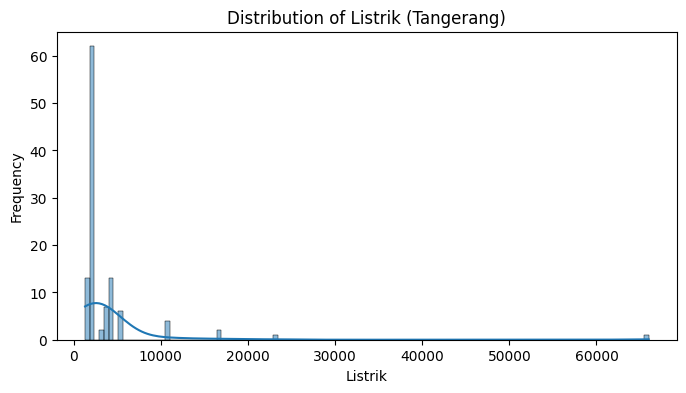

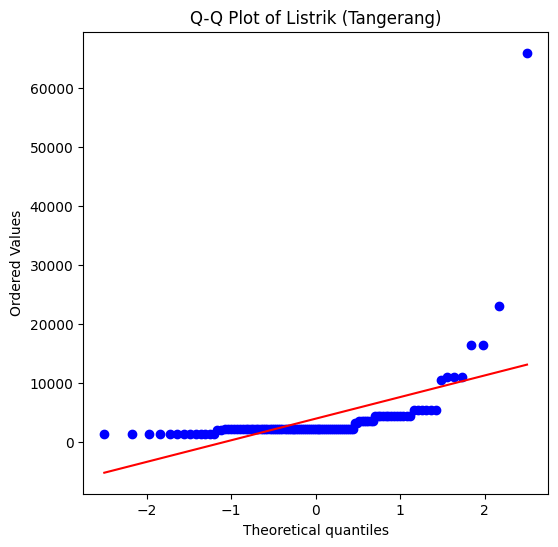

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Create a histogram
plt.figure(figsize=(8, 4))
sns.histplot(dfT['listrik'].dropna(), kde=True)
plt.title('Distribution of Listrik (Tangerang)')
plt.xlabel('Listrik')
plt.ylabel('Frequency')
plt.show()

# Create a Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(dfT['listrik'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of Listrik (Tangerang)')
plt.show()

In [ ]:
dfT['listrik'] = dfT['listrik'].fillna(dfT['listrik'].median())
display(dfT.isnull().sum())

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,86
carport,32
lokasi,0
sertifikat,2
listrik,0


In [ ]:
dfT['garasi'].fillna(0, inplace=True)
dfT['carport'].fillna(0, inplace=True)

display(dfT.isnull().sum())

/tmp/ipython-input-3066659304.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfT['garasi'].fillna(0, inplace=True)
/tmp/ipython-input-3066659304.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,0
carport,0
lokasi,0
sertifikat,2
listrik,0


In [ ]:
dfT

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,12-06-2021,60.0,50.0,3.0,2.0,0.0,0.0,"BSD CITY, TANGERANG",SHM,1300.0,500.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam..."
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,480.0,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a..."
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,600.0,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ..."
3,12-06-2021,200.0,225.0,5.0,4.0,0.0,0.0,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,4250.0,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA..."
4,12-06-2021,76.0,123.0,3.0,3.0,0.0,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,1700.0,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,12-08-2021,60.0,55.0,2.0,2.0,0.0,1.0,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,711.0,https://www.rumah123.com/properti/tangerang/ho...,"Lokasi sangat dekat dengan berbagai Akses,Ters..."
120,12-08-2021,66.0,70.0,3.0,2.0,0.0,1.0,"Ciater, Tangerang",SHM,1300.0,850.0,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr..."
121,12-08-2021,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,1860.0,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,..."
122,12-08-2021,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,1800.0,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d..."


In [ ]:
dfT['sertifikat'].fillna(dfT['sertifikat'].mode()[0], inplace=True)
display(dfT.isnull().sum())

/tmp/ipython-input-546283559.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfT['sertifikat'].fillna(dfT['sertifikat'].mode()[0], inplace=True)


,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,0
carport,0
lokasi,0
sertifikat,0
listrik,0


In [ ]:
display(dfT['sertifikat'].value_counts())

,count
sertifikat,
SHM,98
"lainnya(PPJB, GIRIK, ADAT, dll)",15
HGB,11


In [ ]:
dfT.info()


<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, 0 to 123
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  124 non-null    object 
 1   LT          124 non-null    float64
 2   LB          124 non-null    float64
 3   KT          124 non-null    float64
 4   KM          124 non-null    float64
 5   garasi      124 non-null    float64
 6   carport     124 non-null    float64
 7   lokasi      124 non-null    object 
 8   sertifikat  124 non-null    object 
 9   listrik     124 non-null    float64
 10  harga       124 non-null    float64
 11  URL         124 non-null    object 
 12  deskripsi   124 non-null    object 
dtypes: float64(8), object(5)
memory usage: 17.6+ KB


In [ ]:
display(dfT['created_at'].value_counts())

,count
created_at,
12-06-2021,102
12-08-2021,12
12-07-2021,10


In [ ]:
dfT['created_at'] = pd.to_datetime(dfT['created_at'], format='%d-%m-%Y', errors='coerce')
dfT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, 0 to 123
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  124 non-null    datetime64[ns]
 1   LT          124 non-null    float64       
 2   LB          124 non-null    float64       
 3   KT          124 non-null    float64       
 4   KM          124 non-null    float64       
 5   garasi      124 non-null    float64       
 6   carport     124 non-null    float64       
 7   lokasi      124 non-null    object        
 8   sertifikat  124 non-null    object        
 9   listrik     124 non-null    float64       
 10  harga       124 non-null    float64       
 11  URL         124 non-null    object        
 12  deskripsi   124 non-null    object        
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 17.6+ KB


In [ ]:
display(dfT['created_at'].value_counts())

,count
created_at,
2021-06-12,102
2021-08-12,12
2021-07-12,10


In [ ]:
display(dfT)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,2021-06-12,60.0,50.0,3.0,2.0,0.0,0.0,"BSD CITY, TANGERANG",SHM,1300.0,500.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam..."
1,2021-06-12,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,480.0,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a..."
2,2021-06-12,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,600.0,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ..."
3,2021-06-12,200.0,225.0,5.0,4.0,0.0,0.0,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,4250.0,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA..."
4,2021-06-12,76.0,123.0,3.0,3.0,0.0,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,1700.0,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2021-08-12,60.0,55.0,2.0,2.0,0.0,1.0,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,711.0,https://www.rumah123.com/properti/tangerang/ho...,"Lokasi sangat dekat dengan berbagai Akses,Ters..."
120,2021-08-12,66.0,70.0,3.0,2.0,0.0,1.0,"Ciater, Tangerang",SHM,1300.0,850.0,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr..."
121,2021-08-12,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,1860.0,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,..."
122,2021-08-12,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,1800.0,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d..."


In [ ]:
display(dfT['created_at'].value_counts())

,count
created_at,
2021-06-12,102
2021-08-12,12
2021-07-12,10


In [ ]:
outliers_dict_Tanggerang = {}

for col in dfT.select_dtypes(include='number').columns:
    Q1 = dfT[col].quantile(0.25)
    Q3 = dfT[col].quantile(0.75)
    IQR = Q3 - Q1

    batas_bawah = Q1 - 1.5 * IQR
    batas_atas  = Q3 + 1.5 * IQR

    mask_outlier_Tanggerang = (dfT[col] < batas_bawah) | (dfT[col] > batas_atas)
    outliers_dict_Tanggerang[col] = dfT.loc[mask_outlier_Tanggerang, col]

# Tampilkan hasil
for kolom, outlier in outliers_dict_Tanggerang.items():
    print(f"\nKolom: {kolom}")
    print(outlier)


Kolom: LT
32      534.0
47      625.0
49      534.0
100    3087.0
Name: LT, dtype: float64

Kolom: LB
32     1000.0
47      500.0
49     1000.0
54      500.0
100    2500.0
101     492.0
Name: LB, dtype: float64

Kolom: KT
49    8.0
54    6.0
55    6.0
96    6.0
Name: KT, dtype: float64

Kolom: KM
32     6.0
42     5.0
46     5.0
48     5.0
49     8.0
54     5.0
56     5.0
64     5.0
67     5.0
92     5.0
96     6.0
100    5.0
113    5.0
Name: KM, dtype: float64

Kolom: garasi
32      6.0
49      6.0
54      4.0
71      3.0
96      4.0
99      4.0
100    10.0
114     4.0
Name: garasi, dtype: float64

Kolom: carport
49      6.0
100    10.0
Name: carport, dtype: float64

Kolom: listrik
3       5500.0
20     11000.0
32     16500.0
47      5500.0
49     16500.0
54     23000.0
55      5500.0
62     10600.0
68      5500.0
71      5500.0
100    66000.0
109    11000.0
113     5500.0
114    11000.0
Name: listrik, dtype: float64

Kolom: harga
20      13000.0
32      15500.0
47      12500.0
49   

In [ ]:
outlier_harga_Tanggerang = outliers_dict_Tanggerang['harga']

# Filter out indices that are not in the current dfT index
indices_to_process_Tanggerang = outlier_harga_Tanggerang.index.intersection(dfT.index)

# Select and drop rows based on the filtered indices
dfT_outlier_harga_Tanggerang = dfT.loc[indices_to_process_Tanggerang].copy()
dfT_Bersih = dfT.drop(index=indices_to_process_Tanggerang).copy()

display(dfT_outlier_harga_Tanggerang)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
20,2021-06-12,276.0,441.0,4.0,4.0,2.0,2.0,"BSD CITY, TANGERANG",SHM,11000.0,13000.0,https://www.rumah123.com/properti/tangerang/ho...,Miliki Hunian Eksklusif dengan akses langsung ...
32,2021-06-12,534.0,1000.0,5.0,6.0,6.0,2.0,"BSD, TANGERANG",SHM,16500.0,15500.0,https://www.rumah123.com/properti/tangerang/ho...,"New Home\nRUMAH MEWAH TAMAN TIRTA GOLF BSD, Lt..."
47,2021-06-12,625.0,500.0,5.0,3.0,0.0,2.0,"BSD, TANGERANG",SHM,5500.0,12500.0,https://www.rumah123.com/properti/tangerang/ho...,"Di Jual Rumah di Bsd, Aman dan Nyaman, Komplek..."
49,2021-06-12,534.0,1000.0,8.0,8.0,6.0,6.0,"BSD, TANGERANG",SHM,16500.0,15500.0,https://www.rumah123.com/properti/tangerang/ho...,Dijual rumah brand new TAMAN TIRTA GOLF BSD\nL...
54,2021-06-12,474.0,500.0,6.0,5.0,4.0,2.0,"BSD DE PARK, TANGERANG",SHM,23000.0,12500.0,https://www.rumah123.com/properti/tangerang/ho...,"LT 474, LB +/- 500 (full renovated), KT 6+2, K..."
66,2021-06-12,276.0,441.0,4.0,4.0,0.0,0.0,"BSD FORESTA, TANGERANG",SHM,2200.0,14000.0,https://www.rumah123.com/properti/tangerang/ho...,LAUREL NAVA PARK by HONGKONG LAND & SINARMAS L...
67,2021-06-12,276.0,441.0,5.0,5.0,0.0,0.0,"BSD CITY, TANGERANG",HGB,3500.0,12600.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah Dijual Tangerang , Hot, rumah sultan ter..."
76,2021-06-12,230.0,370.0,4.0,4.0,0.0,0.0,"CISAUK, TANGERANG",HGB,3500.0,11600.0,https://www.rumah123.com/properti/tangerang/ho...,LOKASI LAUREL SANGAT STRATEGIS SELANGKAH KE BO...
100,2021-06-12,3087.0,2500.0,5.0,5.0,10.0,10.0,"BSD BUKIT GOLF, TANGERANG",SHM,66000.0,100000.0,https://www.rumah123.com/properti/tangerang/ho...,Rumah Super Mewah Bukit Golf BSD City rumah me...
114,2021-08-12,276.0,441.0,4.0,4.0,4.0,4.0,"BSD, TANGERANG",SHM,11000.0,13000.0,https://www.rumah123.com/properti/tangerang/ho...,LAUREL NAVAPARK @ BSD City Tangerang Phase2. D...


In [ ]:
dfT_outlier_harga_Tanggerang["Kota"] = "Tanggerang"
dfT_Bersih["Kota"] = "Tanggerang"
dfT_outlier_harga_Tanggerang

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi,Kota
20,2021-06-12,276.0,441.0,4.0,4.0,2.0,2.0,"BSD CITY, TANGERANG",SHM,11000.0,13000.0,https://www.rumah123.com/properti/tangerang/ho...,Miliki Hunian Eksklusif dengan akses langsung ...,Tanggerang
32,2021-06-12,534.0,1000.0,5.0,6.0,6.0,2.0,"BSD, TANGERANG",SHM,16500.0,15500.0,https://www.rumah123.com/properti/tangerang/ho...,"New Home\nRUMAH MEWAH TAMAN TIRTA GOLF BSD, Lt...",Tanggerang
47,2021-06-12,625.0,500.0,5.0,3.0,0.0,2.0,"BSD, TANGERANG",SHM,5500.0,12500.0,https://www.rumah123.com/properti/tangerang/ho...,"Di Jual Rumah di Bsd, Aman dan Nyaman, Komplek...",Tanggerang
49,2021-06-12,534.0,1000.0,8.0,8.0,6.0,6.0,"BSD, TANGERANG",SHM,16500.0,15500.0,https://www.rumah123.com/properti/tangerang/ho...,Dijual rumah brand new TAMAN TIRTA GOLF BSD\nL...,Tanggerang
54,2021-06-12,474.0,500.0,6.0,5.0,4.0,2.0,"BSD DE PARK, TANGERANG",SHM,23000.0,12500.0,https://www.rumah123.com/properti/tangerang/ho...,"LT 474, LB +/- 500 (full renovated), KT 6+2, K...",Tanggerang
66,2021-06-12,276.0,441.0,4.0,4.0,0.0,0.0,"BSD FORESTA, TANGERANG",SHM,2200.0,14000.0,https://www.rumah123.com/properti/tangerang/ho...,LAUREL NAVA PARK by HONGKONG LAND & SINARMAS L...,Tanggerang
67,2021-06-12,276.0,441.0,5.0,5.0,0.0,0.0,"BSD CITY, TANGERANG",HGB,3500.0,12600.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah Dijual Tangerang , Hot, rumah sultan ter...",Tanggerang
76,2021-06-12,230.0,370.0,4.0,4.0,0.0,0.0,"CISAUK, TANGERANG",HGB,3500.0,11600.0,https://www.rumah123.com/properti/tangerang/ho...,LOKASI LAUREL SANGAT STRATEGIS SELANGKAH KE BO...,Tanggerang
100,2021-06-12,3087.0,2500.0,5.0,5.0,10.0,10.0,"BSD BUKIT GOLF, TANGERANG",SHM,66000.0,100000.0,https://www.rumah123.com/properti/tangerang/ho...,Rumah Super Mewah Bukit Golf BSD City rumah me...,Tanggerang
114,2021-08-12,276.0,441.0,4.0,4.0,4.0,4.0,"BSD, TANGERANG",SHM,11000.0,13000.0,https://www.rumah123.com/properti/tangerang/ho...,LAUREL NAVAPARK @ BSD City Tangerang Phase2. D...,Tanggerang


In [ ]:
dfT_Bersih

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi,Kota
0,2021-06-12,60.0,50.0,3.0,2.0,0.0,0.0,"BSD CITY, TANGERANG",SHM,1300.0,500.0,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam...",Tanggerang
1,2021-06-12,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,480.0,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a...",Tanggerang
2,2021-06-12,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,600.0,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ...",Tanggerang
3,2021-06-12,200.0,225.0,5.0,4.0,0.0,0.0,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,4250.0,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA...",Tanggerang
4,2021-06-12,76.0,123.0,3.0,3.0,0.0,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,1700.0,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw...",Tanggerang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2021-08-12,60.0,55.0,2.0,2.0,0.0,1.0,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,711.0,https://www.rumah123.com/properti/tangerang/ho...,"Lokasi sangat dekat dengan berbagai Akses,Ters...",Tanggerang
120,2021-08-12,66.0,70.0,3.0,2.0,0.0,1.0,"Ciater, Tangerang",SHM,1300.0,850.0,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr...",Tanggerang
121,2021-08-12,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,1860.0,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,...",Tanggerang
122,2021-08-12,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,1800.0,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d...",Tanggerang


In [ ]:
dfT_outlier_harga_Tanggerang["harga"] = dfT_outlier_harga_Tanggerang["harga"]* 1000000
dfT_Bersih["harga"] = dfT_Bersih["harga"]* 1000000
dfT_outlier_harga_Tanggerang

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi,Kota
20,2021-06-12,276.0,441.0,4.0,4.0,2.0,2.0,"BSD CITY, TANGERANG",SHM,11000.0,1.300000e+10,https://www.rumah123.com/properti/tangerang/ho...,Miliki Hunian Eksklusif dengan akses langsung ...,Tanggerang
32,2021-06-12,534.0,1000.0,5.0,6.0,6.0,2.0,"BSD, TANGERANG",SHM,16500.0,1.550000e+10,https://www.rumah123.com/properti/tangerang/ho...,"New Home\nRUMAH MEWAH TAMAN TIRTA GOLF BSD, Lt...",Tanggerang
47,2021-06-12,625.0,500.0,5.0,3.0,0.0,2.0,"BSD, TANGERANG",SHM,5500.0,1.250000e+10,https://www.rumah123.com/properti/tangerang/ho...,"Di Jual Rumah di Bsd, Aman dan Nyaman, Komplek...",Tanggerang
49,2021-06-12,534.0,1000.0,8.0,8.0,6.0,6.0,"BSD, TANGERANG",SHM,16500.0,1.550000e+10,https://www.rumah123.com/properti/tangerang/ho...,Dijual rumah brand new TAMAN TIRTA GOLF BSD\nL...,Tanggerang
54,2021-06-12,474.0,500.0,6.0,5.0,4.0,2.0,"BSD DE PARK, TANGERANG",SHM,23000.0,1.250000e+10,https://www.rumah123.com/properti/tangerang/ho...,"LT 474, LB +/- 500 (full renovated), KT 6+2, K...",Tanggerang
66,2021-06-12,276.0,441.0,4.0,4.0,0.0,0.0,"BSD FORESTA, TANGERANG",SHM,2200.0,1.400000e+10,https://www.rumah123.com/properti/tangerang/ho...,LAUREL NAVA PARK by HONGKONG LAND & SINARMAS L...,Tanggerang
67,2021-06-12,276.0,441.0,5.0,5.0,0.0,0.0,"BSD CITY, TANGERANG",HGB,3500.0,1.260000e+10,https://www.rumah123.com/properti/tangerang/ho...,"Rumah Dijual Tangerang , Hot, rumah sultan ter...",Tanggerang
76,2021-06-12,230.0,370.0,4.0,4.0,0.0,0.0,"CISAUK, TANGERANG",HGB,3500.0,1.160000e+10,https://www.rumah123.com/properti/tangerang/ho...,LOKASI LAUREL SANGAT STRATEGIS SELANGKAH KE BO...,Tanggerang
100,2021-06-12,3087.0,2500.0,5.0,5.0,10.0,10.0,"BSD BUKIT GOLF, TANGERANG",SHM,66000.0,1.000000e+11,https://www.rumah123.com/properti/tangerang/ho...,Rumah Super Mewah Bukit Golf BSD City rumah me...,Tanggerang
114,2021-08-12,276.0,441.0,4.0,4.0,4.0,4.0,"BSD, TANGERANG",SHM,11000.0,1.300000e+10,https://www.rumah123.com/properti/tangerang/ho...,LAUREL NAVAPARK @ BSD City Tangerang Phase2. D...,Tanggerang


In [ ]:
dfT_Bersih

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi,Kota
0,2021-06-12,60.0,50.0,3.0,2.0,0.0,0.0,"BSD CITY, TANGERANG",SHM,1300.0,5.000000e+08,https://www.rumah123.com/properti/tangerang/ho...,"Rumah 2 Lantai Akses Strategis, Keamanan 24jam...",Tanggerang
1,2021-06-12,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,4.800000e+08,https://www.rumah123.com/properti/tangerang/ho...,"lokasi strategis dekat gading serpong, dekat a...",Tanggerang
2,2021-06-12,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,6.000000e+08,https://www.rumah123.com/properti/tangerang/ho...,"Boston Village Bintaro, Cluster dengan konsep ...",Tanggerang
3,2021-06-12,200.0,225.0,5.0,4.0,0.0,0.0,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,4.250000e+09,https://www.rumah123.com/properti/tangerang/ho...,"DIJUAL RUMAH BARU SELESAI DIBANGUN, LIPPO KARA...",Tanggerang
4,2021-06-12,76.0,123.0,3.0,3.0,0.0,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,1.700000e+09,https://www.rumah123.com/properti/tangerang/ho...,"diapit oleh 3 tol besar, JOR 2, Cinere-Jagoraw...",Tanggerang
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2021-08-12,60.0,55.0,2.0,2.0,0.0,1.0,"LIPPO KARAWACI, TANGERANG","lainnya(PPJB, GIRIK, ADAT, dll)",2200.0,7.110000e+08,https://www.rumah123.com/properti/tangerang/ho...,"Lokasi sangat dekat dengan berbagai Akses,Ters...",Tanggerang
120,2021-08-12,66.0,70.0,3.0,2.0,0.0,1.0,"Ciater, Tangerang",SHM,1300.0,8.500000e+08,https://www.rumah123.com/properti/tangerang/ho...,"Berlian Ciater, Hunian 2 Lantai Nyaman dan Asr...",Tanggerang
121,2021-08-12,202.0,85.0,4.0,3.0,1.0,1.0,"BSD Griya Loka, Tangerang",SHM,2200.0,1.860000e+09,https://www.rumah123.com/properti/tangerang/ho...,"1-7 km ke Stasiun Rawa Buntu, Rs Eka Hospital,...",Tanggerang
122,2021-08-12,108.0,130.0,3.0,3.0,1.0,1.0,"Pagedangan, Tangerang",SHM,2200.0,1.800000e+09,https://www.rumah123.com/properti/tangerang/ho...,"Fasilitas Terdekat :Lokasi strategis, berada d...",Tanggerang


#**KOTA BEKASI**

In [ ]:
dfX.head()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,08-12-2021,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08-12-2021,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08-12-2021,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08-12-2021,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,08-12-2021,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
missing_count = dfX.isnull().sum()
total_rows = len(dfX)
missing_percentage_dfX = (missing_count / total_rows) * 100
missing_percentage_dfX = missing_percentage_dfX.sort_values(ascending=False)
missing_percentage_dfX[missing_percentage_dfX > 0]

,0
Unnamed: 23,100.000000
Unnamed: 22,100.000000
Unnamed: 18,100.000000
Unnamed: 19,100.000000
Unnamed: 20,100.000000
Unnamed: 21,100.000000
Unnamed: 14,100.000000
Unnamed: 15,100.000000
Unnamed: 16,100.000000
Unnamed: 17,100.000000


In [ ]:
columns_to_drop = [col for col in ['Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25','hadap'] if col in dfX.columns]
dfX.drop(columns=columns_to_drop, inplace=True)
print(f"Shape dfX setelah menghapus kolom: {dfX.shape}")

Shape dfX setelah menghapus kolom: (992, 13)


In [ ]:
missing_count = dfX.isnull().sum()
total_rows = len(dfX)
missing_percentage_dfX = (missing_count / total_rows) * 100
missing_percentage_dfX = missing_percentage_dfX.sort_values(ascending=False)
missing_percentage_dfX[missing_percentage_dfX > 0]

,0
garasi,96.673387
carport,91.834677
listrik,89.818548
sertifikat,89.314516
KM,89.314516
KT,89.213710
LB,89.213710
LT,89.213710
created_at,89.213710
lokasi,89.213710


In [ ]:
print("Jumlah duplikat di dfX:", dfX.duplicated().sum())
print("\nBaris duplikat di dfX:")
display(dfX[dfX.duplicated(keep=False)])

Jumlah duplikat di dfX: 884

Baris duplikat di dfX:


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfX.drop_duplicates(inplace=True)
print(f"Shape (Baris, Kolom) dfX setelah menghapus duplikat: {dfX.shape}")
print(f"Sisa duplikat di dfX: {dfX.duplicated().sum()}")

Shape (Baris, Kolom) dfX setelah menghapus duplikat: (108, 13)
Sisa duplikat di dfX: 0


In [ ]:
missing_count = dfX.isnull().sum()
total_rows = len(dfX)
missing_percentage_dfX = (missing_count / total_rows) * 100
missing_percentage_dfX = missing_percentage_dfX.sort_values(ascending=False)
missing_percentage_dfX[missing_percentage_dfX > 0]

,0
garasi,69.444444
carport,25.000000
listrik,6.481481
sertifikat,1.851852
KM,1.851852
KT,0.925926
LB,0.925926
LT,0.925926
created_at,0.925926
lokasi,0.925926


In [ ]:
dfX

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,08-12-2021,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,5.500000e+08,Rumah murah di metland cibitung bekasi - Dijua...,"Selangkah ke stasiun krl telaga murni, Dekat d..."
1,08-12-2021,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,4.400000e+08,Rumah dijual di Griya gandasari cibitung - Dij...,"Rumah sangat nyaman,dan terbukti bebas banjir,..."
2,08-12-2021,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,6.990000e+08,Jual cepat rumah huuk di metland cibitung beka...,"Bebas banjir, Carport dan tanah luas ada taman..."
3,08-12-2021,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,1.350000e+09,https://www.realoka.com/216243-rumah-rapi-siap...,(Harapan Indah) Cluster Aralia Kota Harapan In...
4,08-12-2021,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,1.400000e+09,https://www.realoka.com/207964-jual-rumah-bagu...,(Harapan Indah) Cluster Harmoni Perumahan Kota...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,01-12-2021,140.0,250.0,3.0,2.0,NaN,NaN,Kabupaten Bekasi,SHM,2200.0,8.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Ju..."
104,01-12-2021,60.0,55.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,2.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ..."
105,01-12-2021,36.0,60.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,3.000000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"Lokasi Super Strategis, Selangkah menuju Kota ..."
106,01-12-2021,60.0,55.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,2.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,RCG/20/V/010 MP/LB/THM/010 Di jual Rumah Lelan...


In [ ]:
dfX.drop(107, inplace=True)
dfX

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,08-12-2021,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,5.500000e+08,Rumah murah di metland cibitung bekasi - Dijua...,"Selangkah ke stasiun krl telaga murni, Dekat d..."
1,08-12-2021,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,4.400000e+08,Rumah dijual di Griya gandasari cibitung - Dij...,"Rumah sangat nyaman,dan terbukti bebas banjir,..."
2,08-12-2021,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,6.990000e+08,Jual cepat rumah huuk di metland cibitung beka...,"Bebas banjir, Carport dan tanah luas ada taman..."
3,08-12-2021,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,1.350000e+09,https://www.realoka.com/216243-rumah-rapi-siap...,(Harapan Indah) Cluster Aralia Kota Harapan In...
4,08-12-2021,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,1.400000e+09,https://www.realoka.com/207964-jual-rumah-bagu...,(Harapan Indah) Cluster Harmoni Perumahan Kota...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,01-12-2021,180.0,220.0,5.0,3.0,NaN,NaN,Kota Bekasi,SHM,2200.0,1.600000e+09,https://www.rumah123.com/properti/bekasi/hos92...,Akses pintu tol Bekasibarat; Dekat Mall Summar...
103,01-12-2021,140.0,250.0,3.0,2.0,NaN,NaN,Kabupaten Bekasi,SHM,2200.0,8.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Ju..."
104,01-12-2021,60.0,55.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,2.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ..."
105,01-12-2021,36.0,60.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,3.000000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"Lokasi Super Strategis, Selangkah menuju Kota ..."


In [ ]:
dfX.describe()

,LT,LB,KT,KM,garasi,carport,listrik,harga
count,107.000000,107.000000,107.000000,106.000000,33.000000,81.000000,101.000000,1.070000e+02
mean,108.822430,110.635514,2.962617,1.943396,1.090909,1.086420,2056.435644,1.074823e+09
std,59.164914,71.755270,1.027226,0.848867,0.291937,0.282734,969.578861,7.516152e+08
min,36.000000,30.000000,1.000000,1.000000,1.000000,1.000000,900.000000,1.600000e+08
25%,72.000000,60.000000,2.000000,1.000000,1.000000,1.000000,1300.000000,5.805000e+08
50%,91.000000,90.000000,3.000000,2.000000,1.000000,1.000000,2200.000000,9.200000e+08
75%,130.500000,144.000000,4.000000,2.750000,1.000000,1.000000,2200.000000,1.350000e+09
max,364.000000,494.000000,7.000000,4.000000,2.000000,2.000000,5500.000000,4.500000e+09


In [ ]:
dfX.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 0 to 106
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  107 non-null    object 
 1   LT          107 non-null    float64
 2   LB          107 non-null    float64
 3   KT          107 non-null    float64
 4   KM          106 non-null    float64
 5   garasi      33 non-null     float64
 6   carport     81 non-null     float64
 7   lokasi      107 non-null    object 
 8   sertifikat  106 non-null    object 
 9   listrik     101 non-null    float64
 10  harga       107 non-null    float64
 11  URL         107 non-null    object 
 12  deskripsi   107 non-null    object 
dtypes: float64(8), object(5)
memory usage: 15.8+ KB


In [ ]:
missing_listrik_rows = dfX[dfX['listrik'].isnull()]
display(missing_listrik_rows)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
1,08-12-2021,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,4.400000e+08,Rumah dijual di Griya gandasari cibitung - Dij...,"Rumah sangat nyaman,dan terbukti bebas banjir,..."
2,08-12-2021,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,6.990000e+08,Jual cepat rumah huuk di metland cibitung beka...,"Bebas banjir, Carport dan tanah luas ada taman..."
43,05-12-2021,102.0,80.0,3.0,2.0,1.0,1.0,Kota Bekasi,SHM,NaN,8.950000e+08,https://www.rumah123.com/properti/bekasi/hos92...,Lokasi strategis lingkungan aman rumah nyaman ...
57,04-12-2021,84.0,141.0,3.0,3.0,NaN,1.0,Kota Bekasi,SHM,NaN,1.250000e+09,https://www.rumah123.com/properti/bekasi/hos92...,Dijual rumah Furnished siap huni 2 lantai di K...
75,03-12-2021,145.0,96.0,4.0,2.0,NaN,NaN,Kabupaten Bekasi,SHM,NaN,9.650000e+08,https://www.olx.co.id/item/dijual-rumah-murah-...,Dijual Rumah Murah di Perumahan Kirana Cibitun...
76,03-12-2021,364.0,494.0,5.0,NaN,1.0,NaN,Kota Bekasi,NaN,NaN,2.485000e+09,https://www.iklanrumah.com/list/detail/37392/r...,Rumah Mewah Pondok Pekayon Indah Siap Huni di ...


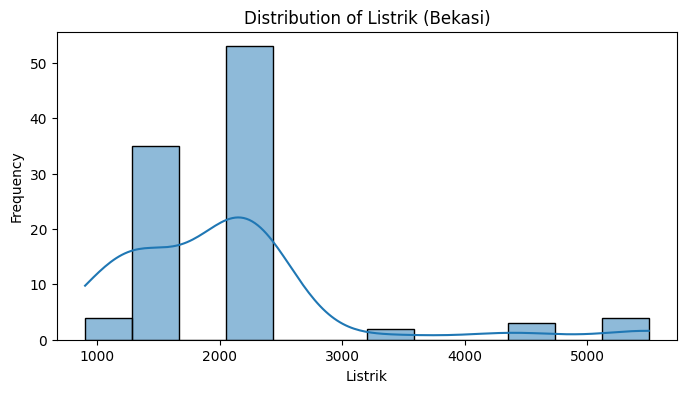

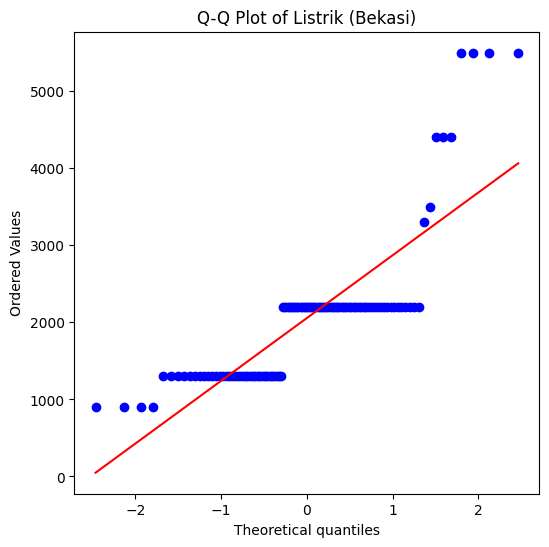

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Create a histogram
plt.figure(figsize=(8, 4))
sns.histplot(dfX['listrik'].dropna(), kde=True)
plt.title('Distribution of Listrik (Bekasi)')
plt.xlabel('Listrik')
plt.ylabel('Frequency')
plt.show()

# Create a Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(dfX['listrik'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of Listrik (Bekasi)')
plt.show()

In [ ]:
dfX['garasi'].fillna(0, inplace=True)
dfX['carport'].fillna(0, inplace=True)

display(dfX.isnull().sum())

/tmp/ipython-input-2206397861.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfX['garasi'].fillna(0, inplace=True)
/tmp/ipython-input-2206397861.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

,0
created_at,0
LT,0
LB,0
KT,0
KM,1
garasi,0
carport,0
lokasi,0
sertifikat,1
listrik,6


In [ ]:
dfX['listrik'] = dfX['listrik'].fillna(dfX['listrik'].median())
display(dfX.isnull().sum())

,0
created_at,0
LT,0
LB,0
KT,0
KM,1
garasi,0
carport,0
lokasi,0
sertifikat,1
listrik,0


In [ ]:
dfX

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,08-12-2021,71.0,43.0,2.0,1.0,0.0,1.0,Kabupaten Bekasi,SHM,1300.0,5.500000e+08,Rumah murah di metland cibitung bekasi - Dijua...,"Selangkah ke stasiun krl telaga murni, Dekat d..."
1,08-12-2021,59.0,60.0,2.0,1.0,0.0,1.0,Kabupaten Bekasi,SHM,2200.0,4.400000e+08,Rumah dijual di Griya gandasari cibitung - Dij...,"Rumah sangat nyaman,dan terbukti bebas banjir,..."
2,08-12-2021,124.0,95.0,2.0,1.0,0.0,1.0,Kabupaten Bekasi,SHM,2200.0,6.990000e+08,Jual cepat rumah huuk di metland cibitung beka...,"Bebas banjir, Carport dan tanah luas ada taman..."
3,08-12-2021,144.0,100.0,2.0,1.0,0.0,1.0,Kabupaten Bekasi,SHM,2200.0,1.350000e+09,https://www.realoka.com/216243-rumah-rapi-siap...,(Harapan Indah) Cluster Aralia Kota Harapan In...
4,08-12-2021,108.0,100.0,3.0,2.0,0.0,1.0,Kabupaten Bekasi,SHM,2200.0,1.400000e+09,https://www.realoka.com/207964-jual-rumah-bagu...,(Harapan Indah) Cluster Harmoni Perumahan Kota...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,01-12-2021,180.0,220.0,5.0,3.0,0.0,0.0,Kota Bekasi,SHM,2200.0,1.600000e+09,https://www.rumah123.com/properti/bekasi/hos92...,Akses pintu tol Bekasibarat; Dekat Mall Summar...
103,01-12-2021,140.0,250.0,3.0,2.0,0.0,0.0,Kabupaten Bekasi,SHM,2200.0,8.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Ju..."
104,01-12-2021,60.0,55.0,2.0,1.0,0.0,0.0,Kabupaten Bekasi,SHM,1300.0,2.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ..."
105,01-12-2021,36.0,60.0,2.0,1.0,0.0,0.0,Kabupaten Bekasi,SHM,1300.0,3.000000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"Lokasi Super Strategis, Selangkah menuju Kota ..."


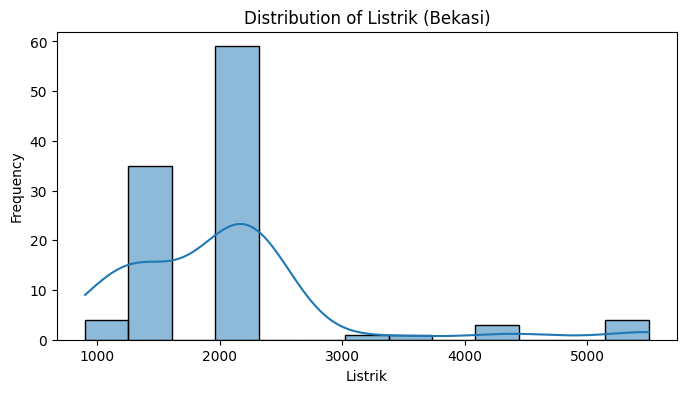

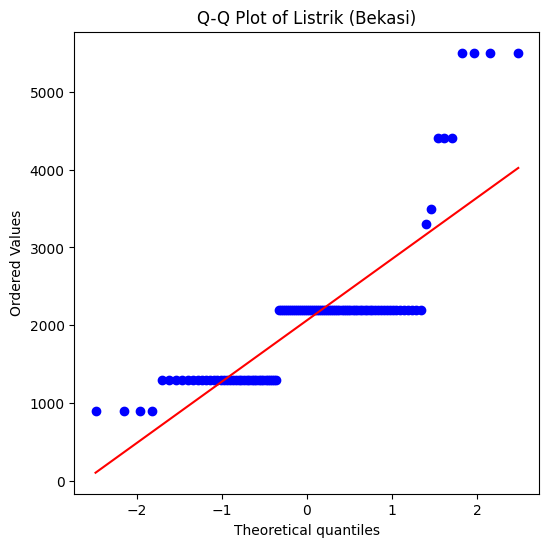

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Create a histogram
plt.figure(figsize=(8, 4))
sns.histplot(dfX['listrik'].dropna(), kde=True)
plt.title('Distribution of Listrik (Bekasi)')
plt.xlabel('Listrik')
plt.ylabel('Frequency')
plt.show()

# Create a Q-Q plot
plt.figure(figsize=(6, 6))
stats.probplot(dfX['listrik'].dropna(), dist="norm", plot=plt)
plt.title('Q-Q Plot of Listrik (Bekasi)')
plt.show()

In [ ]:
missing_garasi_carport = dfX[dfX['garasi'].isnull() | dfX['carport'].isnull()]
display(missing_garasi_carport)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi


In [ ]:
# Tampilkan status akhir missing values untuk verifikasi
print("\n--- Status Akhir Missing Values (dfX) ---")
display(dfX.isnull().sum())


--- Status Akhir Missing Values (dfX) ---


,0
created_at,0
LT,0
LB,0
KT,0
KM,1
garasi,0
carport,0
lokasi,0
sertifikat,1
listrik,0


In [ ]:
dfX

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,08-12-2021,71.0,43.0,2.0,1.0,0.0,1.0,Kabupaten Bekasi,SHM,1300.0,5.500000e+08,Rumah murah di metland cibitung bekasi - Dijua...,"Selangkah ke stasiun krl telaga murni, Dekat d..."
1,08-12-2021,59.0,60.0,2.0,1.0,0.0,1.0,Kabupaten Bekasi,SHM,2200.0,4.400000e+08,Rumah dijual di Griya gandasari cibitung - Dij...,"Rumah sangat nyaman,dan terbukti bebas banjir,..."
2,08-12-2021,124.0,95.0,2.0,1.0,0.0,1.0,Kabupaten Bekasi,SHM,2200.0,6.990000e+08,Jual cepat rumah huuk di metland cibitung beka...,"Bebas banjir, Carport dan tanah luas ada taman..."
3,08-12-2021,144.0,100.0,2.0,1.0,0.0,1.0,Kabupaten Bekasi,SHM,2200.0,1.350000e+09,https://www.realoka.com/216243-rumah-rapi-siap...,(Harapan Indah) Cluster Aralia Kota Harapan In...
4,08-12-2021,108.0,100.0,3.0,2.0,0.0,1.0,Kabupaten Bekasi,SHM,2200.0,1.400000e+09,https://www.realoka.com/207964-jual-rumah-bagu...,(Harapan Indah) Cluster Harmoni Perumahan Kota...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,01-12-2021,180.0,220.0,5.0,3.0,0.0,0.0,Kota Bekasi,SHM,2200.0,1.600000e+09,https://www.rumah123.com/properti/bekasi/hos92...,Akses pintu tol Bekasibarat; Dekat Mall Summar...
103,01-12-2021,140.0,250.0,3.0,2.0,0.0,0.0,Kabupaten Bekasi,SHM,2200.0,8.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Ju..."
104,01-12-2021,60.0,55.0,2.0,1.0,0.0,0.0,Kabupaten Bekasi,SHM,1300.0,2.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ..."
105,01-12-2021,36.0,60.0,2.0,1.0,0.0,0.0,Kabupaten Bekasi,SHM,1300.0,3.000000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"Lokasi Super Strategis, Selangkah menuju Kota ..."


In [ ]:
dfX['sertifikat'].fillna(dfX['sertifikat'].mode()[0], inplace=True)
dfX['KM'].fillna(dfX['KM'].mode()[0], inplace=True)
print("Status Missing Values (NaN) dfX setelah imputasi sertifikat dan KM:")
display(dfX.isnull().sum())

Status Missing Values (NaN) dfX setelah imputasi sertifikat dan KM:


/tmp/ipython-input-890800684.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfX['sertifikat'].fillna(dfX['sertifikat'].mode()[0], inplace=True)
/tmp/ipython-input-890800684.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,0
carport,0
lokasi,0
sertifikat,0
listrik,0


In [ ]:
missing_count = dfX.isnull().sum()
total_rows = len(dfX)
missing_percentage_dfX = (missing_count / total_rows) * 100
missing_percentage_dfX = missing_percentage_dfX.sort_values(ascending=False)
missing_percentage_dfX[missing_percentage_dfX > 0]

,0


Seluruh Missing Value sudah diatasi


Setelah semua langkah pembersihan dan imputasi selesai, kita mendapatkan beberapa informasi penting tentang data Bekasi:

Harga Properti (Median): Harga properti Bekasi yang paling umum adalah sekitar Rp920 Juta (berdasarkan analisis dfX.describe() sebelumnya).

Karakteristik Properti Rata-Rata: Properti yang dijual rata-rata adalah rumah 3 Kamar Tidur (KT), 2 Kamar Mandi (KM), dengan Luas Tanah (108 m
2
 ) dan Luas Bangunan (110 m
2
 ) yang hampir sama.

Tujuan Outlier Listrik: Data listrik menunjukkan median yang lebih tinggi dari mean (Median 2200 Watt vs Mean 2056 Watt), menunjukkan adanya beberapa properti dengan daya listrik sangat rendah (di bawah 1300 Watt) yang harus ditinjau lebih lanjut sebagai outlier pada langkah berikutnya.

In [ ]:
dfX['created_at'] = pd.to_datetime(dfX['created_at'], format='%d-%m-%Y', errors='coerce')
dfX.info()

<class 'pandas.core.frame.DataFrame'>
Index: 107 entries, 0 to 106
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  107 non-null    datetime64[ns]
 1   LT          107 non-null    float64       
 2   LB          107 non-null    float64       
 3   KT          107 non-null    float64       
 4   KM          107 non-null    float64       
 5   garasi      107 non-null    float64       
 6   carport     107 non-null    float64       
 7   lokasi      107 non-null    object        
 8   sertifikat  107 non-null    object        
 9   listrik     107 non-null    float64       
 10  harga       107 non-null    float64       
 11  URL         107 non-null    object        
 12  deskripsi   107 non-null    object        
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 15.8+ KB


In [ ]:
display(dfX['created_at'].value_counts())

,count
created_at,
2021-12-06,30
2021-12-04,19
2021-12-03,15
2021-12-05,15
2021-12-01,11
2021-12-02,8
2021-12-08,7
2021-12-07,2


In [ ]:
outliers_bekasi_dict = {}

for col in dfX.select_dtypes(include='number').columns:
    Q1 = dfX[col].quantile(0.25)
    Q3 = dfX[col].quantile(0.75)
    IQR = Q3 - Q1

    batas_bawah = Q1 - 1.5 * IQR
    batas_atas  = Q3 + 1.5 * IQR

    mask_outlier = (dfX[col] < batas_bawah) | (dfX[col] > batas_atas)
    outliers_bekasi_dict[col] = dfX.loc[mask_outlier, col]

# Tampilkan hasil
for kolom, outlier in outliers_bekasi_dict.items():
    print(f"\nKolom: {kolom}")
    print(outlier)


Kolom: LT
7     336.0
15    245.0
16    296.0
76    364.0
99    320.0
Name: LT, dtype: float64

Kolom: LB
31    293.0
76    494.0
99    300.0
Name: LB, dtype: float64

Kolom: KT
Series([], Name: KT, dtype: float64)

Kolom: KM
Series([], Name: KM, dtype: float64)

Kolom: garasi
Series([], Name: garasi, dtype: float64)

Kolom: carport
5      0.0
10     0.0
15     0.0
16     0.0
21     0.0
22     0.0
23     0.0
27     0.0
28     0.0
34     0.0
35     0.0
40     0.0
54     0.0
55     0.0
58     0.0
59     2.0
61     2.0
63     0.0
70     0.0
72     2.0
74     2.0
75     0.0
76     0.0
78     2.0
96     0.0
98     0.0
99     2.0
100    2.0
102    0.0
103    0.0
104    0.0
105    0.0
106    0.0
Name: carport, dtype: float64

Kolom: listrik
5      5500.0
7      5500.0
16     5500.0
31     5500.0
32     4400.0
89     4400.0
100    4400.0
Name: listrik, dtype: float64

Kolom: harga
7      4.200000e+09
15     2.750000e+09
31     4.500000e+09
100    2.690000e+09
Name: harga, dtype: float64


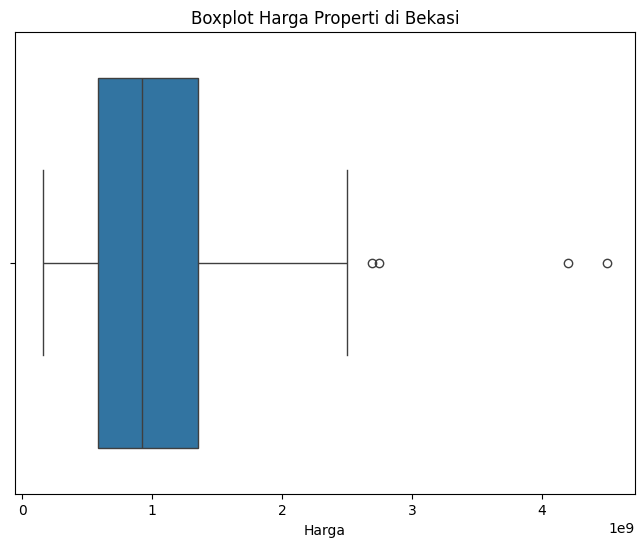

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(x=dfX['harga'])
plt.title('Boxplot Harga Properti di Bekasi')
plt.xlabel('Harga')
plt.show()

In [ ]:
import numpy as np
import pandas as pd

# ASUMSI: dfX adalah DataFrame setelah Missing Values diatasi.

# Hitung Batas IQR untuk Harga
Q1 = dfX['harga'].quantile(0.25)
Q3 = dfX['harga'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas atas dan bawah outlier (1.5 * IQR)
batas_atas = Q3 + 1.5 * IQR
batas_bawah = Q1 - 1.5 * IQR
batas_bawah = max(0, batas_bawah) # Batas harga tidak boleh negatif

# Pisahkan DataFrame
df_bersih_bekasi = dfX[(dfX['harga'] >= batas_bawah) & (dfX['harga'] <= batas_atas)].copy()
df_outlier_bekasi = dfX[(dfX['harga'] < batas_bawah) | (dfX['harga'] > batas_atas)].copy()

print(f"Data Bersih (df_bersih_bekasi) memiliki {len(df_bersih_bekasi)} baris.")
print(f"Data Outlier (df_outlier_bekasi) memiliki {len(df_outlier_bekasi)} baris.")

Data Bersih (df_bersih_bekasi) memiliki 103 baris.
Data Outlier (df_outlier_bekasi) memiliki 4 baris.


In [ ]:
# ASUMSI: df_outlier_bekasi adalah DataFrame hasil pemisahan outlier harga.

# Pastikan nama variabel yang digunakan adalah df_outlier_bekasi
# Anda harus mengganti nama variabel yang Anda buat sebelumnya di langkah pemisahan outlier

print("--- 5 Baris Pertama Data Outlier (df_outlier_bekasi) ---")
print(f"Jumlah Baris Outlier: {len(df_outlier_bekasi)}")
display(df_outlier_bekasi.head())

# Tampilkan statistik harga untuk memverifikasi bahwa harganya memang ekstrem
print("\nStatistik Harga pada Data Outlier Bekasi:")
print(df_outlier_bekasi['harga'].describe())

--- 5 Baris Pertama Data Outlier (df_outlier_bekasi) ---
Jumlah Baris Outlier: 4


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
7,2021-12-07,336.0,200.0,4.0,3.0,0.0,1.0,Kabupaten Bekasi,HGB,5500.0,4.200000e+09,https://www.99.co/id/properti/rumah-cluster-pa...,"Harga Rp 4,2 Miliyar ( Nego ); Luas Tanah 336 ..."
15,2021-12-06,245.0,117.0,3.0,2.0,0.0,0.0,Kota Bekasi,SHM,2200.0,2.750000e+09,https://www.rumah123.com/properti/bekasi/hos91...,"Rumah 1 lantai Hook, Lokasi yang Strategis dek..."
31,2021-12-06,200.0,293.0,6.0,4.0,1.0,1.0,Kota Bekasi,SHM,5500.0,4.500000e+09,https://www.99.co/id/properti/rumah-mewah-harg...,"Jual cepat rumah mewah harga murah , 3 Lantai,..."
100,2021-12-01,144.0,180.0,4.0,3.0,0.0,2.0,Kota Bekasi,SHM,4400.0,2.690000e+09,https://www.rumah123.com/properti/bekasi/hos92...,Rumah cantik furmished dan renovasi di asera o...



Statistik Harga pada Data Outlier Bekasi:
count    4.000000e+00
mean     3.535000e+09
std      9.493331e+08
min      2.690000e+09
25%      2.735000e+09
50%      3.475000e+09
75%      4.275000e+09
max      4.500000e+09
Name: harga, dtype: float64


In [ ]:
outlier_harga_bekasi = outliers_bekasi_dict['harga']

# Filter out indices that are not in the current dfX index
indices_to_process = outlier_harga_bekasi.index.intersection(dfX.index)

# Select and drop rows based on the filtered indices
dfX_outlier_harga_bekasi = dfX.loc[indices_to_process].copy()
dfX = dfX.drop(index=indices_to_process).copy()

display(dfX_outlier_harga_bekasi)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
7,2021-12-07,336.0,200.0,4.0,3.0,0.0,1.0,Kabupaten Bekasi,HGB,5500.0,4.200000e+09,https://www.99.co/id/properti/rumah-cluster-pa...,"Harga Rp 4,2 Miliyar ( Nego ); Luas Tanah 336 ..."
15,2021-12-06,245.0,117.0,3.0,2.0,0.0,0.0,Kota Bekasi,SHM,2200.0,2.750000e+09,https://www.rumah123.com/properti/bekasi/hos91...,"Rumah 1 lantai Hook, Lokasi yang Strategis dek..."
31,2021-12-06,200.0,293.0,6.0,4.0,1.0,1.0,Kota Bekasi,SHM,5500.0,4.500000e+09,https://www.99.co/id/properti/rumah-mewah-harg...,"Jual cepat rumah mewah harga murah , 3 Lantai,..."
100,2021-12-01,144.0,180.0,4.0,3.0,0.0,2.0,Kota Bekasi,SHM,4400.0,2.690000e+09,https://www.rumah123.com/properti/bekasi/hos92...,Rumah cantik furmished dan renovasi di asera o...


In [ ]:
dfX_outlier_harga_bekasi["Kota"] = "Bekasi"
dfX["Kota"] = "Bekasi"
dfX_outlier_harga_bekasi

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi,Kota
7,2021-12-07,336.0,200.0,4.0,3.0,0.0,1.0,Kabupaten Bekasi,HGB,5500.0,4.200000e+09,https://www.99.co/id/properti/rumah-cluster-pa...,"Harga Rp 4,2 Miliyar ( Nego ); Luas Tanah 336 ...",Bekasi
15,2021-12-06,245.0,117.0,3.0,2.0,0.0,0.0,Kota Bekasi,SHM,2200.0,2.750000e+09,https://www.rumah123.com/properti/bekasi/hos91...,"Rumah 1 lantai Hook, Lokasi yang Strategis dek...",Bekasi
31,2021-12-06,200.0,293.0,6.0,4.0,1.0,1.0,Kota Bekasi,SHM,5500.0,4.500000e+09,https://www.99.co/id/properti/rumah-mewah-harg...,"Jual cepat rumah mewah harga murah , 3 Lantai,...",Bekasi
100,2021-12-01,144.0,180.0,4.0,3.0,0.0,2.0,Kota Bekasi,SHM,4400.0,2.690000e+09,https://www.rumah123.com/properti/bekasi/hos92...,Rumah cantik furmished dan renovasi di asera o...,Bekasi


In [ ]:
dfX

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi,Kota
0,2021-12-08,71.0,43.0,2.0,1.0,0.0,1.0,Kabupaten Bekasi,SHM,1300.0,5.500000e+08,Rumah murah di metland cibitung bekasi - Dijua...,"Selangkah ke stasiun krl telaga murni, Dekat d...",Bekasi
1,2021-12-08,59.0,60.0,2.0,1.0,0.0,1.0,Kabupaten Bekasi,SHM,2200.0,4.400000e+08,Rumah dijual di Griya gandasari cibitung - Dij...,"Rumah sangat nyaman,dan terbukti bebas banjir,...",Bekasi
2,2021-12-08,124.0,95.0,2.0,1.0,0.0,1.0,Kabupaten Bekasi,SHM,2200.0,6.990000e+08,Jual cepat rumah huuk di metland cibitung beka...,"Bebas banjir, Carport dan tanah luas ada taman...",Bekasi
3,2021-12-08,144.0,100.0,2.0,1.0,0.0,1.0,Kabupaten Bekasi,SHM,2200.0,1.350000e+09,https://www.realoka.com/216243-rumah-rapi-siap...,(Harapan Indah) Cluster Aralia Kota Harapan In...,Bekasi
4,2021-12-08,108.0,100.0,3.0,2.0,0.0,1.0,Kabupaten Bekasi,SHM,2200.0,1.400000e+09,https://www.realoka.com/207964-jual-rumah-bagu...,(Harapan Indah) Cluster Harmoni Perumahan Kota...,Bekasi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,2021-12-01,180.0,220.0,5.0,3.0,0.0,0.0,Kota Bekasi,SHM,2200.0,1.600000e+09,https://www.rumah123.com/properti/bekasi/hos92...,Akses pintu tol Bekasibarat; Dekat Mall Summar...,Bekasi
103,2021-12-01,140.0,250.0,3.0,2.0,0.0,0.0,Kabupaten Bekasi,SHM,2200.0,8.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Ju...",Bekasi
104,2021-12-01,60.0,55.0,2.0,1.0,0.0,0.0,Kabupaten Bekasi,SHM,1300.0,2.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ...",Bekasi
105,2021-12-01,36.0,60.0,2.0,1.0,0.0,0.0,Kabupaten Bekasi,SHM,1300.0,3.000000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"Lokasi Super Strategis, Selangkah menuju Kota ...",Bekasi


# **KOTA BOGOR**

In [ ]:
# Cek Data Awal
dfB.head()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,03-12-2021,75.0,38.0,2.0,1.0,1.0,1.0,Bojonggede,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06-12-2021,60.0,40.0,1.0,1.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,60.0,50.0,2.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,60.0,70.0,3.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,90.0,60.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Cek Kualitas dan Tipe Data
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   193 non-null    object 
 1   LT           193 non-null    float64
 2   LB           193 non-null    float64
 3   KT           193 non-null    float64
 4   KM           193 non-null    float64
 5   garasi       193 non-null    float64
 6   carport      193 non-null    float64
 7   lokasi       193 non-null    object 
 8   sertifikat   193 non-null    object 
 9   listrik      193 non-null    float64
 10  hadap        19 non-null     object 
 11  harga        193 non-null    float64
 12  URL          193 non-null    object 
 13  deskripsi    193 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [ ]:
# Cek Hitung persentase missing values di dfB (Bogor)
missing_percentage_bogor = (dfB.isnull().sum() / len(dfB)) * 100

# Urutkan dari yang paling banyak kosong
missing_percentage_bogor = missing_percentage_bogor.sort_values(ascending=False)

# Tampilkan hasil
print("Persentase Missing Values di Data Bogor:")
print(missing_percentage_bogor)


Persentase Missing Values di Data Bogor:
Unnamed: 23    100.000000
Unnamed: 22    100.000000
Unnamed: 18    100.000000
Unnamed: 19    100.000000
Unnamed: 20    100.000000
Unnamed: 21    100.000000
Unnamed: 14    100.000000
Unnamed: 15    100.000000
Unnamed: 16    100.000000
Unnamed: 17    100.000000
Unnamed: 24    100.000000
Unnamed: 25    100.000000
hadap           98.098098
sertifikat      80.680681
listrik         80.680681
KM              80.680681
KT              80.680681
LB              80.680681
LT              80.680681
created_at      80.680681
lokasi          80.680681
carport         80.680681
garasi          80.680681
URL             80.680681
deskripsi       80.680681
harga           80.680681
dtype: float64


In [ ]:
# Menghapus Missing Value
dfB.drop(
    columns=[
        'Unnamed: 14','Unnamed: 15','Unnamed: 16','Unnamed: 17',
        'Unnamed: 18','Unnamed: 19','Unnamed: 20','Unnamed: 21',
        'Unnamed: 22','Unnamed: 23','Unnamed: 24','Unnamed: 25',
        'hadap'
    ],
    inplace=True,
    errors='ignore'   # agar tidak error kalau ada kolom yang tidak ada
)

In [ ]:
# Cek Duplikat di semua baris
dfB[dfB.duplicated()]

print("Duplikat seluruh baris:")
print(dfB[dfB.duplicated()])

Duplikat seluruh baris:
    created_at  LT  LB  KT  KM  garasi  carport lokasi sertifikat  listrik  \
194        NaN NaN NaN NaN NaN     NaN      NaN    NaN        NaN      NaN   
195        NaN NaN NaN NaN NaN     NaN      NaN    NaN        NaN      NaN   
196        NaN NaN NaN NaN NaN     NaN      NaN    NaN        NaN      NaN   
197        NaN NaN NaN NaN NaN     NaN      NaN    NaN        NaN      NaN   
198        NaN NaN NaN NaN NaN     NaN      NaN    NaN        NaN      NaN   
..         ...  ..  ..  ..  ..     ...      ...    ...        ...      ...   
994        NaN NaN NaN NaN NaN     NaN      NaN    NaN        NaN      NaN   
995        NaN NaN NaN NaN NaN     NaN      NaN    NaN        NaN      NaN   
996        NaN NaN NaN NaN NaN     NaN      NaN    NaN        NaN      NaN   
997        NaN NaN NaN NaN NaN     NaN      NaN    NaN        NaN      NaN   
998        NaN NaN NaN NaN NaN     NaN      NaN    NaN        NaN      NaN   

     harga  URL deskripsi  
194    NaN 

In [ ]:
# Hapus Dupilkat
dfB.drop_duplicates(inplace=True)

# Cek Duplikat Kembali
dfB.duplicated().sum()

np.int64(0)

In [ ]:
# Mengecek ukuran data yang sudah bersih dari data duplikat
dfB.shape

(194, 13)

In [ ]:
# Cek kembali missing values
dfB.isnull().sum()

,0
created_at,1
LT,1
LB,1
KT,1
KM,1
garasi,1
carport,1
lokasi,1
sertifikat,1
listrik,1


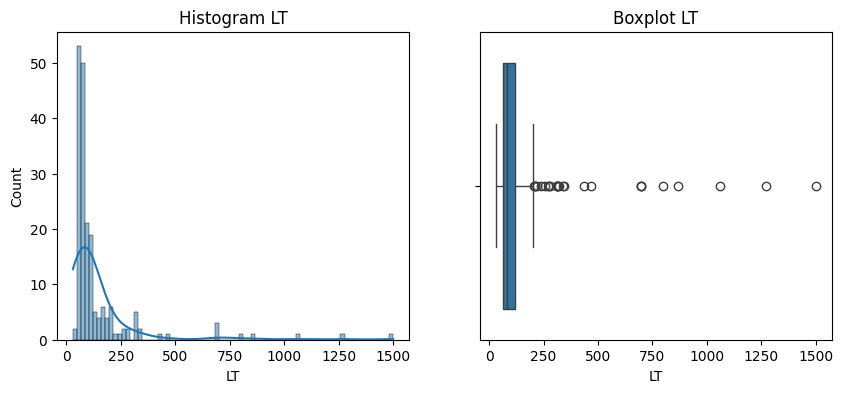

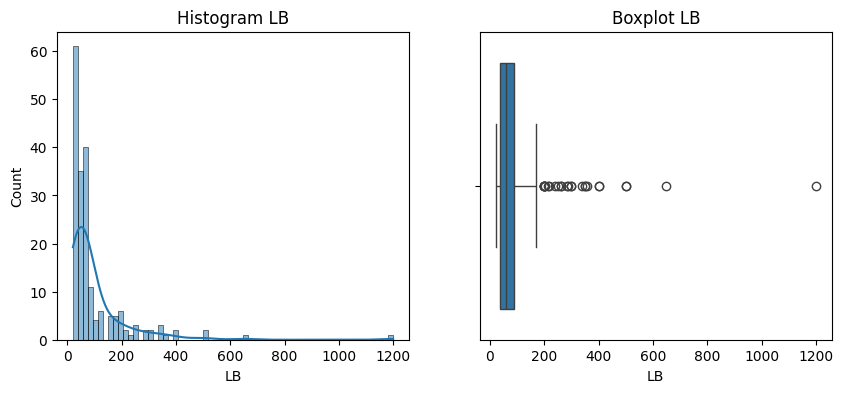

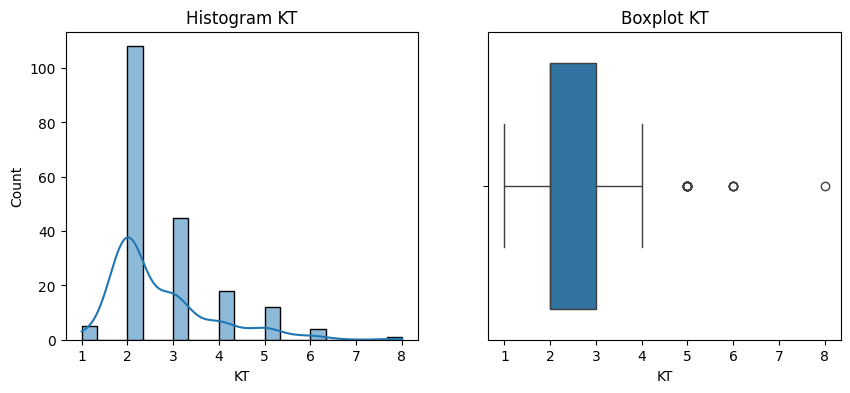

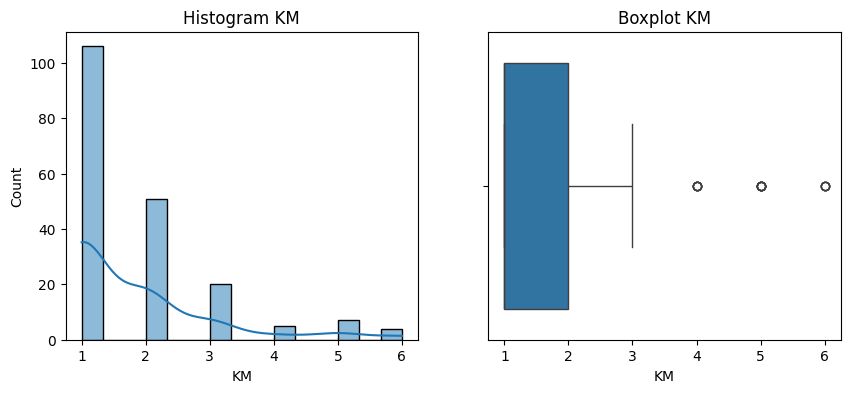

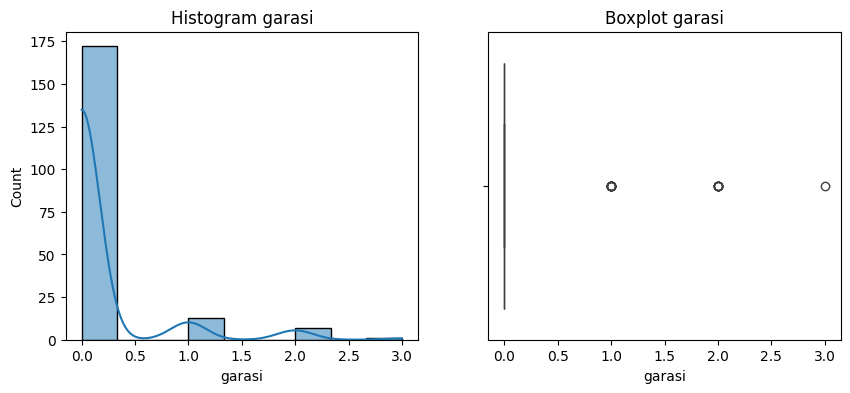

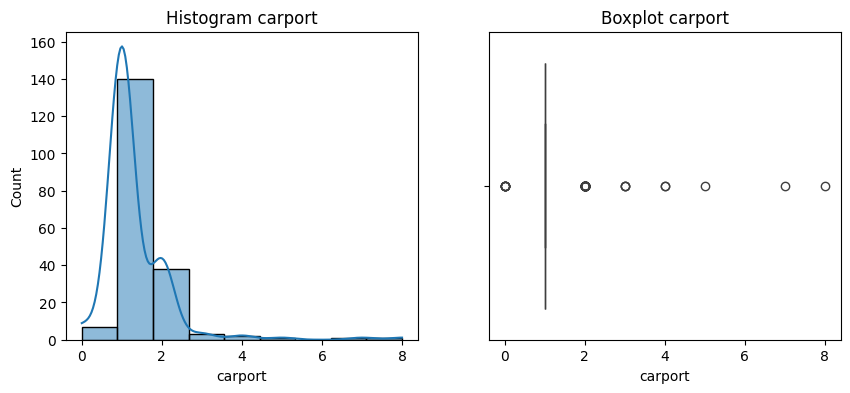

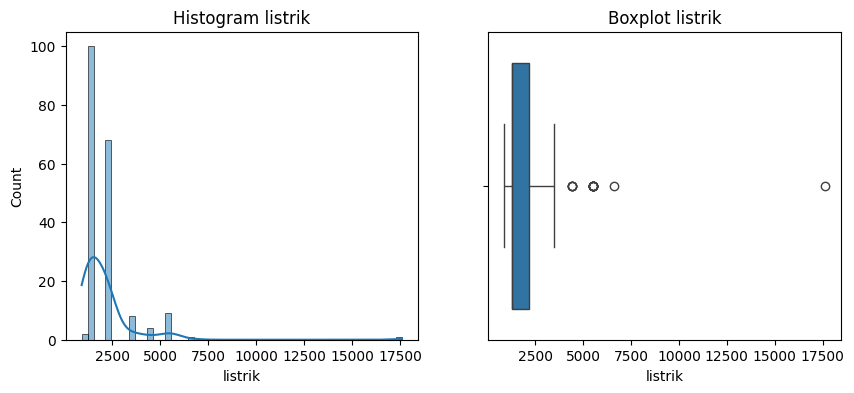

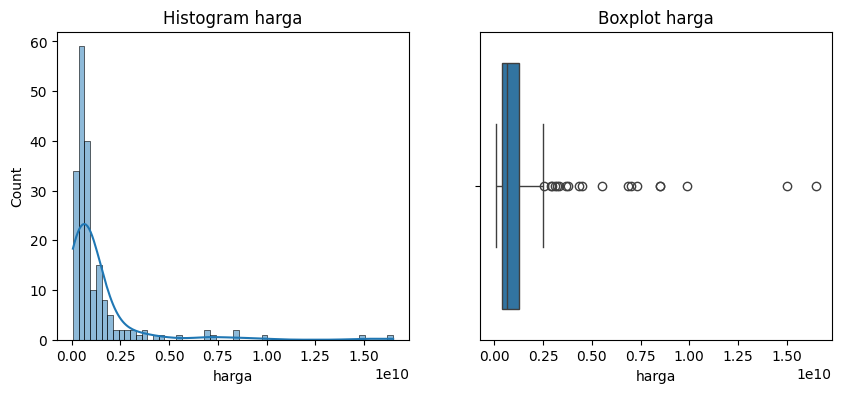

In [ ]:
# Cek Distribusi Data
import matplotlib.pyplot as plt
import seaborn as sns

kolom_numerik = ['LT','LB','KT','KM','garasi','carport','listrik','harga']

for col in kolom_numerik:
    fig, axes = plt.subplots(1, 2, figsize=(10,4))

    # Histogram
    sns.histplot(dfB[col].dropna(), kde=True, ax=axes[0])
    axes[0].set_title(f"Histogram {col}")

    # Boxplot
    sns.boxplot(x=dfB[col], ax=axes[1])
    axes[1].set_title(f"Boxplot {col}")

    plt.show()

In [ ]:
for col in kolom_numerik:
    print(f"{col}: Skewness = {dfB[col].skew():.2f}")

LT: Skewness = 4.44
LB: Skewness = 4.71
KT: Skewness = 1.62
KM: Skewness = 1.82
garasi: Skewness = 3.40
carport: Skewness = 4.11
listrik: Skewness = 5.82
harga: Skewness = 4.55


In [ ]:
# Cek statistik data
dfB.describe(include="all")

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
count,193,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193,193,193.000000,1.930000e+02,193,193
unique,7,NaN,NaN,NaN,NaN,NaN,NaN,27,3,NaN,NaN,186,171
top,06-12-2021,NaN,NaN,NaN,NaN,NaN,NaN,Gunung Putri,SHM,NaN,NaN,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
freq,52,NaN,NaN,NaN,NaN,NaN,NaN,26,155,NaN,NaN,6,6
mean,NaN,143.575130,98.663212,2.694301,1.797927,0.155440,1.310881,NaN,NaN,2076.165803,1.289362e+09,NaN,NaN
std,NaN,191.576208,125.851746,1.110939,1.175087,0.485931,0.905271,NaN,NaN,1562.633932,2.115854e+09,NaN,NaN
min,NaN,30.000000,21.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,900.000000,6.500000e+07,NaN,NaN
25%,NaN,66.000000,36.000000,2.000000,1.000000,0.000000,1.000000,NaN,NaN,1300.000000,3.990000e+08,NaN,NaN
50%,NaN,84.000000,58.000000,2.000000,1.000000,0.000000,1.000000,NaN,NaN,1300.000000,6.700000e+08,NaN,NaN
75%,NaN,120.000000,90.000000,3.000000,2.000000,0.000000,1.000000,NaN,NaN,2200.000000,1.250000e+09,NaN,NaN


In [ ]:
# mengubah created_at menjadi date time
dfB['created_at'] = pd.to_datetime(dfB['created_at'], errors='coerce')
dfB['created_at'] = pd.to_datetime(dfB['created_at'], format='%d-%m-%Y', errors='coerce')
dfB.info()


<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 193
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  193 non-null    datetime64[ns]
 1   LT          193 non-null    float64       
 2   LB          193 non-null    float64       
 3   KT          193 non-null    float64       
 4   KM          193 non-null    float64       
 5   garasi      193 non-null    float64       
 6   carport     193 non-null    float64       
 7   lokasi      193 non-null    object        
 8   sertifikat  193 non-null    object        
 9   listrik     193 non-null    float64       
 10  harga       193 non-null    float64       
 11  URL         193 non-null    object        
 12  deskripsi   193 non-null    object        
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 21.2+ KB


In [ ]:
# Mengisi missing values untuk kolom numerik
dfB['LT'] = dfB['LT'].fillna(dfB['LT'].median())  # Luas Tanah
dfB['LB'] = dfB['LB'].fillna(dfB['LB'].median())  # Luas Bangunan
dfB['KT'] = dfB['KT'].fillna(dfB['KT'].median())  # Jumlah Kamar Tidur
dfB['KM'] = dfB['KM'].fillna(dfB['KM'].median())  # Jumlah Kamar Mandi
dfB['garasi'] = dfB['garasi'].fillna(0)  # Mengisi dengan 0 jika tidak ada garasi
dfB['carport'] = dfB['carport'].fillna(0)  # Mengisi dengan 0 jika tidak ada carport
dfB['listrik'] = dfB['listrik'].fillna(dfB['listrik'].median())  # Daya listrik

# Imputasi missing value var.kategorik
dfB["lokasi"].fillna(dfB["lokasi"].mode()[0], inplace=True)
dfB["sertifikat"].fillna(dfB["sertifikat"].mode()[0], inplace=True)
dfB["deskripsi"].fillna("Tidak ada deskripsi", inplace=True)

# Imputasi missing dengan forward fill untuk kolom waktu
dfB['created_at'].fillna(method='ffill', inplace=True)  # Mengisi dengan nilai sebelumnya

# Menggunakan interpolasi untuk kolom numerik
dfB['harga'] = dfB['harga'].interpolate()

# Mengisi missing values untuk kolom URL
dfB['URL'].fillna('URL tidak tersedia', inplace=True)  # Mengisi missing URL dengan 'URL tidak tersedia'

# Cek kembali apakah masih ada missing value
print("Missing Values setelah penanganan akhir:")
print(dfB.isnull().sum())

Missing Values setelah penanganan akhir:
created_at    0
LT            0
LB            0
KT            0
KM            0
garasi        0
carport       0
lokasi        0
sertifikat    0
listrik       0
harga         0
URL           0
deskripsi     0
dtype: int64


/tmp/ipython-input-3763759227.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfB["lokasi"].fillna(dfB["lokasi"].mode()[0], inplace=True)
/tmp/ipython-input-3763759227.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [ ]:
display(dfB['LT'].value_counts())

,count
LT,
60.0,36
72.0,27
90.0,10
84.0,10
66.0,9
...,...
1058.0,1
168.0,1
67.0,1


In [ ]:
display(dfB['garasi'].value_counts())

,count
garasi,
0.0,173
1.0,13
2.0,7
3.0,1


In [ ]:
display(dfB['carport'].value_counts())

,count
carport,
1.0,140
2.0,38
0.0,8
3.0,3
4.0,2
8.0,1
7.0,1
5.0,1


In [ ]:
display(dfB['lokasi'].value_counts())

,count
lokasi,
Gunung Putri,27
Babakan Madang,25
Parung,20
Bogor Barat,16
Bojonggede,12
Cibinong,12
Cileungsi,11
Bogor Utara,11
Jonggol,7


In [ ]:
# mapping lokasi ke kota
mapping = {
    "Bogor Barat": "Bogor", "Bogor Utara": "Bogor", "Bogor Selatan": "Bogor",
    "Bogor Timur": "Bogor", "Bogor Tengah": "Bogor", "Tanah Sareal": "Bogor",
    "Cipanas": "Bogor"
}

# tambahkan kolom kota (default Kabupaten Bogor jika tidak ada di mapping)
dfB["Kota"] = dfB["lokasi"].map(mapping).fillna("Bogor")

# tampilkan jumlah per kota
display(dfB["Kota"].value_counts())


,count
Kota,
Bogor,194


In [ ]:
# Cek Outlier
Q1B_harga = dfB['harga'].quantile(0.25)
Q2B_harga = dfB['harga'].quantile(0.50)
Q3B_harga = dfB['harga'].quantile(0.75)
IQRB_harga = Q3B_harga - Q1B_harga
outlierB_harga = (dfB['harga'] <= Q1B_harga - 1.5*IQRB_harga) | (dfB['harga'] >= Q3B_harga + 1.5*IQRB_harga)
print(f"Banyaknya outlier {'harga'} = ",sum(outlierB_harga))

Banyaknya outlier harga =  19


In [ ]:
# Data Outlier
dfB_outlier_harga = dfB[outlierB_harga]

# Data non-outlier
dfB_harga = dfB[~outlierB_harga]

# Menampilkan jumlah baris masing - masing
print("Jumlah data outlier:", len(dfB_outlier_harga))
print("Jumlah data non-outlier:", len(dfB_harga))

Jumlah data outlier: 19
Jumlah data non-outlier: 175


In [ ]:
dfB_outlier_harga

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi,Kota
26,2021-06-12,1500.0,1200.0,8.0,6.0,0.0,8.0,Cileungsi,SHM,17600.0,9.900000e+09,https://www.rumah.com/listing-properti/dijual-...,"Akses mobil besar 40 ft bisa masuk, parkir mob...",Bogor
27,2021-06-12,699.0,350.0,5.0,5.0,0.0,2.0,Babakan Madang,SHM,3500.0,7.300000e+09,https://www.rumah.com/listing-properti/dijual-...,"Plus kolam renang Babakan Madang, dekat dengan...",Bogor
36,2021-06-12,314.0,300.0,4.0,4.0,1.0,7.0,Bogor Timur,SHM,3500.0,2.900000e+09,https://www.rumah.com/listing-properti/dijual-...,"Taman+Gazebo, Selangkah ke Tol&Terminal Barana...",Bogor
37,2021-06-12,1272.0,500.0,4.0,5.0,0.0,2.0,Babakan Madang,SHM,5500.0,1.500000e+10,https://www.rumah.com/listing-properti/dijual-...,Rumah best view,Bogor
40,2021-06-12,338.0,250.0,4.0,3.0,0.0,2.0,Babakan Madang,SHM,3500.0,3.700000e+09,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan view golf, dekat sekolah, beberap...",Bogor
46,2021-06-12,167.0,300.0,4.0,3.0,2.0,0.0,Gunung Putri,SHM,5500.0,3.200000e+09,https://www.rumah.com/listing-properti/dijual-...,"Dekat Water Splash CIbubur Country, 10 menit k...",Bogor
50,2021-06-12,200.0,202.0,5.0,5.0,2.0,2.0,Gunung Putri,SHM,4400.0,3.128000e+09,https://www.rumah.com/listing-properti/dijual-...,"One gate system, keamanan 24 jam, fasilitas le...",Bogor
52,2021-06-12,162.0,164.0,5.0,5.0,0.0,2.0,Gunung Putri,SHM,3500.0,2.536000e+09,https://www.rumah.com/listing-properti/dijual-...,"Fasilitas lengkap , dekat dengan fasilitas kom...",Bogor
54,2021-07-12,200.0,260.0,4.0,4.0,1.0,1.0,Gunung Putri,SHM,4400.0,2.975000e+09,https://www.rumah.com/listing-properti/dijual-...,"Rumah siap huni, lokasi strategis",Bogor
93,2021-02-12,240.0,358.0,4.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,4.500000e+09,https://www.rumah123.com/properti/bogor/hos927...,Lokasi strategis,Bogor


#**KOTA JAKARTA**

In [ ]:
dfJ.head()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfJ['created_at'] = pd.to_datetime(dfJ['created_at'], errors='coerce', format= '%d-%m-%Y')
dfJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   created_at   121 non-null    datetime64[ns]
 1   LT           121 non-null    float64       
 2   LB           121 non-null    float64       
 3   KT           121 non-null    float64       
 4   KM           121 non-null    float64       
 5   garasi       44 non-null     float64       
 6   carport      90 non-null     float64       
 7   lokasi       121 non-null    object        
 8   sertifikat   119 non-null    object        
 9   listrik      120 non-null    float64       
 10  hadap        36 non-null     object        
 11  harga        121 non-null    float64       
 12  URL          121 non-null    object        
 13  deskripsi    112 non-null    object        
 14  Unnamed: 14  0 non-null      float64       
 15  Unnamed: 15  0 non-null      float64       
 16  Unname

In [ ]:
display(dfJ['created_at'].value_counts())

,count
created_at,
2021-12-06,41
2021-12-07,14
2021-12-05,12
2021-12-02,8
2021-11-22,7
2021-11-06,7
2021-11-29,6
2021-12-03,4
2021-12-04,4


In [ ]:
#Informasi Data
dfJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024 entries, 0 to 1023
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   created_at   121 non-null    datetime64[ns]
 1   LT           121 non-null    float64       
 2   LB           121 non-null    float64       
 3   KT           121 non-null    float64       
 4   KM           121 non-null    float64       
 5   garasi       44 non-null     float64       
 6   carport      90 non-null     float64       
 7   lokasi       121 non-null    object        
 8   sertifikat   119 non-null    object        
 9   listrik      120 non-null    float64       
 10  hadap        36 non-null     object        
 11  harga        121 non-null    float64       
 12  URL          121 non-null    object        
 13  deskripsi    112 non-null    object        
 14  Unnamed: 14  0 non-null      float64       
 15  Unnamed: 15  0 non-null      float64       
 16  Unname

### *Preprocessing Data*

Mengetahui isi pada data dengan melakukan pengecekan pada setiap kolom dan baris pada data tersebut.

In [ ]:
dfJ.isnull().sum()

,0
created_at,903
LT,903
LB,903
KT,903
KM,903
garasi,980
carport,934
lokasi,903
sertifikat,905
listrik,904


In [ ]:
dfJ.describe()

,created_at,LT,LB,KT,KM,garasi,carport,listrik,harga,Unnamed: 14,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,121,121.000000,121.000000,121.000000,121.000000,44.000000,90.000000,120.000000,1.210000e+02,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2021-11-27 01:35:12.396694272,247.586777,279.495868,4.272727,3.380165,1.863636,1.955556,5425.000000,8.985955e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2021-02-12 00:00:00,16.000000,21.000000,1.000000,1.000000,1.000000,1.000000,900.000000,3.800000e+08,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2021-11-29 00:00:00,84.000000,97.000000,3.000000,2.000000,1.000000,1.000000,2200.000000,1.600000e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2021-12-05 00:00:00,135.000000,200.000000,4.000000,3.000000,1.000000,2.000000,3500.000000,3.400000e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2021-12-06 00:00:00,250.000000,350.000000,5.000000,4.000000,2.000000,2.000000,4425.000000,7.250000e+09,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2021-12-26 00:00:00,3422.000000,2000.000000,10.000000,10.000000,8.000000,10.000000,66000.000000,1.050000e+11,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,368.384642,285.275631,1.901754,1.709075,1.518734,1.475730,7891.589502,1.587610e+10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfJ.isna().mean() * 100

,0
created_at,88.183594
LT,88.183594
LB,88.183594
KT,88.183594
KM,88.183594
garasi,95.703125
carport,91.210938
lokasi,88.183594
sertifikat,88.378906
listrik,88.281250


Melakukan pengatasan *missing value* pada data

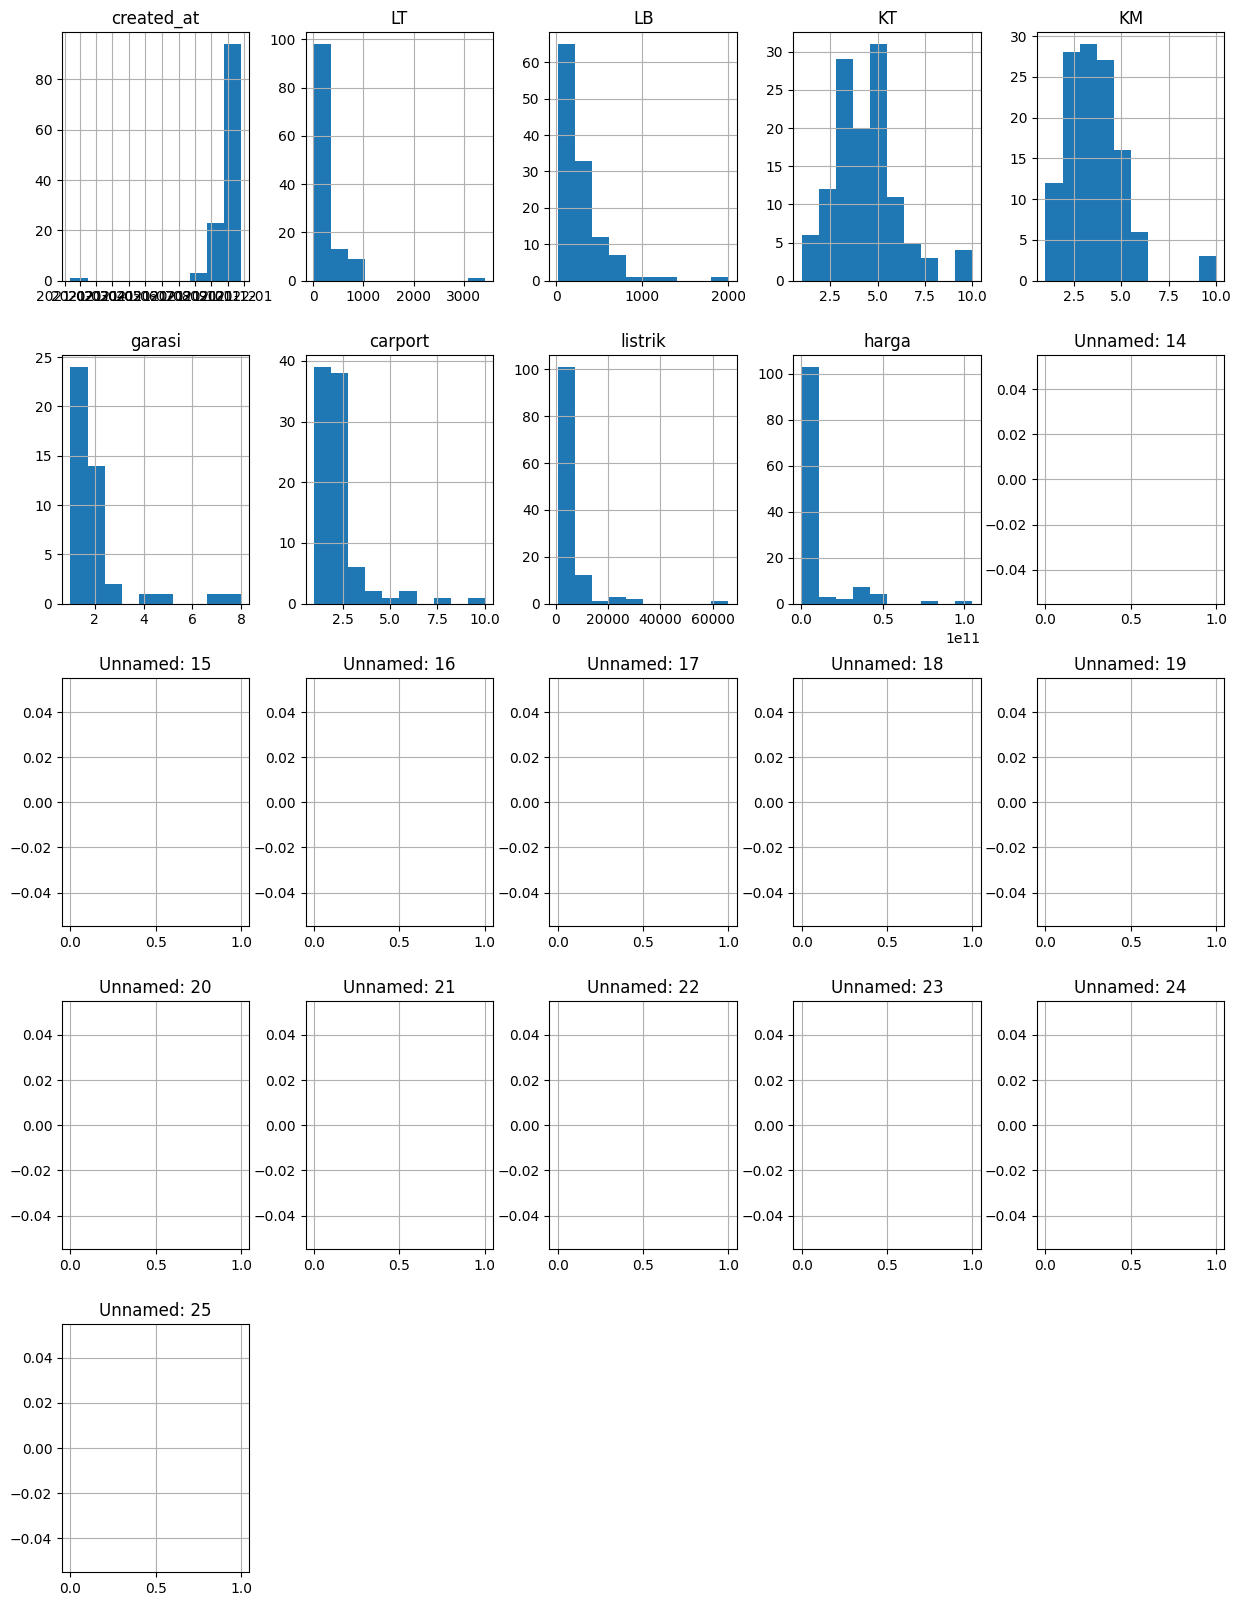

In [ ]:
import matplotlib.pyplot as plt
dfJ.hist(figsize=(15,20))
plt.xlabel("Jumlah Data")
plt.ylabel("Frekuensi")
plt.show()

*DROP DATA 1*

In [ ]:
# Melakukan pengatasan pada beberapa kolom pada data
dfJ1 = dfJ.drop(["hadap", "Unnamed: 14", "Unnamed: 15", "Unnamed: 16", "Unnamed: 17", "Unnamed: 18", "Unnamed: 19",
          "Unnamed: 20", "Unnamed: 21", "Unnamed: 22", "Unnamed: 23", "Unnamed: 24", "Unnamed: 25"], axis=1)
dfJ1.head(10)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,2021-12-06,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,2021-12-02,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,2021-12-06,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,2021-12-06,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,2021-12-06,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
5,2021-12-06,217.0,245.0,6.0,4.0,NaN,2.0,Jakarta Pusat,SHM,4400.0,5.500000e+09,https://www.rumah.com/listing-properti/dijual-...,NaN
6,2021-12-06,424.0,1000.0,4.0,5.0,1.0,1.0,Jakarta Pusat,SHM,33000.0,4.950000e+10,https://www.rumah.com/listing-properti/dijual-...,"Rumah mewah berkonsep hotel bintang 5, interio..."
7,2021-12-06,597.0,700.0,5.0,4.0,2.0,5.0,Jakarta Pusat,SHM,8000.0,4.000000e+10,https://www.rumah.com/listing-properti/dijual-...,Lokasi strategis hanya 5 menit ke pusat kulin...
8,2021-12-06,60.0,98.0,3.0,3.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,1.700000e+09,https://www.rumah.com/listing-properti/dijual-...,Lokasi strategis di perbatasan Jakarta Barat d...
9,2021-12-06,33.0,42.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Desain menarik dengan konsep Townhouse, akses ..."


Masih terdapat nilai kosong pada beberapa baris yang ada pada data yang sebelumnya tidak dilakukan drop data.

In [ ]:
dfJ1.isnull().sum()

,0
created_at,903
LT,903
LB,903
KT,903
KM,903
garasi,980
carport,934
lokasi,903
sertifikat,905
listrik,904


In [ ]:
# Melakukan pengecekan pada baris dari setiap kolom yang memiliki nilai kosong
summary = []

for col in dfJ1.columns:
    nan_count = dfJ1[col].isna().sum()
    not_nan_count = dfJ1[col].notna().sum()

    summary.append({
        "Kolom": col,
        "Jumlah NaN": nan_count,
        "Jumlah Tidak NaN": not_nan_count,
        "NaN - Tidak NaN": nan_count - not_nan_count
    })

summary_df = pd.DataFrame(summary)
print(summary_df)

         Kolom  Jumlah NaN  Jumlah Tidak NaN  NaN - Tidak NaN
0   created_at         903               121              782
1           LT         903               121              782
2           LB         903               121              782
3           KT         903               121              782
4           KM         903               121              782
5       garasi         980                44              936
6      carport         934                90              844
7       lokasi         903               121              782
8   sertifikat         905               119              786
9      listrik         904               120              784
10       harga         903               121              782
11         URL         903               121              782
12   deskripsi         912               112              800


In [ ]:
for col in dfJ1.columns:
    nan_index = dfJ1[dfJ1[col].isna()].index
    if not nan_index.empty:
        print(f"Kolom {col} ada NaN di baris {nan_index.min()} sampai {nan_index.max()} (total {len(nan_index)} baris)")


Kolom created_at ada NaN di baris 121 sampai 1023 (total 903 baris)
Kolom LT ada NaN di baris 121 sampai 1023 (total 903 baris)
Kolom LB ada NaN di baris 121 sampai 1023 (total 903 baris)
Kolom KT ada NaN di baris 121 sampai 1023 (total 903 baris)
Kolom KM ada NaN di baris 121 sampai 1023 (total 903 baris)
Kolom garasi ada NaN di baris 0 sampai 1023 (total 980 baris)
Kolom carport ada NaN di baris 0 sampai 1023 (total 934 baris)
Kolom lokasi ada NaN di baris 121 sampai 1023 (total 903 baris)
Kolom sertifikat ada NaN di baris 94 sampai 1023 (total 905 baris)
Kolom listrik ada NaN di baris 46 sampai 1023 (total 904 baris)
Kolom harga ada NaN di baris 121 sampai 1023 (total 903 baris)
Kolom URL ada NaN di baris 121 sampai 1023 (total 903 baris)
Kolom deskripsi ada NaN di baris 5 sampai 1023 (total 912 baris)


In [ ]:
print(dfJ1)

     created_at     LT     LB   KT   KM  garasi  carport         lokasi  \
0    2021-12-06  202.0  198.0  8.0  3.0     NaN      NaN  Jakarta Pusat   
1    2021-12-02   30.0   55.0  2.0  1.0     NaN      1.0  Jakarta Pusat   
2    2021-12-06   19.0   35.0  2.0  1.0     NaN      NaN  Jakarta Pusat   
3    2021-12-06   33.0   42.0  2.0  2.0     NaN      1.0  Jakarta Pusat   
4    2021-12-06   30.0   55.0  2.0  2.0     NaN      1.0  Jakarta Pusat   
...         ...    ...    ...  ...  ...     ...      ...            ...   
1019        NaT    NaN    NaN  NaN  NaN     NaN      NaN            NaN   
1020        NaT    NaN    NaN  NaN  NaN     NaN      NaN            NaN   
1021        NaT    NaN    NaN  NaN  NaN     NaN      NaN            NaN   
1022        NaT    NaN    NaN  NaN  NaN     NaN      NaN            NaN   
1023        NaT    NaN    NaN  NaN  NaN     NaN      NaN            NaN   

     sertifikat  listrik         harga  \
0           SHM   2200.0  4.500000e+09   
1           SHM

Melakukan pengatasan Nilai NAN pada baris yang sudah full dengan NAN dari setiap kolom

*DROP DATA #2*

In [ ]:
# Melakukan drop pada baris data di setiap kolom setelah melakukan drop data #1
dfJ2 = dfJ1.drop(dfJ.index[121:1024])
dfJ2

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,2021-12-06,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,2021-12-02,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,2021-12-06,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,2021-12-06,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,2021-12-06,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2021-11-22,220.0,239.0,5.0,4.0,1.0,2.0,Jakarta Timur,PPJB,3500.0,3.850000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Mewah siap huni 2 lantai 220m 10x22 type...
117,2021-12-06,70.0,57.0,3.0,2.0,NaN,2.0,Jakarta Timur,SHM,2200.0,8.800000e+08,https://www.rumah.com/listing-properti/dijual-...,Rumah Signature Location & Access :\n• 2 Menit...
118,2021-12-06,315.0,280.0,4.0,3.0,1.0,2.0,Jakarta Timur,SHM + IMB,3500.0,4.300000e+09,https://www.rumah.com/listing-properti/dijual-...,"Rumah 1, 5 Lantai Luas Strategis di Pondok Bam..."
119,2021-12-06,135.0,190.0,5.0,5.0,NaN,2.0,Jakarta Timur,SHM + IMB,2200.0,3.400000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Baru Non Komplek Posisi Hook Lokasi Stra...


In [ ]:
dfJ2["harga"].iloc[100:121]

,harga
100,3.500000e+09
101,1.650000e+09
102,2.350000e+09
103,2.750000e+09
104,3.300000e+09
105,2.500000e+09
106,8.900000e+08
107,1.310000e+09
108,3.600000e+09
109,2.230000e+09


In [ ]:
# Pengecekan setelah drop data #2
dfJ2.isnull().sum()

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,77
carport,31
lokasi,0
sertifikat,2
listrik,1


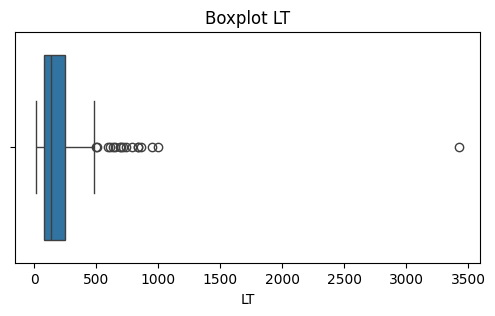

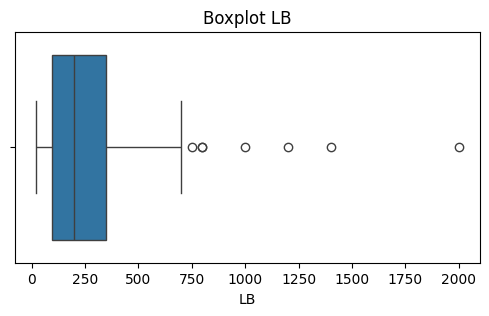

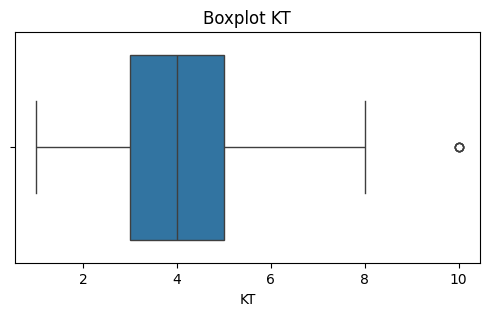

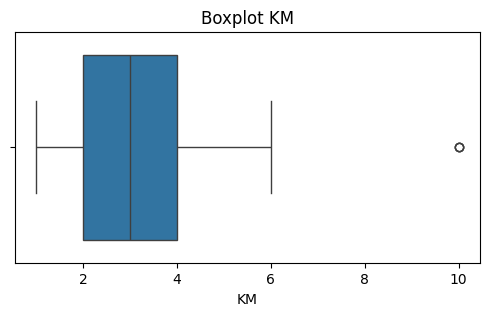

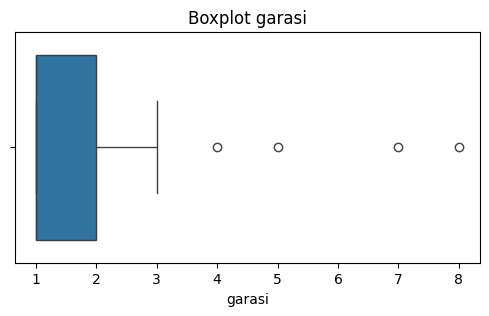

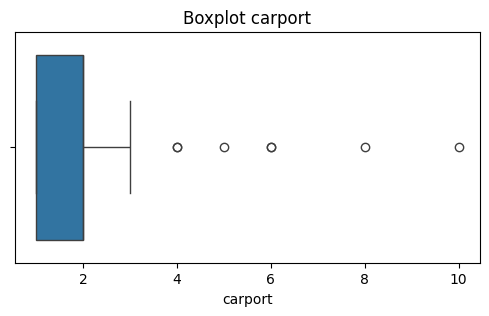

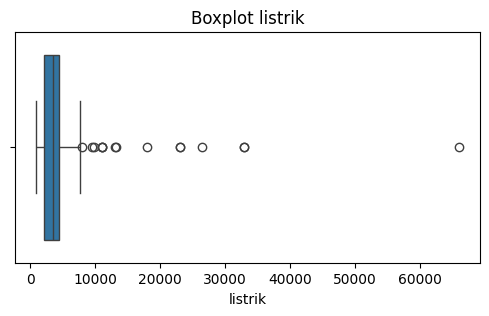

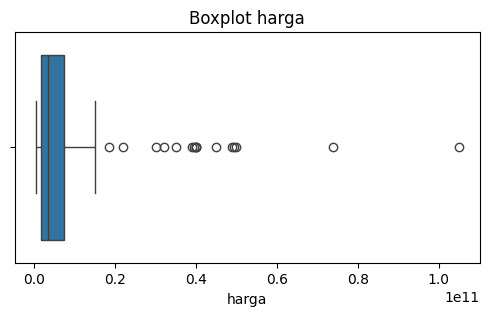

In [ ]:
import seaborn as sns
for col in dfJ2.select_dtypes(include=["int64", "float64"]).columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=dfJ[col].dropna())
    plt.title(f"Boxplot {col}")
    plt.show()

**Melakukan Imputasi Pada Kolom Yang Masih Memiliki Nilai NAN (Not a Number)**
1. Menggunakan median untuk data Numerik
2. Menggunalan Mode untuk data Kategorik

In [ ]:
# Imputasi Nilai NAN pada kolom garasi
dfJ2["garasi"].fillna(dfJ2["garasi"].median(), inplace=True)
print(dfJ2.isnull().sum())

created_at     0
LT             0
LB             0
KT             0
KM             0
garasi         0
carport       31
lokasi         0
sertifikat     2
listrik        1
harga          0
URL            0
deskripsi      9
dtype: int64


/tmp/ipython-input-2660155481.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfJ2["garasi"].fillna(dfJ2["garasi"].median(), inplace=True)


In [ ]:
# Imputasi Nilai NAN pada kolom garasi
dfJ2["carport"].fillna(dfJ2["carport"].median(), inplace=True)
print(dfJ2.isnull().sum())

created_at    0
LT            0
LB            0
KT            0
KM            0
garasi        0
carport       0
lokasi        0
sertifikat    2
listrik       1
harga         0
URL           0
deskripsi     9
dtype: int64


/tmp/ipython-input-3296610406.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfJ2["carport"].fillna(dfJ2["carport"].median(), inplace=True)


In [ ]:
# Imputasi Nilai NAN pada kolom listrik
dfJ2["listrik"].fillna(dfJ2["listrik"].median(), inplace=True)
print(dfJ2.isnull().sum())

created_at    0
LT            0
LB            0
KT            0
KM            0
garasi        0
carport       0
lokasi        0
sertifikat    2
listrik       0
harga         0
URL           0
deskripsi     9
dtype: int64


/tmp/ipython-input-155718751.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfJ2["listrik"].fillna(dfJ2["listrik"].median(), inplace=True)


In [ ]:
# Imputasi Nilai NAN pada kolom sertifikat
dfJ2["sertifikat"].fillna(dfJ2["sertifikat"].mode()[0], inplace=True)
print(dfJ2.isnull().sum())

created_at    0
LT            0
LB            0
KT            0
KM            0
garasi        0
carport       0
lokasi        0
sertifikat    0
listrik       0
harga         0
URL           0
deskripsi     9
dtype: int64


/tmp/ipython-input-2429088779.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfJ2["sertifikat"].fillna(dfJ2["sertifikat"].mode()[0], inplace=True)


In [ ]:
# Imputasi Nilai NAN pad kolom listrik
dfJ2["deskripsi"].fillna(dfJ2["deskripsi"].mode()[0], inplace=True)
print(dfJ2.isnull().sum())

created_at    0
LT            0
LB            0
KT            0
KM            0
garasi        0
carport       0
lokasi        0
sertifikat    0
listrik       0
harga         0
URL           0
deskripsi     0
dtype: int64


/tmp/ipython-input-2703573935.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfJ2["deskripsi"].fillna(dfJ2["deskripsi"].mode()[0], inplace=True)


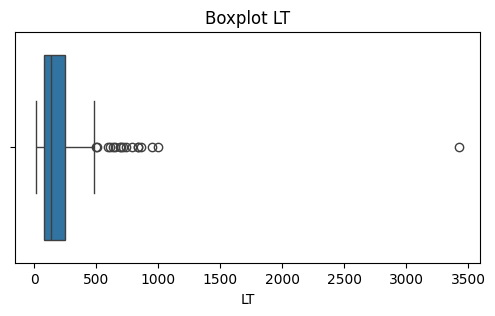

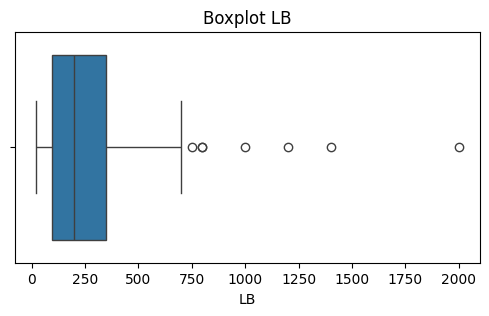

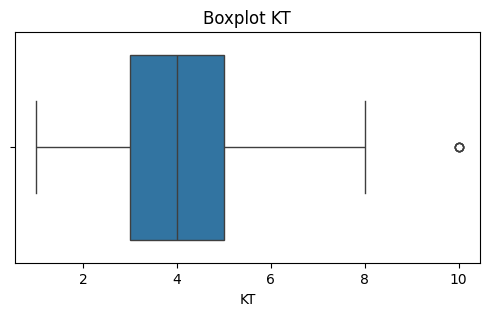

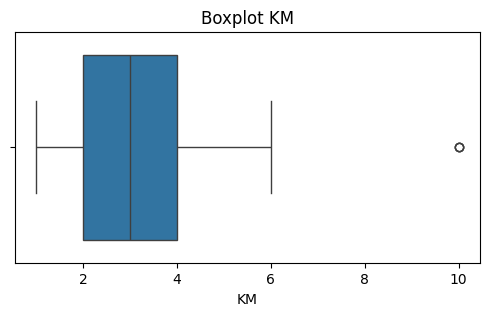

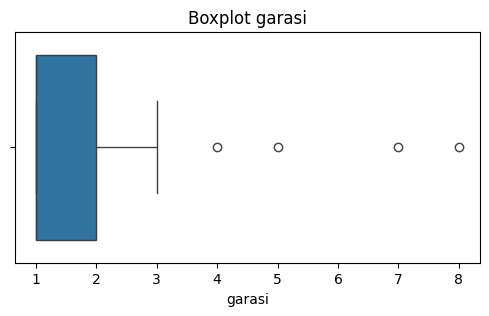

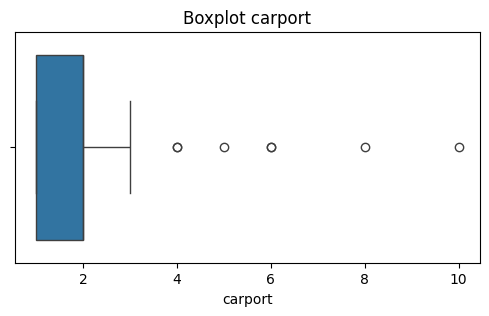

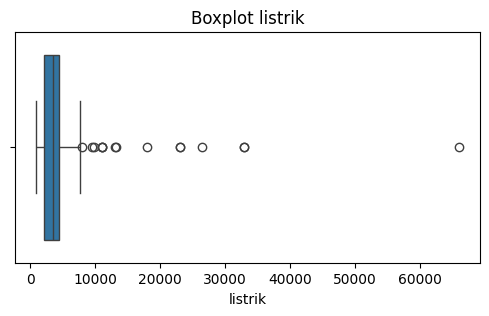

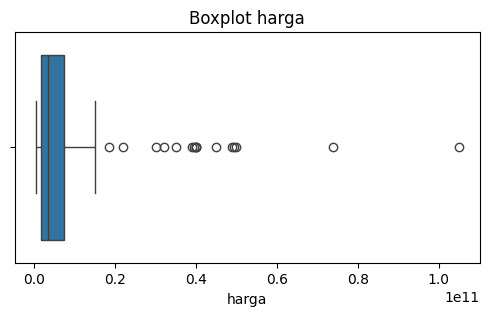

In [ ]:
import seaborn as sns
for col in dfJ2.select_dtypes(include=["int64", "float64"]).columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=dfJ[col].dropna())
    plt.title(f"Boxplot {col}")
    plt.show()

In [ ]:
# Menghapus outlier menggunakan IQR
Q1 = dfJ2.select_dtypes(include=["int64", "float64"]).quantile(0.25)
Q3 = dfJ2.select_dtypes(include=["int64", "float64"]).quantile(0.75)
IQR = Q3 - Q1

dfJ2_cleaned = dfJ2[~((dfJ2.select_dtypes(include=["int64", "float64"]) < (Q1 - 1.5 * IQR)) | (dfJ2.select_dtypes(include=["int64", "float64"]) > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Shape of the original dataframe:", dfJ2.shape)
print("Shape of the cleaned dataframe:", dfJ2_cleaned.shape)

Shape of the original dataframe: (121, 13)
Shape of the cleaned dataframe: (83, 13)


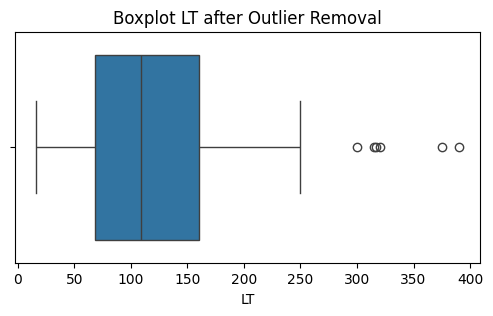

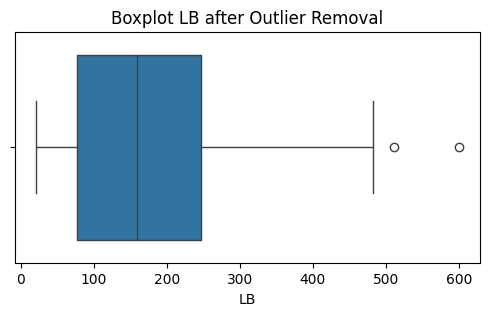

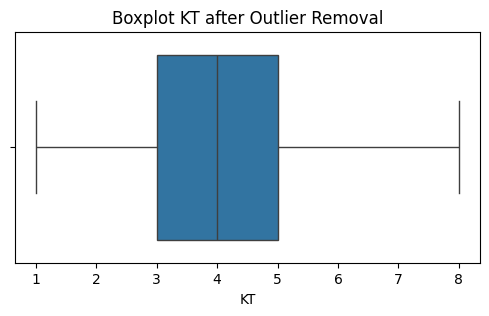

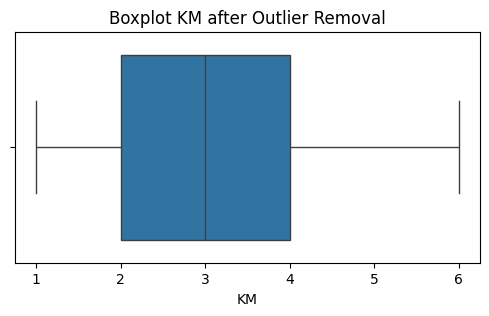

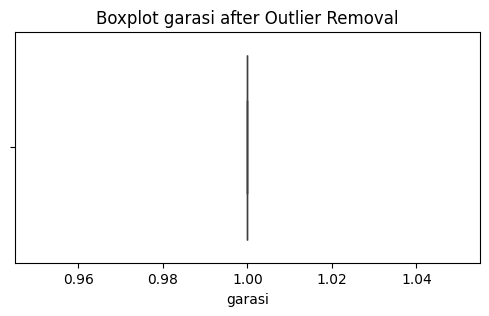

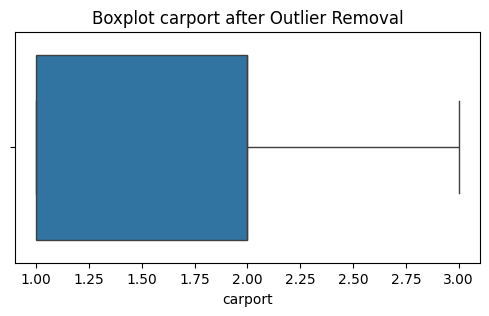

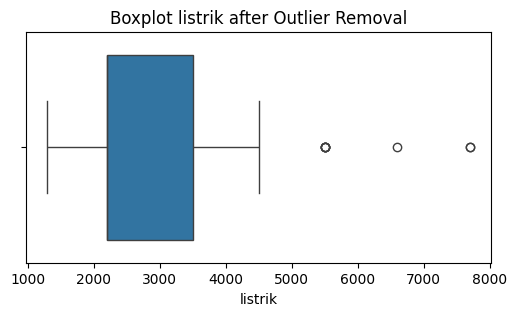

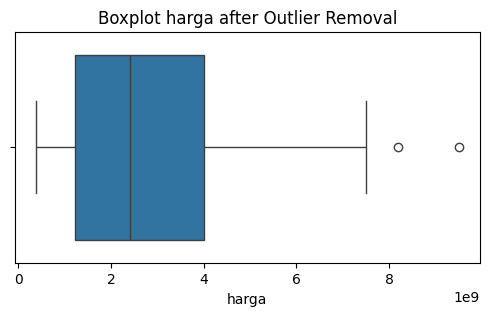

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in dfJ2_cleaned.select_dtypes(include=["int64", "float64"]).columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=dfJ2_cleaned[col])
    plt.title(f"Boxplot {col} after Outlier Removal")
    plt.show()

In [ ]:
dfJ2_cleaned.isnull().sum()

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,0
carport,0
lokasi,0
sertifikat,0
listrik,0


Visualisasi Data dan Interpretasri Setelah Tahap **Preprocessing**

Kecenderungan harga rumah dari setiap kota : Murah/Mahal

In [ ]:
harga_kota = dfJ2_cleaned.groupby("lokasi")["harga"].agg(["median", "mean", "count"]).sort_values(by="median", ascending=False)
print(harga_kota)


                       median          mean  count
lokasi                                            
Jakarta Selatan  4.100000e+09  5.157143e+09      7
Jakarta Utara    2.900000e+09  3.636468e+09     18
Jakarta Barat    2.400000e+09  2.697768e+09     21
Jakarta Timur    2.400000e+09  2.469667e+09     21
Jakarta Pusat    9.675000e+08  1.434875e+09     16


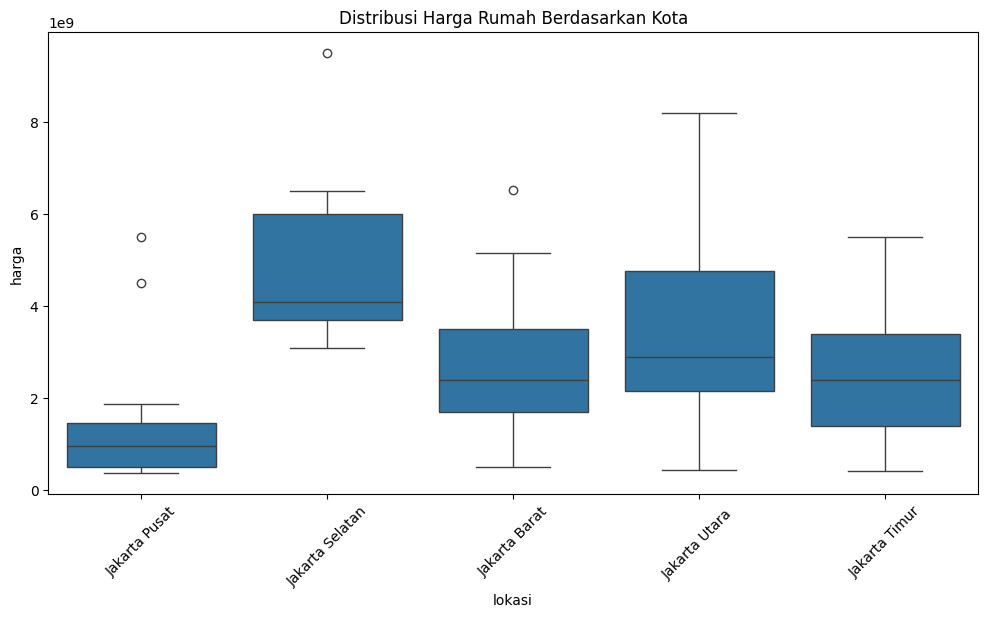

/tmp/ipython-input-3997856435.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="lokasi", y="harga", data=dfJ2_cleaned, estimator=np.median, ci=None)


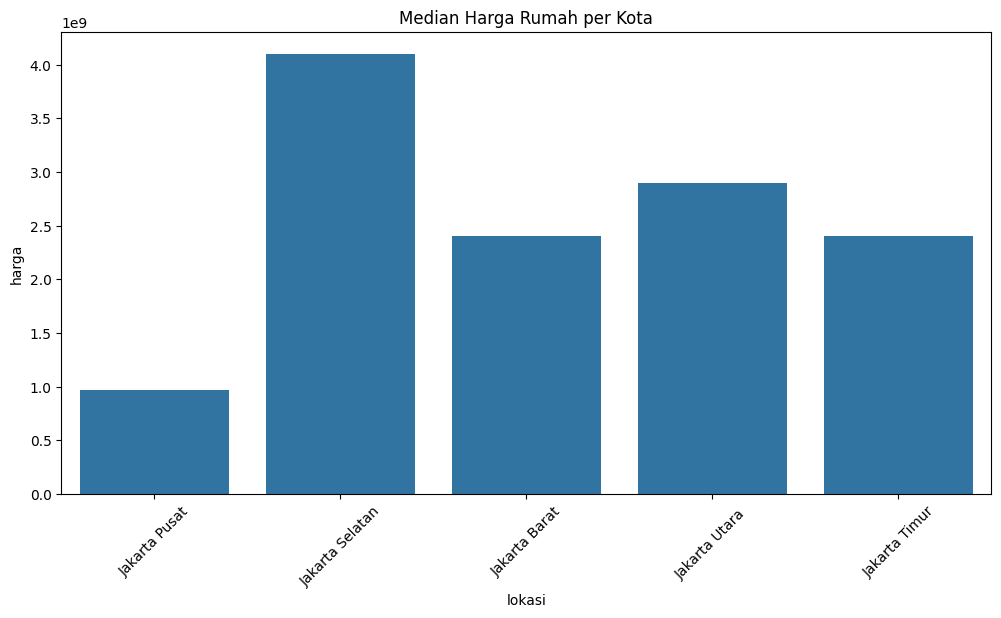

In [ ]:
import numpy as np
plt.figure(figsize=(12,6))
sns.boxplot(x="lokasi", y="harga", data=dfJ2_cleaned)
plt.title("Distribusi Harga Rumah Berdasarkan Kota")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(x="lokasi", y="harga", data=dfJ2_cleaned, estimator=np.median, ci=None)
plt.title("Median Harga Rumah per Kota")
plt.xticks(rotation=45)
plt.show()

Rekomendasi kepada RPPI : buka kantor cabang di Jakarta Selatan karena pasar premium lebih konsisten dan potensi keuntungan per transaksi lebih tinggi.

In [ ]:
# Cek karakteristik umum rumah yang paling sering muncul

# 1. Harga
dfJ2_cleaned["kategori_harga"] = pd.cut(
    dfJ2_cleaned["harga"],
    bins=[0, 2000000000, 5000000000, 10000000000, dfJ2["harga"].max()],
    labels=["<2M", "2M-5M", "5M-10M", ">10M"]
)

# 2. Ringkasan modus setiap variabel penting
karakteristik = {
    "Kategori Harga": dfJ2_cleaned["kategori_harga"].mode()[0],
    "Median Harga": dfJ2_cleaned["harga"].median(),
    "LT Paling Umum": dfJ2_cleaned["LT"].mode()[0],
    "LB Paling Umum": dfJ2_cleaned["LB"].mode()[0],
    "Kamar Tidur (KT)": dfJ2_cleaned["KT"].mode()[0],
    "Kamar Mandi (KM)": dfJ2_cleaned["KM"].mode()[0],
    "Listrik": dfJ2_cleaned["listrik"].mode()[0],
    "Garasi": dfJ2_cleaned["garasi"].mode()[0],
    "Carport": dfJ2_cleaned["carport"].mode()[0],
    "Sertifikat": dfJ2_cleaned["sertifikat"].mode()[0],
    "Lokasi": dfJ2_cleaned["lokasi"].mode()[0]
}

# Print hasil
for k, v in karakteristik.items():
    print(f"{k}: {v}")


Kategori Harga: 2M-5M
Median Harga: 2400000000.0
LT Paling Umum: 90.0
LB Paling Umum: 200.0
Kamar Tidur (KT): 3.0
Kamar Mandi (KM): 2.0
Listrik: 2200.0
Garasi: 1.0
Carport: 2.0
Sertifikat: SHM
Lokasi: Jakarta Barat


/tmp/ipython-input-1993800286.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfJ2_cleaned["kategori_harga"] = pd.cut(


Rumah yang paling banyak dijual dalam dataset ini adalah rumah dengan harga di kisaran 2–5 M, memiliki LT sekitar 120 m² dan LB sekitar 90 m², dengan 5 kamar tidur, 3 kamar mandi, listrik 2200 VA, dilengkapi garasi & carport, bersertifikat SHM, dan paling sering berada di Jakarta Barat.

Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?

In [ ]:
# 1. Filter rumah dengan harga <= 25 M
calon_investasi = dfJ2_cleaned[dfJ2_cleaned["harga"] <= 25000000000]

# 2. Hitung median harga per kota
median_per_kota = dfJ2_cleaned.groupby("lokasi")["harga"].median()

# 3. Tambahkan kolom apakah rumah undervalued (lebih murah dari median kota)
calon_investasi = calon_investasi.copy()
calon_investasi["median_kota"] = calon_investasi["lokasi"].map(median_per_kota)
calon_investasi["undervalued"] = calon_investasi["harga"] < calon_investasi["median_kota"]

# 4. Urutkan rumah yang paling murah di lokasi premium (Jakarta Selatan, Jakarta Utara)
lokasi_premium = ["Jakarta Selatan", "Jakarta Utara"]
rekomendasi = calon_investasi[
    (calon_investasi["lokasi"].isin(lokasi_premium)) &
    (calon_investasi["undervalued"] == True)
].sort_values(by="harga", ascending=True)

# 5. Tampilkan top 10 rekomendasi
rekomendasi.head(10)


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi,kategori_harga,median_kota,undervalued
35,2021-12-06,90.0,135.0,3.0,3.0,1.0,2.0,Jakarta Selatan,SHGB,2200.0,3.100000e+09,https://rumahdijual.com/tebet/8555409-dijual-r...,"- Baru, pembangunan sudah 80%\n- Beranda dan p...",2M-5M,4.100000e+09,True
25,2021-12-06,390.0,200.0,7.0,2.0,1.0,1.0,Jakarta Selatan,SHM,1300.0,3.500000e+09,https://rumahdijual.com/tebet/11220328-dijual-...,Bangunan lama,2M-5M,4.100000e+09,True
32,2021-12-02,130.0,250.0,5.0,3.0,1.0,2.0,Jakarta Selatan,SHM,3500.0,3.900000e+09,https://rumahdijual.com/tebet/11750398-rumah-3...,- Bebas banjir\n- Lokasi strategis\n- One gate...,2M-5M,4.100000e+09,True


Berdasarkan data, dengan modal Rp 25 M, RPPI sebaiknya mempertimbangkan membeli rumah di Jakarta Selatan yang harganya lebih rendah dari median harga di kota tersebut. Rumah-rumah ini memiliki karakteristik populer (3 KT, 2 KM, LB dan LT sedang, listrik 2200 VA, sertifikat SHM) sehingga lebih cepat laku bila dijual kembali. Dengan strategi ini, potensi keuntungan bisa lebih tinggi karena rumah dibeli dalam kondisi undervalued di lokasi premium.

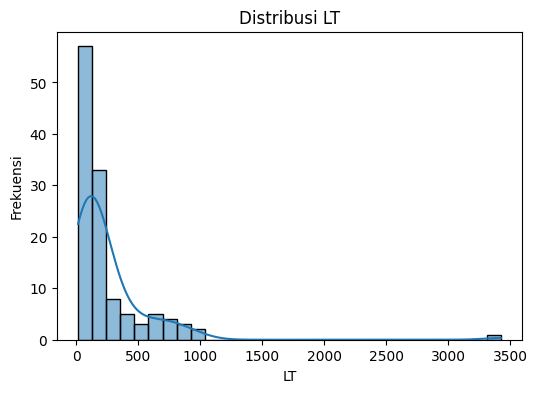

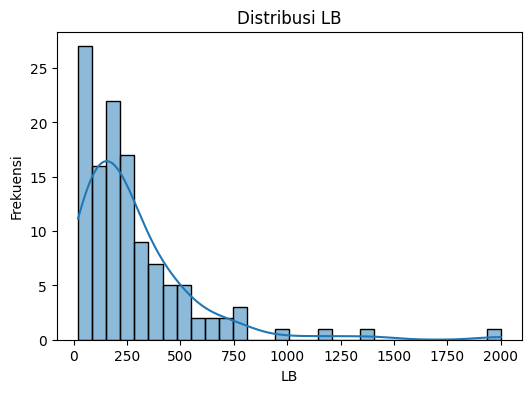

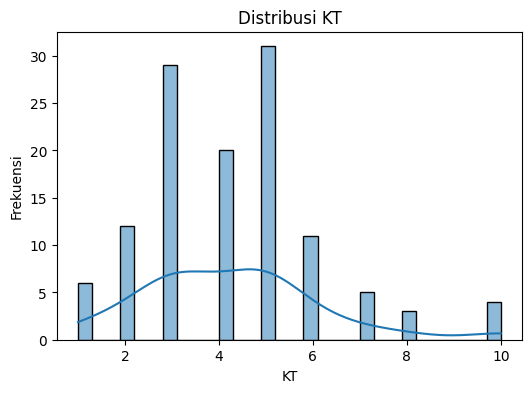

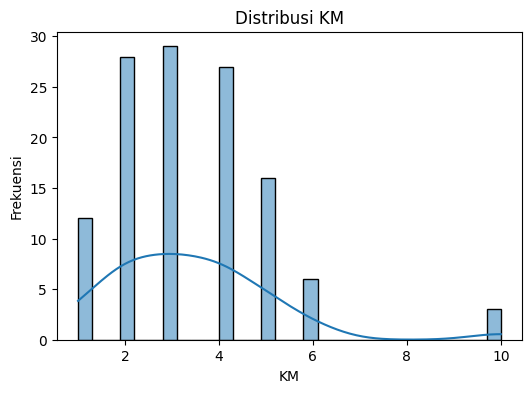

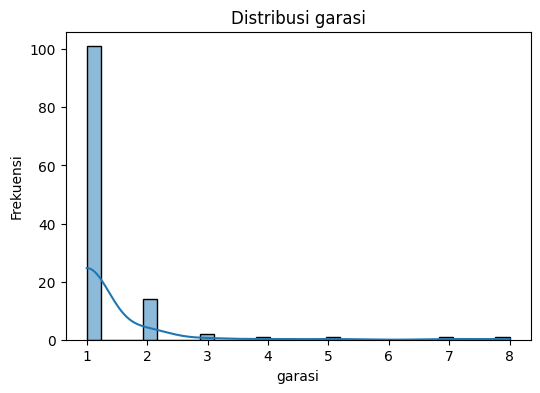

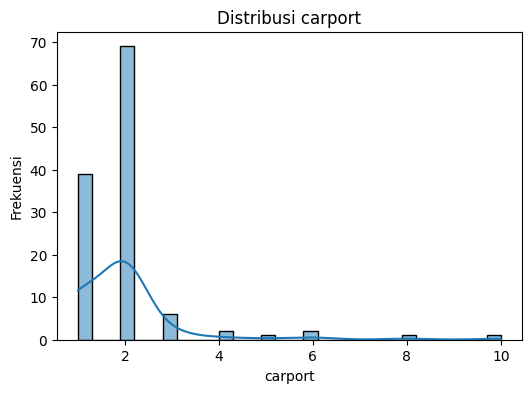

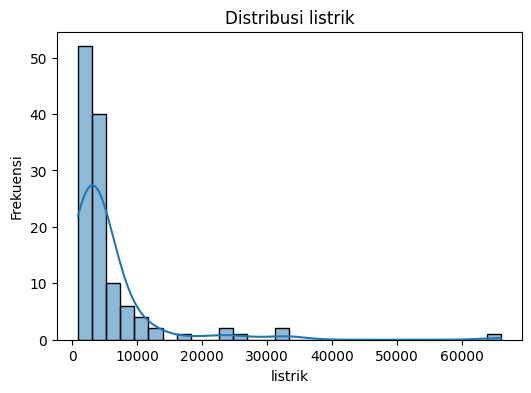

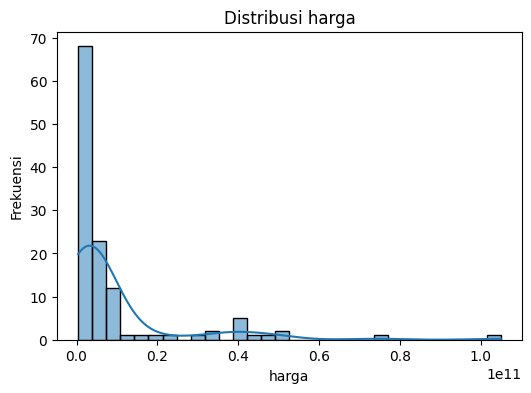

In [ ]:
# distribusi variabel numerik
num_cols = dfJ2_cleaned.select_dtypes(include=["int64", "float64"]).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(dfJ2[col], kde=True, bins=30)
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    plt.show()

*Terima Kasih*

In [ ]:
dfJ2_cleaned['Kota'] = "Jakarta"
dfJ2_cleaned

/tmp/ipython-input-3876438863.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfJ2_cleaned['Kota'] = "Jakarta"


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi,kategori_harga,Kota
0,2021-12-06,202.0,198.0,8.0,3.0,1.0,2.0,Jakarta Pusat,SHM,2200.0,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...,2M-5M,Jakarta
1,2021-12-02,30.0,55.0,2.0,1.0,1.0,1.0,Jakarta Pusat,SHM,2200.0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga...",<2M,Jakarta
2,2021-12-06,19.0,35.0,2.0,1.0,1.0,2.0,Jakarta Pusat,SHM,2200.0,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a...",<2M,Jakarta
3,2021-12-06,33.0,42.0,2.0,2.0,1.0,1.0,Jakarta Pusat,SHM,2200.0,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu...",<2M,Jakarta
4,2021-12-06,30.0,55.0,2.0,2.0,1.0,1.0,Jakarta Pusat,SHM,2200.0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend...",<2M,Jakarta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2021-11-22,220.0,239.0,5.0,4.0,1.0,2.0,Jakarta Timur,PPJB,3500.0,3.850000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Mewah siap huni 2 lantai 220m 10x22 type...,2M-5M,Jakarta
117,2021-12-06,70.0,57.0,3.0,2.0,1.0,2.0,Jakarta Timur,SHM,2200.0,8.800000e+08,https://www.rumah.com/listing-properti/dijual-...,Rumah Signature Location & Access :\n• 2 Menit...,<2M,Jakarta
118,2021-12-06,315.0,280.0,4.0,3.0,1.0,2.0,Jakarta Timur,SHM + IMB,3500.0,4.300000e+09,https://www.rumah.com/listing-properti/dijual-...,"Rumah 1, 5 Lantai Luas Strategis di Pondok Bam...",2M-5M,Jakarta
119,2021-12-06,135.0,190.0,5.0,5.0,1.0,2.0,Jakarta Timur,SHM + IMB,2200.0,3.400000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Baru Non Komplek Posisi Hook Lokasi Stra...,2M-5M,Jakarta


In [ ]:
dfJ2["Kota"] = "Jakarta"
dfJ2

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi,Kota
0,2021-12-06,202.0,198.0,8.0,3.0,1.0,2.0,Jakarta Pusat,SHM,2200.0,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...,Jakarta
1,2021-12-02,30.0,55.0,2.0,1.0,1.0,1.0,Jakarta Pusat,SHM,2200.0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga...",Jakarta
2,2021-12-06,19.0,35.0,2.0,1.0,1.0,2.0,Jakarta Pusat,SHM,2200.0,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a...",Jakarta
3,2021-12-06,33.0,42.0,2.0,2.0,1.0,1.0,Jakarta Pusat,SHM,2200.0,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu...",Jakarta
4,2021-12-06,30.0,55.0,2.0,2.0,1.0,1.0,Jakarta Pusat,SHM,2200.0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend...",Jakarta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2021-11-22,220.0,239.0,5.0,4.0,1.0,2.0,Jakarta Timur,PPJB,3500.0,3.850000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Mewah siap huni 2 lantai 220m 10x22 type...,Jakarta
117,2021-12-06,70.0,57.0,3.0,2.0,1.0,2.0,Jakarta Timur,SHM,2200.0,8.800000e+08,https://www.rumah.com/listing-properti/dijual-...,Rumah Signature Location & Access :\n• 2 Menit...,Jakarta
118,2021-12-06,315.0,280.0,4.0,3.0,1.0,2.0,Jakarta Timur,SHM + IMB,3500.0,4.300000e+09,https://www.rumah.com/listing-properti/dijual-...,"Rumah 1, 5 Lantai Luas Strategis di Pondok Bam...",Jakarta
119,2021-12-06,135.0,190.0,5.0,5.0,1.0,2.0,Jakarta Timur,SHM + IMB,2200.0,3.400000e+09,https://www.rumah.com/listing-properti/dijual-...,Rumah Baru Non Komplek Posisi Hook Lokasi Stra...,Jakarta


# **KOTA DEPOK**

**Memeriksa NaN**




In [ ]:
dfD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   created_at   119 non-null    object 
 1   LT           120 non-null    object 
 2   LB           118 non-null    float64
 3   KT           118 non-null    float64
 4   KM           118 non-null    float64
 5   garasi       25 non-null     float64
 6   carport      94 non-null     float64
 7   lokasi       118 non-null    object 
 8   sertifikat   118 non-null    object 
 9   listrik      103 non-null    float64
 10  hadap        62 non-null     object 
 11  harga        118 non-null    float64
 12  URL          118 non-null    object 
 13  deskripsi    118 non-null    object 
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed:

In [ ]:
dfD.isnull().sum()

,0
created_at,879
LT,878
LB,880
KT,880
KM,880
garasi,973
carport,904
lokasi,880
sertifikat,880
listrik,895


In [ ]:
dfD.describe()

,LB,KT,KM,garasi,carport,listrik,harga,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,118.000000,118.000000,118.000000,25.000000,94.000000,103.000000,118.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,92.618644,2.737288,1.940678,1.760000,1.670213,2147.572816,1194.440678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,92.630404,1.024720,0.980950,1.392839,1.061428,1166.261386,1474.387409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,15.000000,2.000000,1.000000,1.000000,1.000000,900.000000,41.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,46.000000,2.000000,1.000000,1.000000,1.000000,1300.000000,485.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,61.000000,3.000000,2.000000,1.000000,1.000000,2200.000000,810.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,102.250000,3.000000,2.000000,2.000000,2.000000,2200.000000,1137.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,600.000000,7.000000,5.000000,6.000000,7.000000,10000.000000,9000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


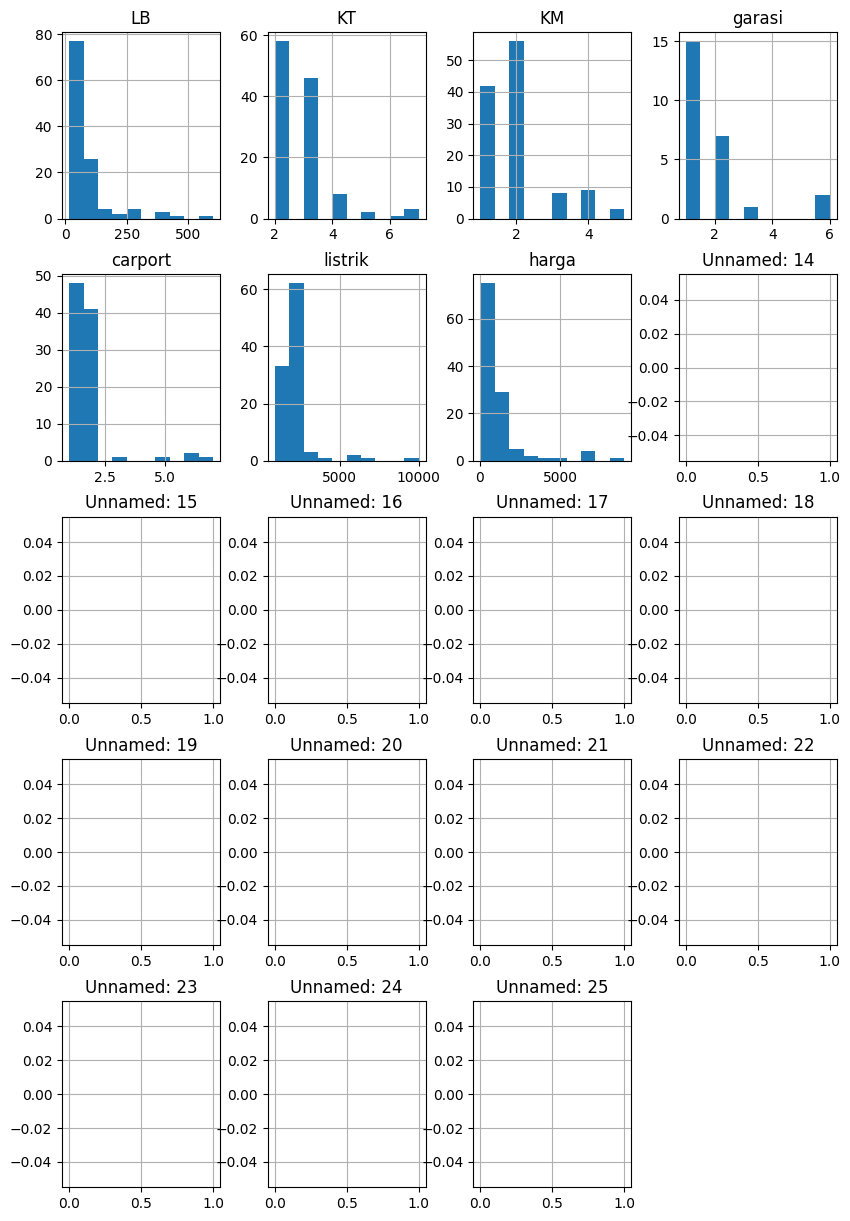

In [ ]:
import matplotlib.pyplot as plt

dfD.hist(figsize=(10,15))
plt.xlabel("Jumlah Data")
plt.ylabel("Frekuensi")
plt.show()

**Mengatasi NaN**



*   Drop Data 1


In [ ]:
# Melakukan pengatasan pada beberapa kolom pada data
dfD1 = dfD.drop(["hadap", "Unnamed: 14", "Unnamed: 15", "Unnamed: 16", "Unnamed: 17", "Unnamed: 18", "Unnamed: 19",
          "Unnamed: 20", "Unnamed: 21", "Unnamed: 22", "Unnamed: 23", "Unnamed: 24", "Unnamed: 25"], axis=1)
dfD1.tail(10)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfD1.isnull().sum()

,0
created_at,879
LT,878
LB,880
KT,880
KM,880
garasi,973
carport,904
lokasi,880
sertifikat,880
listrik,895


In [ ]:
# Melakukan pengecekan pada baris dari setiap kolom yang memiliki nilai kosong
summary = []

for col in dfD1.columns:
    nan_count = dfD1[col].isna().sum()
    not_nan_count = dfD1[col].notna().sum()

    summary.append({
        "Kolom": col,
        "Jumlah NaN": nan_count,
        "Jumlah Tidak NaN": not_nan_count,
        "NaN - Tidak NaN": nan_count - not_nan_count
    })

summary_df = pd.DataFrame(summary)
print(summary_df)

         Kolom  Jumlah NaN  Jumlah Tidak NaN  NaN - Tidak NaN
0   created_at         879               119              760
1           LT         878               120              758
2           LB         880               118              762
3           KT         880               118              762
4           KM         880               118              762
5       garasi         973                25              948
6      carport         904                94              810
7       lokasi         880               118              762
8   sertifikat         880               118              762
9      listrik         895               103              792
10       harga         880               118              762
11         URL         880               118              762
12   deskripsi         880               118              762


In [ ]:
for col in dfD1.columns:
    nan_index = dfD1[dfD1[col].isna()].index
    if not nan_index.empty:
        print(f"Kolom {col} ada NaN di baris {nan_index.min()} sampai {nan_index.max()} (total {len(nan_index)} baris)")

Kolom created_at ada NaN di baris 118 sampai 997 (total 879 baris)
Kolom LT ada NaN di baris 118 sampai 997 (total 878 baris)
Kolom LB ada NaN di baris 118 sampai 997 (total 880 baris)
Kolom KT ada NaN di baris 118 sampai 997 (total 880 baris)
Kolom KM ada NaN di baris 118 sampai 997 (total 880 baris)
Kolom garasi ada NaN di baris 0 sampai 997 (total 973 baris)
Kolom carport ada NaN di baris 1 sampai 997 (total 904 baris)
Kolom lokasi ada NaN di baris 118 sampai 997 (total 880 baris)
Kolom sertifikat ada NaN di baris 118 sampai 997 (total 880 baris)
Kolom listrik ada NaN di baris 11 sampai 997 (total 895 baris)
Kolom harga ada NaN di baris 118 sampai 997 (total 880 baris)
Kolom URL ada NaN di baris 118 sampai 997 (total 880 baris)
Kolom deskripsi ada NaN di baris 118 sampai 997 (total 880 baris)


In [ ]:
print(dfD1.loc[117])

created_at                                            4-12-2021
LT                                                          100
LB                                                         15.0
KT                                                          3.0
KM                                                          3.0
garasi                                                      1.0
carport                                                     1.0
lokasi                                                   Cinere
sertifikat                                                  SHM
listrik                                                  3500.0
harga                                                    1750.0
URL           https://www.rumah123.com/properti/depok/hos928...
deskripsi                    Dijual cepat rumah bagus siap huni
Name: 117, dtype: object


* Drop Data 2

In [ ]:
# Melakukan drop pada baris data di setiap kolom setelah melakukan drop data #1
dfD2 = dfD1.drop(dfD.index[118:998])
dfD2

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,2100.0,https://www.rumah123.com/properti/depok/hos928...,Rumah siap huni komplek Pelni
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,250.0,https://www.rumah123.com/properti/depok/hos928...,rumah minimalis termurah di citayam
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,250.0,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,250.0,https://www.rumah123.com/properti/depok/hos928...,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,350.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,4-12-2021,79,115.0,2.0,1.0,1.0,1.0,Sukmajaya,SHM,NaN,750.0,https://www.rumah123.com/properti/depok/hos928...,Rumah di Depok Timur
114,4-12-2021,72,45.0,2.0,1.0,NaN,1.0,Cimanggis,SHM,NaN,1000.0,https://www.rumah123.com/properti/depok/hos928...,PERUMAHAN NUANSA PERMAI DEPOK
115,4-12-2021,40,40.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,195.0,https://www.rumah123.com/properti/depok/hos928...,rumah semi minimalis manis harga ekonomis di c...
116,4-12-2021,50,50.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,185.0,https://www.rumah123.com/properti/depok/hos927...,rumah semi minimalis dua kamar siap huni di ci...


In [ ]:
dfD2["harga"].iloc[97:118]

,harga
97,665.0
98,498.0
99,235.0
100,335.0
101,235.0
102,610.0
103,9000.0
104,736.0
105,4800.0
106,1000.0


In [ ]:
# Pengecekan setelah drop data #2
dfD2.isnull().sum()

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,93
carport,24
lokasi,0
sertifikat,0
listrik,15


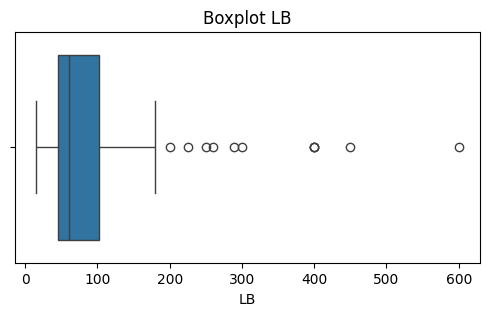

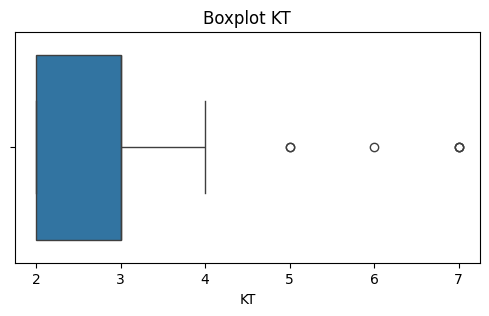

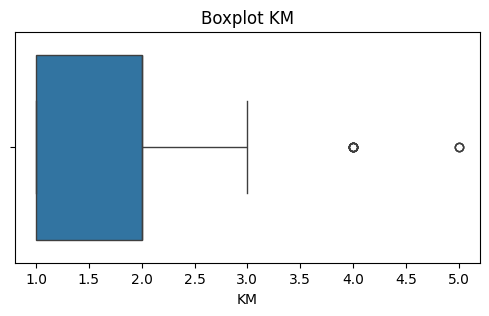

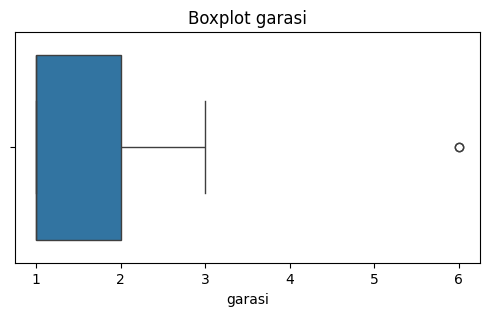

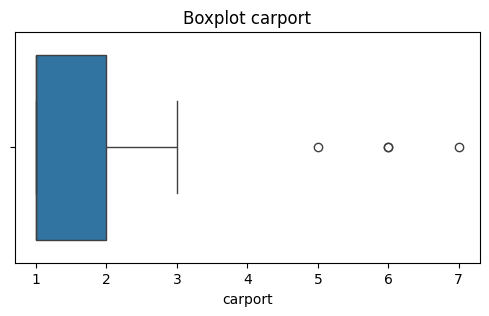

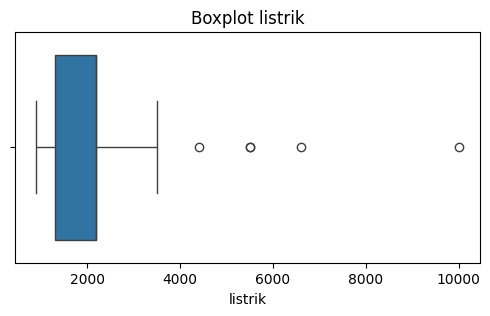

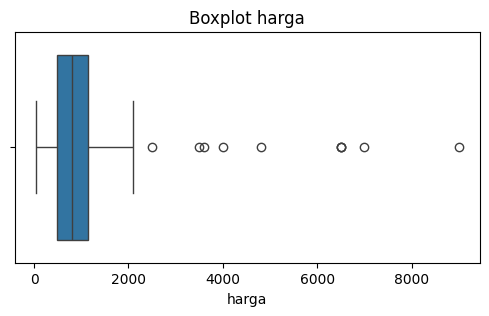

In [ ]:
for col in dfD2.select_dtypes(include=["int64", "float64"]).columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=dfD[col].dropna())
    plt.title(f"Boxplot {col}")
    plt.show()

In [ ]:
# Melakukan drop pada baris data di setiap kolom setelah melakukan drop data #1
dfD2 = dfD2.drop(dfD2.index[118:998])

dfD2["garasi"].fillna(0, inplace=True)
dfD2["carport"].fillna(0, inplace=True)
print(dfD2.isnull().sum())

created_at     0
LT             0
LB             0
KT             0
KM             0
garasi         0
carport        0
lokasi         0
sertifikat     0
listrik       15
harga          0
URL            0
deskripsi      0
dtype: int64


/tmp/ipython-input-3581770563.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfD2["garasi"].fillna(0, inplace=True)
/tmp/ipython-input-3581770563.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.me

In [ ]:
dfD2 = dfD2.drop(dfD2.index[118:998])
print(dfD2.isnull().sum())
dfD2["listrik"].fillna(dfD2["listrik"].median(), inplace=True)

created_at     0
LT             0
LB             0
KT             0
KM             0
garasi         0
carport        0
lokasi         0
sertifikat     0
listrik       15
harga          0
URL            0
deskripsi      0
dtype: int64


/tmp/ipython-input-230016058.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfD2["listrik"].fillna(dfD2["listrik"].median(), inplace=True)


In [ ]:
dfD2.isnull().sum()

,0
created_at,0
LT,0
LB,0
KT,0
KM,0
garasi,0
carport,0
lokasi,0
sertifikat,0
listrik,0


**Memeriksa Outlier**

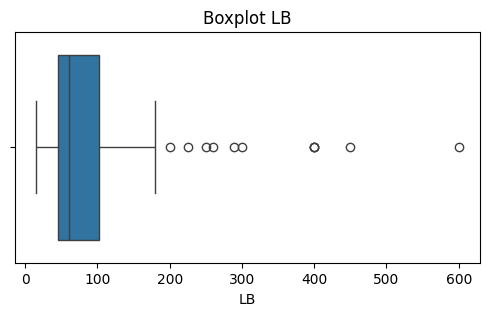

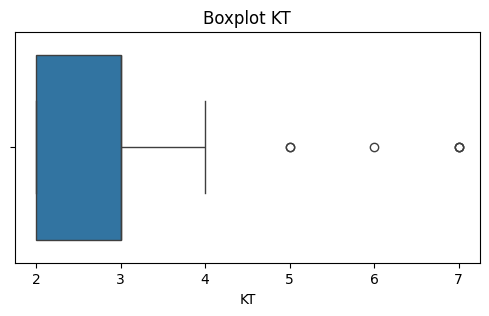

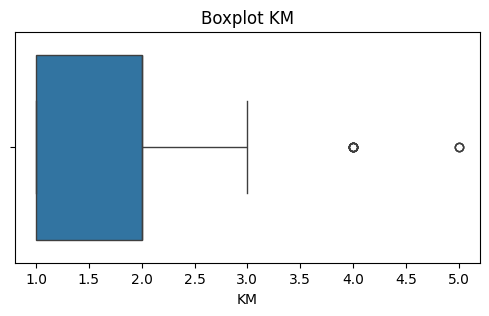

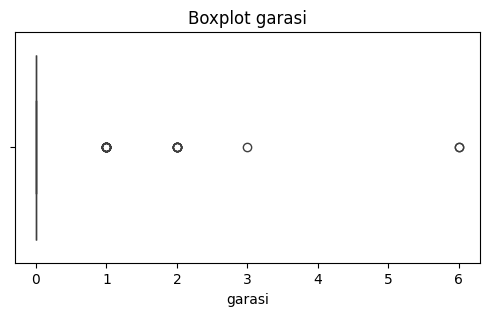

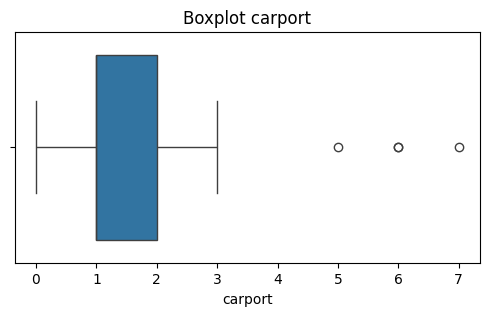

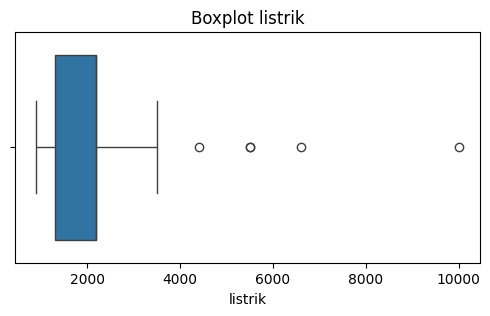

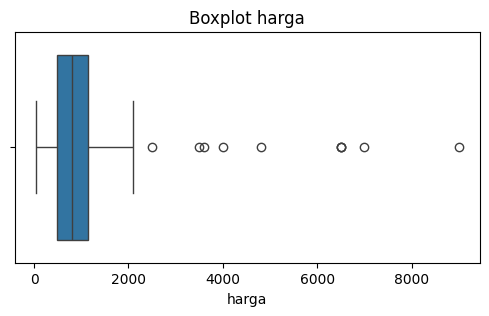

In [ ]:
for col in dfD2.select_dtypes(include=["int64", "float64"]).columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=dfD2[col].dropna())
    plt.title(f"Boxplot {col}")
    plt.show()

In [ ]:
dfD2['created_at'] = pd.to_datetime(dfD2['created_at'], format='%d-%m-%Y', errors='coerce')
dfD2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  118 non-null    datetime64[ns]
 1   LT          118 non-null    object        
 2   LB          118 non-null    float64       
 3   KT          118 non-null    float64       
 4   KM          118 non-null    float64       
 5   garasi      118 non-null    float64       
 6   carport     118 non-null    float64       
 7   lokasi      118 non-null    object        
 8   sertifikat  118 non-null    object        
 9   listrik     118 non-null    float64       
 10  harga       118 non-null    float64       
 11  URL         118 non-null    object        
 12  deskripsi   118 non-null    object        
dtypes: datetime64[ns](1), float64(7), object(5)
memory usage: 12.1+ KB


In [ ]:
display(dfD2['created_at'].value_counts())

,count
created_at,
2021-12-05,74
2021-12-06,22
2021-12-04,22


In [ ]:
print(f"Number of duplicate rows: {dfD2.duplicated().sum()}")

Number of duplicate rows: 0


**Mengatasi Outlier**

In [ ]:
outliers_dict_Depok={}
for col in dfD2.select_dtypes(include='number').columns:
    Q1 = dfD2[col].quantile(0.25)
    Q3 = dfD2[col].quantile(0.75)
    IQR = Q3 - Q1

    batas_bawah = Q1 - 1.5 * IQR
    batas_atas  = Q3 + 1.5 * IQR

    mask_outlier_Depok = (dfD2[col] < batas_bawah) | (dfD2[col] > batas_atas)
    outliers_dict_Depok[col] = dfD2.loc[mask_outlier_Depok, col]

# Tampilkan hasil
for kolom, outlier in outliers_dict_Depok.items():
    print(f"\nKolom: {kolom}")
    print(outlier)


Kolom: LB
0      200.0
11     250.0
23     450.0
24     289.0
25     226.0
28     400.0
29     400.0
33     600.0
38     260.0
103    400.0
105    300.0
Name: LB, dtype: float64

Kolom: KT
23     6.0
25     5.0
28     7.0
29     7.0
33     7.0
103    5.0
Name: KT, dtype: float64

Kolom: KM
11    4.0
20    4.0
24    4.0
25    4.0
26    5.0
28    5.0
29    5.0
31    4.0
33    4.0
36    4.0
53    4.0
94    4.0
Name: KM, dtype: float64

Kolom: garasi
11     1.0
12     1.0
14     1.0
15     1.0
22     1.0
24     3.0
25     2.0
26     2.0
28     6.0
29     6.0
31     2.0
32     1.0
33     2.0
40     1.0
45     2.0
46     2.0
55     1.0
74     1.0
76     1.0
99     1.0
100    1.0
101    1.0
105    2.0
113    1.0
117    1.0
Name: garasi, dtype: float64

Kolom: carport
23     5.0
28     6.0
29     6.0
103    7.0
Name: carport, dtype: float64

Kolom: listrik
24      5500.0
28      4400.0
29      5500.0
33      6600.0
105    10000.0
Name: listrik, dtype: float64

Kolom: harga
23     4000.0
24   

In [ ]:
outlier_harga_Depok = outliers_dict_Depok['harga']
df_outlier_harga_Depok = dfD2.loc[outlier_harga_Depok.index].copy()
dfD2 = dfD2.drop(index=outlier_harga_Depok.index).copy()
df_outlier_harga_Depok

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
23,2021-12-05,487,450.0,6.0,3.0,0.0,5.0,Pancoran Mas,SHM,2200.0,4000.0,https://www.rumah123.com/properti/depok/hos928...,Beli Rumah Bonus Ruko & Kontrakan di Pesona Ka...
24,2021-12-05,378,289.0,4.0,4.0,3.0,3.0,Sukmajaya,SHM,5500.0,7000.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Mewah di Pesona Khayangan Mungil Dekat U...
25,2021-12-05,400,226.0,5.0,4.0,2.0,1.0,Cinere,SHM,2200.0,3600.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Mewah Full Furnish Marmer di Megapolitan...
28,2021-12-05,1024,400.0,7.0,5.0,6.0,6.0,Limo,SHM,4400.0,6500.0,https://www.rumah123.com/properti/depok/hos928...,Rumah plus paviliun dengan taman luas selangka...
29,2021-12-05,1024,400.0,7.0,5.0,6.0,6.0,Cinere,SHM,5500.0,6500.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Mewah Tanah Luas Siap Huni Lingkungan Se...
32,2021-12-05,151,180.0,3.0,3.0,1.0,1.0,Pancoran Mas,SHM,2200.0,3500.0,https://www.rumah123.com/properti/depok/hos928...,Rumah 2 Lantai di Pesona Kayangan Margonda Depok
33,2021-12-05,885,600.0,7.0,4.0,2.0,2.0,Cimanggis,SHM,6600.0,6500.0,https://www.rumah123.com/properti/depok/hos928...,"Rumah luas tanah besar, kolam renang dan taman..."
38,2021-12-05,249,260.0,3.0,2.0,0.0,0.0,Bojong Sari,Lainnya,2200.0,2500.0,https://www.rumah123.com/properti/depok/hos924...,Rumah bagus daerah reni jaya depok
103,2021-12-04,880,400.0,5.0,1.0,0.0,7.0,Cinere,SHM,3300.0,9000.0,https://www.rumah123.com/properti/depok/hos928...,Rumah Halaman Luas Pondok Labu Cocok Untuk Min...
105,2021-12-04,335,300.0,4.0,3.0,2.0,2.0,Cinere,SHM,10000.0,4800.0,https://www.rumah123.com/properti/depok/hos928...,Rumah megah komplek elite cinere segera survey...


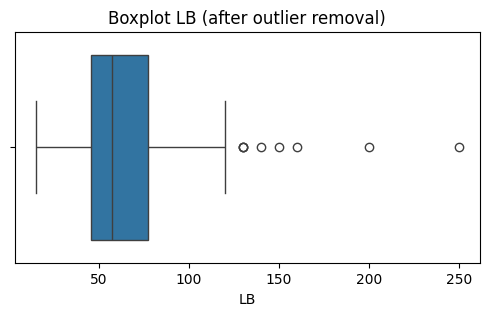

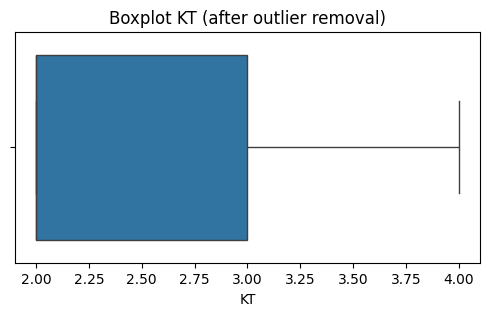

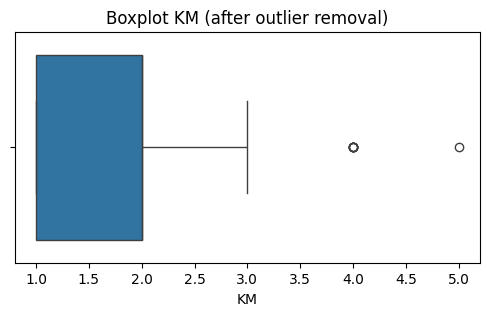

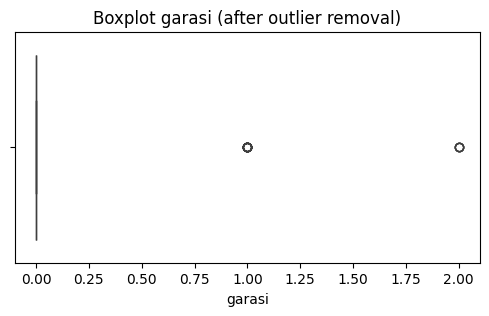

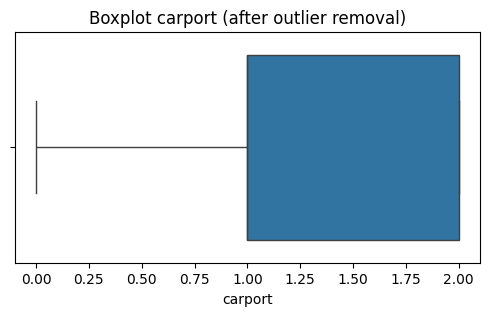

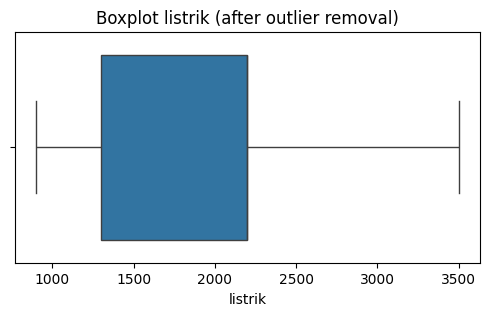

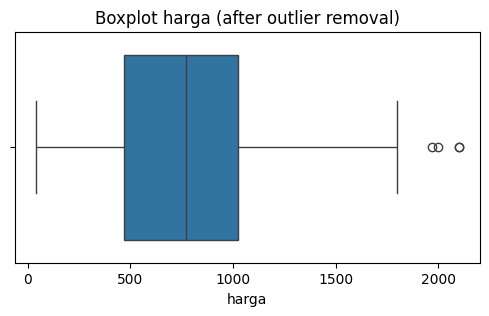

In [ ]:
for col in dfD2.select_dtypes(include=["int64", "float64"]).columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=dfD2[col].dropna())
    plt.title(f"Boxplot {col} (after outlier removal)")
    plt.show()

**Mengubah harga menjadi harga asli**

In [ ]:
dfD2['harga'] = dfD2['harga'] * 1000000

In [ ]:
display(dfD2)

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
0,2021-12-06,165,200.0,4.0,2.0,0.0,1.0,Sukmajaya,SHM,2200.0,2.100000e+09,https://www.rumah123.com/properti/depok/hos928...,Rumah siap huni komplek Pelni
1,2021-12-06,50,45.0,2.0,1.0,0.0,0.0,Cipayung,SHM,1300.0,2.500000e+08,https://www.rumah123.com/properti/depok/hos928...,rumah minimalis termurah di citayam
2,2021-12-06,50,36.0,2.0,1.0,0.0,1.0,Sawangan,SHM,1300.0,2.500000e+08,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK
3,2021-12-06,50,45.0,2.0,1.0,0.0,0.0,Cimanggis,SHM,1300.0,2.500000e+08,https://www.rumah123.com/properti/depok/hos928...,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM
4,2021-12-06,72,45.0,2.0,1.0,0.0,1.0,Sawangan,SHM,1300.0,3.500000e+08,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2021-12-04,79,115.0,2.0,1.0,1.0,1.0,Sukmajaya,SHM,2200.0,7.500000e+08,https://www.rumah123.com/properti/depok/hos928...,Rumah di Depok Timur
114,2021-12-04,72,45.0,2.0,1.0,0.0,1.0,Cimanggis,SHM,2200.0,1.000000e+09,https://www.rumah123.com/properti/depok/hos928...,PERUMAHAN NUANSA PERMAI DEPOK
115,2021-12-04,40,40.0,2.0,1.0,0.0,0.0,Cipayung,SHM,1300.0,1.950000e+08,https://www.rumah123.com/properti/depok/hos928...,rumah semi minimalis manis harga ekonomis di c...
116,2021-12-04,50,50.0,2.0,1.0,0.0,0.0,Cipayung,SHM,1300.0,1.850000e+08,https://www.rumah123.com/properti/depok/hos927...,rumah semi minimalis dua kamar siap huni di ci...


In [ ]:
df_outlier_harga_Depok['harga'] = df_outlier_harga_Depok['harga'] * 1000000
df_outlier_harga_Depok

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi
23,2021-12-05,487,450.0,6.0,3.0,0.0,5.0,Pancoran Mas,SHM,2200.0,4.000000e+09,https://www.rumah123.com/properti/depok/hos928...,Beli Rumah Bonus Ruko & Kontrakan di Pesona Ka...
24,2021-12-05,378,289.0,4.0,4.0,3.0,3.0,Sukmajaya,SHM,5500.0,7.000000e+09,https://www.rumah123.com/properti/depok/hos928...,Rumah Mewah di Pesona Khayangan Mungil Dekat U...
25,2021-12-05,400,226.0,5.0,4.0,2.0,1.0,Cinere,SHM,2200.0,3.600000e+09,https://www.rumah123.com/properti/depok/hos928...,Rumah Mewah Full Furnish Marmer di Megapolitan...
28,2021-12-05,1024,400.0,7.0,5.0,6.0,6.0,Limo,SHM,4400.0,6.500000e+09,https://www.rumah123.com/properti/depok/hos928...,Rumah plus paviliun dengan taman luas selangka...
29,2021-12-05,1024,400.0,7.0,5.0,6.0,6.0,Cinere,SHM,5500.0,6.500000e+09,https://www.rumah123.com/properti/depok/hos928...,Rumah Mewah Tanah Luas Siap Huni Lingkungan Se...
32,2021-12-05,151,180.0,3.0,3.0,1.0,1.0,Pancoran Mas,SHM,2200.0,3.500000e+09,https://www.rumah123.com/properti/depok/hos928...,Rumah 2 Lantai di Pesona Kayangan Margonda Depok
33,2021-12-05,885,600.0,7.0,4.0,2.0,2.0,Cimanggis,SHM,6600.0,6.500000e+09,https://www.rumah123.com/properti/depok/hos928...,"Rumah luas tanah besar, kolam renang dan taman..."
38,2021-12-05,249,260.0,3.0,2.0,0.0,0.0,Bojong Sari,Lainnya,2200.0,2.500000e+09,https://www.rumah123.com/properti/depok/hos924...,Rumah bagus daerah reni jaya depok
103,2021-12-04,880,400.0,5.0,1.0,0.0,7.0,Cinere,SHM,3300.0,9.000000e+09,https://www.rumah123.com/properti/depok/hos928...,Rumah Halaman Luas Pondok Labu Cocok Untuk Min...
105,2021-12-04,335,300.0,4.0,3.0,2.0,2.0,Cinere,SHM,10000.0,4.800000e+09,https://www.rumah123.com/properti/depok/hos928...,Rumah megah komplek elite cinere segera survey...


In [ ]:
df_outlier_harga_Depok['Kota'] = "Depok"
df_outlier_harga_Depok

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi,Kota
23,2021-12-05,487,450.0,6.0,3.0,0.0,5.0,Pancoran Mas,SHM,2200.0,4.000000e+09,https://www.rumah123.com/properti/depok/hos928...,Beli Rumah Bonus Ruko & Kontrakan di Pesona Ka...,Depok
24,2021-12-05,378,289.0,4.0,4.0,3.0,3.0,Sukmajaya,SHM,5500.0,7.000000e+09,https://www.rumah123.com/properti/depok/hos928...,Rumah Mewah di Pesona Khayangan Mungil Dekat U...,Depok
25,2021-12-05,400,226.0,5.0,4.0,2.0,1.0,Cinere,SHM,2200.0,3.600000e+09,https://www.rumah123.com/properti/depok/hos928...,Rumah Mewah Full Furnish Marmer di Megapolitan...,Depok
28,2021-12-05,1024,400.0,7.0,5.0,6.0,6.0,Limo,SHM,4400.0,6.500000e+09,https://www.rumah123.com/properti/depok/hos928...,Rumah plus paviliun dengan taman luas selangka...,Depok
29,2021-12-05,1024,400.0,7.0,5.0,6.0,6.0,Cinere,SHM,5500.0,6.500000e+09,https://www.rumah123.com/properti/depok/hos928...,Rumah Mewah Tanah Luas Siap Huni Lingkungan Se...,Depok
32,2021-12-05,151,180.0,3.0,3.0,1.0,1.0,Pancoran Mas,SHM,2200.0,3.500000e+09,https://www.rumah123.com/properti/depok/hos928...,Rumah 2 Lantai di Pesona Kayangan Margonda Depok,Depok
33,2021-12-05,885,600.0,7.0,4.0,2.0,2.0,Cimanggis,SHM,6600.0,6.500000e+09,https://www.rumah123.com/properti/depok/hos928...,"Rumah luas tanah besar, kolam renang dan taman...",Depok
38,2021-12-05,249,260.0,3.0,2.0,0.0,0.0,Bojong Sari,Lainnya,2200.0,2.500000e+09,https://www.rumah123.com/properti/depok/hos924...,Rumah bagus daerah reni jaya depok,Depok
103,2021-12-04,880,400.0,5.0,1.0,0.0,7.0,Cinere,SHM,3300.0,9.000000e+09,https://www.rumah123.com/properti/depok/hos928...,Rumah Halaman Luas Pondok Labu Cocok Untuk Min...,Depok
105,2021-12-04,335,300.0,4.0,3.0,2.0,2.0,Cinere,SHM,10000.0,4.800000e+09,https://www.rumah123.com/properti/depok/hos928...,Rumah megah komplek elite cinere segera survey...,Depok


In [ ]:
dfD2['Kota'] = "Depok"
dfD2

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi,Kota
0,2021-12-06,165,200.0,4.0,2.0,0.0,1.0,Sukmajaya,SHM,2200.0,2.100000e+09,https://www.rumah123.com/properti/depok/hos928...,Rumah siap huni komplek Pelni,Depok
1,2021-12-06,50,45.0,2.0,1.0,0.0,0.0,Cipayung,SHM,1300.0,2.500000e+08,https://www.rumah123.com/properti/depok/hos928...,rumah minimalis termurah di citayam,Depok
2,2021-12-06,50,36.0,2.0,1.0,0.0,1.0,Sawangan,SHM,1300.0,2.500000e+08,https://www.rumah123.com/properti/depok/hos928...,CLUSTER TERMURAH DI SAWANGAN KOTA DEPOK,Depok
3,2021-12-06,50,45.0,2.0,1.0,0.0,0.0,Cimanggis,SHM,1300.0,2.500000e+08,https://www.rumah123.com/properti/depok/hos928...,RUMAH SIAP HUNI HARGA NEGO DEKAT STASIUN CITAYAM,Depok
4,2021-12-06,72,45.0,2.0,1.0,0.0,1.0,Sawangan,SHM,1300.0,3.500000e+08,https://www.rumah123.com/properti/depok/hos928...,Rumah Cluster Siap Huni Depok,Depok
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,2021-12-04,79,115.0,2.0,1.0,1.0,1.0,Sukmajaya,SHM,2200.0,7.500000e+08,https://www.rumah123.com/properti/depok/hos928...,Rumah di Depok Timur,Depok
114,2021-12-04,72,45.0,2.0,1.0,0.0,1.0,Cimanggis,SHM,2200.0,1.000000e+09,https://www.rumah123.com/properti/depok/hos928...,PERUMAHAN NUANSA PERMAI DEPOK,Depok
115,2021-12-04,40,40.0,2.0,1.0,0.0,0.0,Cipayung,SHM,1300.0,1.950000e+08,https://www.rumah123.com/properti/depok/hos928...,rumah semi minimalis manis harga ekonomis di c...,Depok
116,2021-12-04,50,50.0,2.0,1.0,0.0,0.0,Cipayung,SHM,1300.0,1.850000e+08,https://www.rumah123.com/properti/depok/hos927...,rumah semi minimalis dua kamar siap huni di ci...,Depok


In [ ]:
dfD

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Visualisasi dan Insight

In [ ]:
# Combine cleaned dataframes
combined_df_cleaned = pd.concat([dfJ2_cleaned, dfD2, dfB_harga, dfX, dfT_Bersih], ignore_index=True)

# Combine outlier dataframes
combined_df_outliers = pd.concat([dfX_outlier_harga_bekasi, df_outlier_harga_Depok, dfB_outlier_harga, dfT_outlier_harga_Tanggerang], ignore_index=True)

# Combine all data
all_cities_df = pd.concat([combined_df_cleaned, combined_df_outliers], ignore_index=True)

print("Shape of combined cleaned dataframe:", combined_df_cleaned.shape)
print("Shape of combined outlier dataframe:", combined_df_outliers.shape)
print("Shape of all cities dataframe:", all_cities_df.shape)

display(all_cities_df.head(10))

Shape of combined cleaned dataframe: (583, 15)
Shape of combined outlier dataframe: (43, 14)
Shape of all cities dataframe: (626, 15)


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,harga,URL,deskripsi,kategori_harga,Kota
0,2021-12-06,202.0,198.0,8.0,3.0,1.0,2.0,Jakarta Pusat,SHM,2200.0,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...,2M-5M,Jakarta
1,2021-12-02,30.0,55.0,2.0,1.0,1.0,1.0,Jakarta Pusat,SHM,2200.0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga...",<2M,Jakarta
2,2021-12-06,19.0,35.0,2.0,1.0,1.0,2.0,Jakarta Pusat,SHM,2200.0,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a...",<2M,Jakarta
3,2021-12-06,33.0,42.0,2.0,2.0,1.0,1.0,Jakarta Pusat,SHM,2200.0,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu...",<2M,Jakarta
4,2021-12-06,30.0,55.0,2.0,2.0,1.0,1.0,Jakarta Pusat,SHM,2200.0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend...",<2M,Jakarta
5,2021-12-06,217.0,245.0,6.0,4.0,1.0,2.0,Jakarta Pusat,SHM,4400.0,5.500000e+09,https://www.rumah.com/listing-properti/dijual-...,\nSudah include BPHTB dan Balik nama Sertifika...,5M-10M,Jakarta
6,2021-12-06,60.0,98.0,3.0,3.0,1.0,1.0,Jakarta Pusat,SHM,2200.0,1.700000e+09,https://www.rumah.com/listing-properti/dijual-...,Lokasi strategis di perbatasan Jakarta Barat d...,<2M,Jakarta
7,2021-12-06,33.0,42.0,2.0,1.0,1.0,1.0,Jakarta Pusat,SHM,2200.0,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Desain menarik dengan konsep Townhouse, akses ...",<2M,Jakarta
8,2021-12-05,71.0,83.0,3.0,2.0,1.0,1.0,Jakarta Pusat,SHM,2200.0,1.880000e+09,https://www.rumah.com/listing-properti/dijual-...,"Lokasi pusat bisnis perekonomian Indonesia, de...",<2M,Jakarta
9,2021-12-05,45.0,71.0,3.0,2.0,1.0,1.0,Jakarta Pusat,SHM,2200.0,1.390000e+09,https://www.rumah.com/listing-properti/dijual-...,Perubahan tata ruang dapat dilakukan,<2M,Jakarta


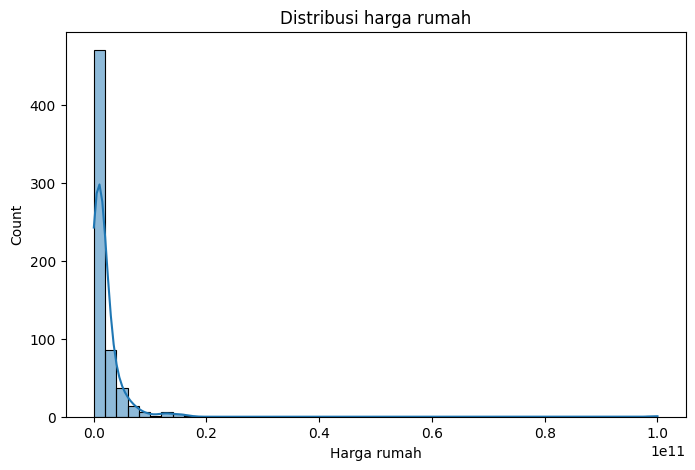


Insight 1: Distribusi harga rumah terlihat, apakah skew ke kanan (lebih banyak rumah murah) atau ada outlier rumah super mahal.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(all_cities_df["harga"], bins=50, kde=True)
plt.title("Distribusi harga rumah")
plt.xlabel("Harga rumah")
plt.show()
print("\nInsight 1: Distribusi harga rumah terlihat, apakah skew ke kanan (lebih banyak rumah murah) atau ada outlier rumah super mahal.")

Distribusi harga rumah terlihat condong ke kanan (right-skewed). Hal ini menunjukkan bahwa mayoritas rumah berada pada kisaran harga yang relatif rendah, sedangkan hanya sebagian kecil rumah yang memiliki harga sangat tinggi.

Puncak distribusi berada pada kategori rumah dengan harga rendah hingga menengah, menandakan bahwa pasar rumah paling banyak ditawarkan pada segmen affordable. Sementara itu, rumah-rumah dengan harga sangat tinggi muncul sebagai outlier dan jumlahnya jauh lebih sedikit.

Implikasinya, jika perusahaan seperti RPPI ingin memaksimalkan jumlah transaksi, sebaiknya fokus pada rumah dengan kisaran harga rendah hingga menengah, karena segmentasi ini lebih dominan di pasar. Namun, bila targetnya adalah margin keuntungan tinggi per unit, maka rumah mewah tetap bisa menjadi pertimbangan meskipun jumlahnya terbatas.

Secara keseluruhan, distribusi ini menggambarkan bahwa median harga lebih representatif dibanding rata-rata untuk menunjukkan kondisi pasar, karena keberadaan rumah-rumah mahal yang ekstrem dapat menaikkan nilai rata-rata secara signifikan.


Rata-rata harga rumah per kota:
Kota
Tanggerang    3.849556e+09
Jakarta       2.807597e+09
Bogor         1.287355e+09
Depok         1.194441e+09
Bekasi        1.074823e+09
Name: harga, dtype: float64


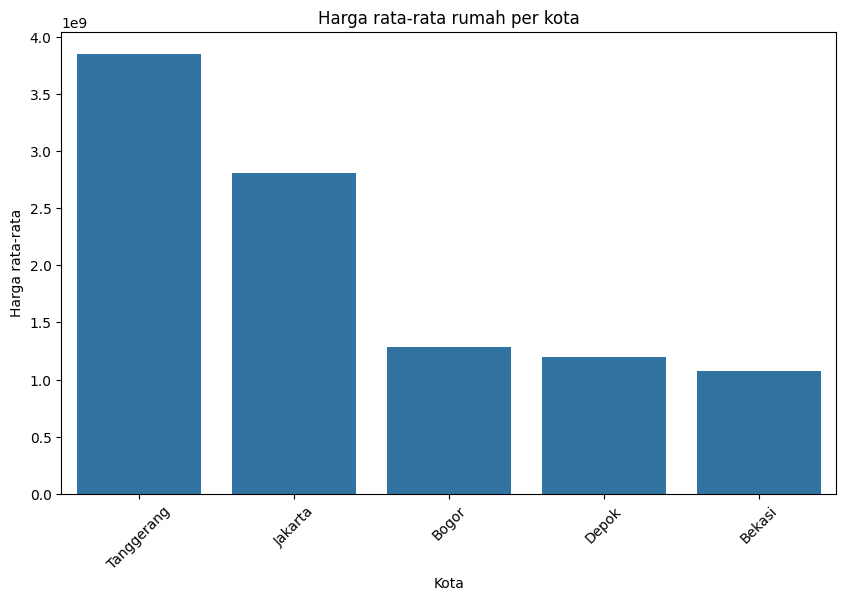


Insight 2: Kota di urutan atas = paling mahal, urutan bawah = paling murah.


In [ ]:
avg_price_city = all_cities_df.groupby("Kota")["harga"].mean().sort_values(ascending=False)
print("\nRata-rata harga rumah per kota:")
print(avg_price_city)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_price_city.index, y=avg_price_city.values)
plt.xticks(rotation=45)
plt.title("Harga rata-rata rumah per kota")
plt.ylabel("Harga rata-rata")
plt.show()

print("\nInsight 2: Kota di urutan atas = paling mahal, urutan bawah = paling murah.")


Harga rata-rata rumah per kota menunjukkan adanya perbedaan yang cukup jelas antarwilayah. Terlihat bahwa Tangerang dan Jakarta memiliki rata-rata harga rumah jauh lebih tinggi dibandingkan kota lain seperti Bogor, Depok, dan Bekasi.

Distribusi ini memperlihatkan adanya kesenjangan harga antar kota, di mana segmen kota besar atau metropolitan cenderung memiliki harga lebih mahal, sementara kota penyangga relatif lebih terjangkau. Dengan kata lain, pasar rumah di kawasan Tangerang dan Jakarta lebih didominasi oleh hunian dengan harga tinggi, sedangkan di Bekasi, Depok, dan Bogor lebih condong ke arah rumah dengan harga menengah hingga rendah.

Implikasinya, strategi pasar dapat diarahkan sesuai segmen:

* Jika target konsumen menengah ke atas, maka Tangerang dan Jakarta menjadi
lokasi potensial karena harga rumah lebih premium.

* Jika target konsumen menengah ke bawah, maka Bogor, Depok, dan Bekasi lebih sesuai, mengingat harga rumah lebih terjangkau dan basis pasarnya lebih luas.

Secara keseluruhan, data ini menunjukkan bahwa posisi kota memengaruhi daya beli dan harga rumah rata-rata, di mana kedekatan dengan pusat aktivitas ekonomi (seperti Jakarta) berkorelasi dengan harga hunian yang lebih mahal.


Jumlah transaksi rumah per kota:
Kota
Bogor         194
Tanggerang    124
Depok         118
Bekasi        107
Jakarta        83
Name: count, dtype: int64


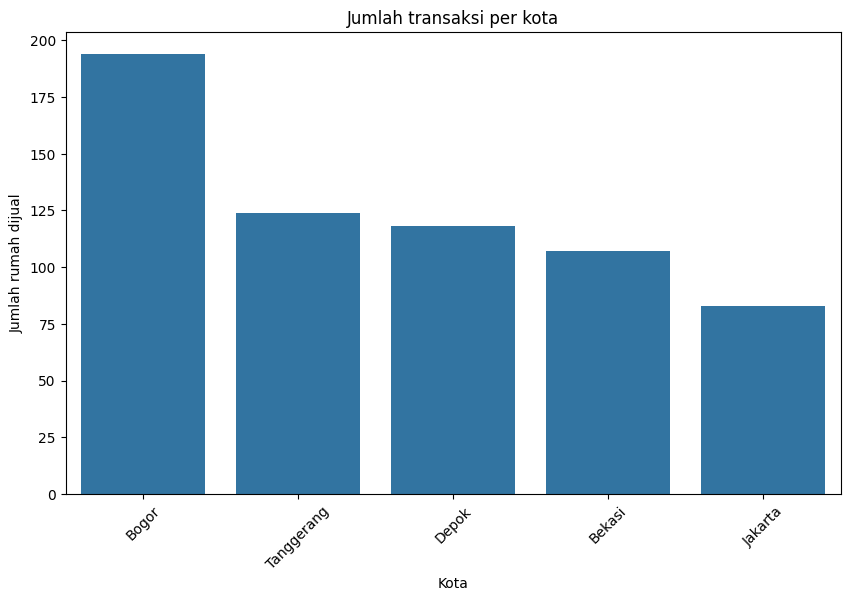


Insight 3: Kota dengan transaksi terbanyak punya potensi pasar lebih besar untuk cabang baru.


In [ ]:
city_count = all_cities_df["Kota"].value_counts()
print("\nJumlah transaksi rumah per kota:")
print(city_count)

plt.figure(figsize=(10,6))
sns.barplot(x=city_count.index, y=city_count.values)
plt.xticks(rotation=45)
plt.title("Jumlah transaksi per kota")
plt.ylabel("Jumlah rumah dijual")
plt.show()

print("\nInsight 3: Kota dengan transaksi terbanyak punya potensi pasar lebih besar untuk cabang baru.")


Jumlah transaksi rumah per kota menunjukkan bahwa Bogor memiliki jumlah transaksi tertinggi (194 transaksi), diikuti oleh Tangerang (124), Depok (118), Bekasi (107), dan yang terendah adalah Jakarta (83).

Distribusi ini memperlihatkan bahwa aktivitas jual beli rumah lebih tinggi di kota-kota penyangga Jakarta, khususnya Bogor, dibandingkan di pusat kota seperti Jakarta. Hal ini mengindikasikan bahwa permintaan rumah lebih banyak terjadi di wilayah dengan harga relatif lebih terjangkau.

Implikasinya, jika perusahaan properti ingin memperluas pasar atau membuka cabang baru, maka Bogor menjadi lokasi paling potensial karena volume transaksi yang tinggi mencerminkan basis pasar yang besar. Sementara itu, meskipun Jakarta memiliki harga rumah lebih tinggi, volume transaksi lebih kecil, sehingga targetnya mungkin lebih cocok untuk segmen premium, bukan mass market.

Secara keseluruhan, data ini menunjukkan bahwa jumlah transaksi tidak selalu berbanding lurus dengan harga rata-rata rumah. Kota dengan harga tinggi (Jakarta, Tangerang) cenderung memiliki transaksi lebih sedikit, sedangkan kota dengan harga lebih rendah (Bogor, Depok, Bekasi) justru menunjukkan aktivitas pasar yang lebih ramai.

In [ ]:
all_cities_df["harga"] = pd.to_numeric(all_cities_df["harga"], errors="coerce")
all_cities_df["LT"] = pd.to_numeric(all_cities_df["LT"], errors="coerce")

In [ ]:
# hitung harga per m2
all_cities_df["Harga_per_m2"] = all_cities_df["harga"] / all_cities_df["LT"]

# rata-rata per kota
avg_price_m2 = (
    all_cities_df.groupby("Kota")["Harga_per_m2"]
    .mean()
    .sort_values(ascending=False)
)

print("\nHarga rata-rata per m² per kota:")
display(avg_price_m2)

print("\nInsight 4: Harga per m² memberi gambaran lebih adil perbandingan antar kota.")


Harga rata-rata per m² per kota:


,Harga_per_m2
Kota,
Jakarta,2.359632e+07
Tanggerang,1.569747e+07
Depok,1.007209e+07
Bekasi,9.778664e+06
Bogor,8.233026e+06



Insight 4: Harga per m² memberi gambaran lebih adil perbandingan antar kota.


Harga rata-rata rumah per meter persegi menunjukkan bahwa Jakarta memiliki harga tertinggi (± Rp 23,6 juta/m²), diikuti oleh Tangerang (± Rp 15,7 juta/m²), Depok (± Rp 10,1 juta/m²), Bekasi (± Rp 9,8 juta/m²), dan yang paling rendah adalah Bogor (± Rp 8,2 juta/m²).

Distribusi ini menegaskan bahwa Jakarta tetap menjadi kota dengan harga tanah dan rumah paling mahal, meskipun jumlah transaksi lebih rendah dibanding kota lain. Sebaliknya, Bogor yang memiliki harga rata-rata per m² paling rendah justru mencatat jumlah transaksi tertinggi (lihat data transaksi sebelumnya).

Implikasinya, harga per m² menjadi indikator yang lebih adil dalam membandingkan pasar antar kota, karena menghilangkan bias luas bangunan atau tanah. Dengan metrik ini, terlihat jelas hierarki harga properti dari kota paling premium (Jakarta) hingga paling terjangkau (Bogor).

Secara keseluruhan, data ini menunjukkan bahwa:

Jakarta & Tangerang → segmen pasar premium, harga tinggi per m².

Depok, Bekasi, Bogor → segmen pasar menengah ke bawah, harga lebih terjangkau per m².

In [ ]:
print("\nKarakteristik rumah paling sering muncul (modus):")
print(all_cities_df.mode().iloc[0])

if "JumlahKamar" in all_cities_df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(x="JumlahKamar", data=all_cities_df)
    plt.title("Distribusi jumlah kamar rumah")
    plt.show()

print("\nInsight 5: Modus/plot menunjukkan karakteristik rumah yang paling umum dijual.")



Karakteristik rumah paling sering muncul (modus):
created_at                                      2021-06-12 00:00:00
LT                                                             60.0
LB                                                             36.0
KT                                                              2.0
KM                                                              2.0
garasi                                                          0.0
carport                                                         1.0
lokasi                                                  Kota Bekasi
sertifikat                                                      SHM
listrik                                                      2200.0
harga                                                   600000000.0
URL               https://www.rumah123.com/perumahan-baru/proper...
deskripsi         \nSudah include BPHTB dan Balik nama Sertifika...
kategori_harga                                                2M-

Modus karakteristik rumah menunjukkan bahwa rumah yang paling sering ditawarkan di pasar memiliki luas tanah 60 m², luas bangunan 36 m², 2 kamar tidur, 2 kamar mandi, serta 1 carport tanpa garasi. Lokasi terbanyak adalah Kota Bekasi dengan sertifikat SHM dan daya listrik 2200 watt. Dari sisi harga, kategori yang mendominasi adalah 2M–5M dengan harga per m² sekitar 8,3 juta rupiah. Hal ini menandakan bahwa segmen rumah kecil hingga menengah dengan harga terjangkau-menengah adalah yang paling populer di pasar, sehingga dapat menjadi fokus utama bagi perusahaan untuk memaksimalkan penjualan.

In [ ]:
budget = 25_000_000_000
all_cities_df_sorted = all_cities_df.sort_values(by="harga")
selected = []
total = 0
for i, row in all_cities_df_sorted.iterrows():
    if total + row["harga"] <= budget:
        selected.append(row)
        total += row["harga"]
selected_houses = pd.DataFrame(selected)
print("\nRumah yang dipilih untuk investasi (total <= 25 M):")
print(selected_houses[["Kota","harga"]])
print("Total investasi:", total)

print("\nInsight 6: Strategi bisa pilih banyak rumah murah atau sedikit rumah mahal sesuai preferensi RPPI.")



Rumah yang dipilih untuk investasi (total <= 25 M):
           Kota        harga
140       Depok   41000000.0
325       Bogor   65000000.0
313       Bogor   65000000.0
299       Bogor   65000000.0
300       Bogor   70000000.0
..          ...          ...
340       Bogor  395000000.0
2       Jakarta  395000000.0
548  Tanggerang  396000000.0
250       Bogor  397223000.0
248       Bogor  399000000.0

[92 rows x 2 columns]
Total investasi: 24813347361.0

Insight 6: Strategi bisa pilih banyak rumah murah atau sedikit rumah mahal sesuai preferensi RPPI.


Pemilihan rumah untuk investasi dengan total anggaran maksimal 25 miliar menunjukkan adanya dua strategi utama yang bisa ditempuh. Pertama, membeli lebih banyak unit rumah dengan harga relatif murah sehingga portofolio investasi menjadi lebih terdiversifikasi dan berpotensi lebih cepat terjual. Kedua, membeli lebih sedikit unit rumah dengan harga yang lebih tinggi, yang meskipun risikonya lebih besar, bisa memberikan margin keuntungan lebih tinggi per unit. Data juga memperlihatkan bahwa kota Bogor mendominasi pilihan, menandakan wilayah ini dianggap memiliki prospek investasi yang menarik. Dengan demikian, RPPI dapat menyesuaikan strategi investasi sesuai preferensi—apakah lebih mengutamakan volume transaksi atau potensi keuntungan per unit rumah.

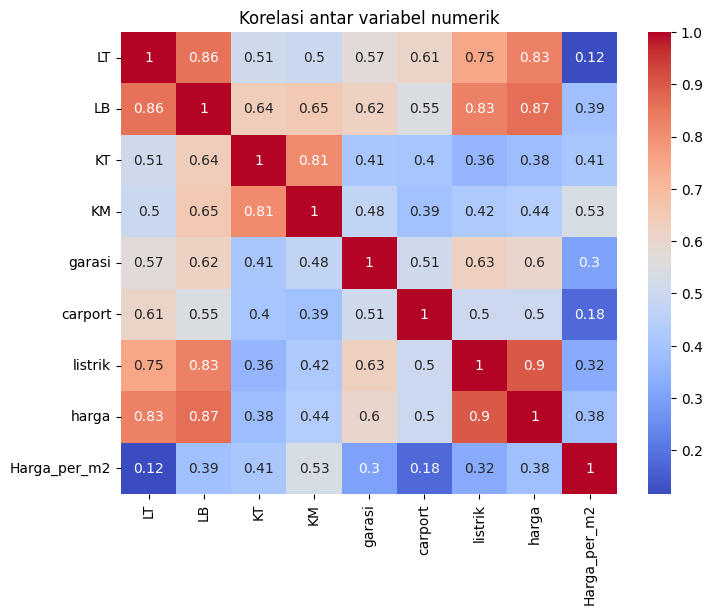


Insight 7: Korelasi menunjukkan variabel mana paling memengaruhi harga (misal luas tanah/bangunan).


In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(all_cities_df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Korelasi antar variabel numerik")
plt.show()

print("\nInsight 7: Korelasi menunjukkan variabel mana paling memengaruhi harga (misal luas tanah/bangunan).")



Analisis korelasi antar variabel numerik menunjukkan bahwa faktor yang paling berpengaruh terhadap harga rumah adalah luas tanah (LT) dan luas bangunan (LB), dengan korelasi yang sangat kuat terhadap harga. Selain itu, daya listrik juga memiliki hubungan positif yang cukup signifikan, menandakan rumah dengan daya listrik lebih besar cenderung dijual dengan harga lebih tinggi. Sementara itu, variabel jumlah kamar tidur (KT), kamar mandi (KM), garasi, dan carport menunjukkan korelasi yang lebih lemah terhadap harga, sehingga meskipun berkontribusi, pengaruhnya tidak sebesar ukuran tanah/bangunan. Temuan ini mengindikasikan bahwa strategi penentuan harga rumah di pasar terutama didorong oleh faktor ukuran fisik rumah, sedangkan fasilitas tambahan hanya menjadi faktor pendukung.

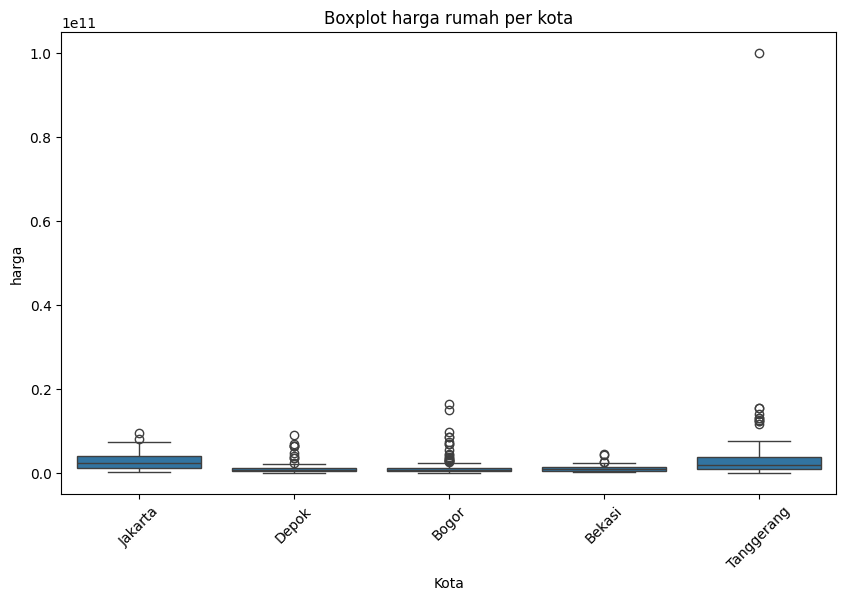


Insight 9: Boxplot membantu identifikasi outlier (rumah super mahal/murah).


In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Kota", y="harga", data=all_cities_df)
plt.xticks(rotation=45)
plt.title("Boxplot harga rumah per kota")
plt.show()

print("\nInsight 9: Boxplot membantu identifikasi outlier (rumah super mahal/murah).")


Boxplot harga rumah per kota memperlihatkan bahwa mayoritas rumah berada dalam kisaran harga yang relatif serupa, namun terdapat cukup banyak outlier di setiap kota. Outlier ini merepresentasikan rumah dengan harga sangat tinggi (super mahal) atau sangat rendah (super murah) dibandingkan mayoritas. Jakarta dan Tangerang menampilkan sebaran harga yang lebih lebar dengan sejumlah rumah berharga ekstrem, sementara kota seperti Bekasi dan Depok cenderung memiliki distribusi harga yang lebih rapat. Hal ini menunjukkan bahwa meskipun setiap kota memiliki pasar rumah utama di kisaran harga tertentu, selalu ada segmen khusus dengan harga jauh di luar rata-rata, yang bisa diposisikan sebagai peluang premium maupun budget sesuai strategi investasi.


Jumlah rumah per segmen harga:
Segmen
<1M     329
1-3M    200
>3M      97
Name: count, dtype: int64


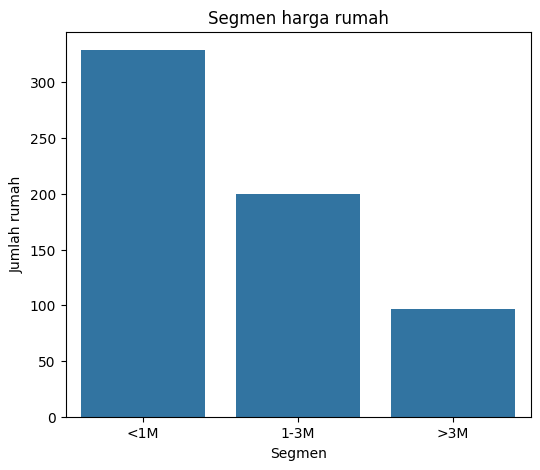


Insight 10: Segmentasi memperlihatkan kelas harga mana yang paling dominan → target pasar utama.


In [ ]:
bins = [0, 1_000_000_000, 3_000_000_000, all_cities_df["harga"].max()]
labels = ["<1M", "1-3M", ">3M"]
all_cities_df["Segmen"] = pd.cut(all_cities_df["harga"], bins=bins, labels=labels)

segmen_counts = all_cities_df["Segmen"].value_counts()
print("\nJumlah rumah per segmen harga:")
print(segmen_counts)

plt.figure(figsize=(6,5))
sns.barplot(x=segmen_counts.index, y=segmen_counts.values)
plt.title("Segmen harga rumah")
plt.ylabel("Jumlah rumah")
plt.show()

print("\nInsight 10: Segmentasi memperlihatkan kelas harga mana yang paling dominan → target pasar utama.")

Segmentasi harga rumah menunjukkan bahwa pasar didominasi oleh rumah dengan harga di bawah 1 miliar rupiah, dengan jumlah penawaran terbanyak dibandingkan segmen lainnya. Segmen 1–3 miliar menempati posisi kedua, sedangkan rumah dengan harga di atas 3 miliar jumlahnya relatif sedikit. Pola ini menegaskan bahwa target pasar utama berada pada kelas rumah dengan harga terjangkau hingga menengah, karena segmen ini paling banyak tersedia dan memiliki potensi daya serap pasar yang lebih tinggi. Sementara itu, segmen rumah mewah (>3 miliar) tetap ada, namun lebih bersifat niche dan menyasar konsumen khusus dengan daya beli tinggi.

#PETUNJUK

## 1. Kualitas data yang dimiliki perusahaan
Kualitas data pada beberapa kota memiliki kesamaan permasalahan diantaranya :    
- Banyaknya kolom yang tidak memiliki nilai/value sehingga kolom tersebut harus di drop.
- Berdasarkan business understanding kolom hadap tidak memiiliki korelasi terhadap harga sehingga tidak mempengaruhi nilai jual.
- Pada kolom Harga untuk data properti di kota Depok dan Tangerang, format nilai yang digunakan masih dalam bentuk perbandingan 1 : 1 juta. Hal ini berarti angka yang tercantum pada dataset bukan merupakan harga penuh, melainkan perlu dikalikan dengan faktor 1.000.000 untuk mendapatkan nilai harga sebenarnya dalam rupiah.

Maka dapat disimpulkan bahwa secara umum, kualitas data yang dimiliki perusahaan masih tergolong kurang baik sebelum dilakukan pembersihan, karena ada masalah kelengkapan, relevansi, dan akurasi nilai. Namun setelah dilakukan data cleaning (drop kolom kosong, menghapus kolom tidak relevan, koreksi skala harga, dan mengatasi duplikasi), kualitas data menjadi cukup baik dan dapat digunakan untuk analisis lebih lanjut.

##2. Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi data driven company yang unggul.

Pada pihak DE/DBA perlu menerapkan aturan data entry yang konsisten, misalnya dengan memastikan harga selalu disimpan dalam satuan rupiah penuh (bukan 1:1 juta), serta menerapkan validasi data pada level basis data sehingga kolom-kolom penting seperti harga, luas tanah, dan lokasi tidak boleh kosong.


##3. Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?

Harga rata-rata rumah per kota menunjukkan adanya perbedaan yang cukup jelas antarwilayah. Terlihat bahwa Tangerang dan Jakarta memiliki rata-rata harga rumah jauh lebih tinggi dibandingkan kota lain seperti Bogor, Depok, dan Bekasi.

Distribusi ini memperlihatkan adanya kesenjangan harga antar kota, di mana segmen kota besar atau metropolitan cenderung memiliki harga lebih mahal, sementara kota penyangga relatif lebih terjangkau. Dengan kata lain, pasar rumah di kawasan Tangerang dan Jakarta lebih didominasi oleh hunian dengan harga tinggi, sedangkan di Bekasi, Depok, dan Bogor lebih condong ke arah rumah dengan harga menengah hingga rendah.

Implikasinya, strategi pasar dapat diarahkan sesuai segmen:

Jika target konsumen menengah ke atas, maka Tangerang dan Jakarta menjadi lokasi potensial karena harga rumah lebih premium.

Jika target konsumen menengah ke bawah, maka Bogor, Depok, dan Bekasi lebih sesuai, mengingat harga rumah lebih terjangkau dan basis pasarnya lebih luas.

Secara keseluruhan, data ini menunjukkan bahwa posisi kota memengaruhi daya beli dan harga rumah rata-rata, di mana kedekatan dengan pusat aktivitas ekonomi (seperti Jakarta) berkorelasi dengan harga hunian yang lebih mahal.

##4. Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).
Data transaksi rumah menunjukkan bahwa pasar properti lebih dinamis di kota-kota penyangga Jakarta, terutama Bogor, dibandingkan di pusat kota Jakarta. Hal ini menandakan bahwa faktor keterjangkauan harga memiliki pengaruh signifikan terhadap volume transaksi. Dengan demikian, strategi perusahaan properti sebaiknya menyesuaikan karakteristik pasar di tiap kota: fokus ekspansi ke wilayah dengan permintaan tinggi seperti Bogor untuk segmen mass market, dan mengarahkan strategi berbeda di Jakarta untuk melayani segmen premium dengan daya beli lebih besar namun volume lebih kecil.

## 5. Rumah dengan karakteristik seperti apa yang paling banyak dijual?
Pasar properti saat ini didominasi oleh rumah dengan ukuran kecil hingga menengah, khususnya tipe 60/36 dengan 2 kamar tidur, 2 kamar mandi, serta fasilitas standar seperti 1 carport tanpa garasi. Lokasi terbanyak berada di Bekasi dengan legalitas SHM dan daya listrik 2200 watt, sedangkan rentang harga yang paling populer adalah 2M–5M dengan harga per m² sekitar 8,3 juta rupiah.

##6. Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?
Jika RPPI ingin melakukan investasi maksimal Rp 25 miliar pada minggu depan, maka data menunjukkan dua opsi strategi yang bisa dipertimbangkan. Pertama, membeli lebih banyak rumah dengan harga relatif murah agar portofolio investasi lebih terdiversifikasi dan cepat berputar. Kedua, membeli lebih sedikit rumah dengan harga lebih tinggi untuk memperoleh margin keuntungan lebih besar per unit, meskipun risikonya lebih tinggi. Berdasarkan distribusi transaksi, Bogor menjadi kota yang paling prospektif karena tingginya volume penjualan, sehingga rumah di wilayah ini layak direkomendasikan sebagai pilihan utama investasi RPPI.

##7. Dan yang terpenting, informasi berharga apa lagi yang bisa anda dapatkan dari data?

Data menunjukkan bahwa kota Bogor unggul dari sisi jumlah penawaran, sementara Jakarta dan Tangerang cocok untuk diversifikasi antara segmen premium dan budget. Segmentasi pasar didominasi rumah di bawah 1 miliar yang cepat terserap, sedangkan segmen menengah hingga premium memberi peluang margin lebih tinggi. Selain itu, outlier harga dapat dimanfaatkan sebagai peluang investasi strategis sesuai preferensi RPPI, apakah fokus pada volume atau keuntungan per unit.

##*Terima Kasih*